# Library and Data

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import statsmodels.api as sm
import seaborn as sns
import geopandas as gpd
import json
import warnings

from shapely import wkt
from shapely.geometry.base import BaseGeometry
from shapely.geometry import shape
from utils.functions import ratio_computer
from matplotlib.patches import Patch
from matplotlib.ticker import LogLocator, ScalarFormatter

In [139]:
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.options.display.max_rows = 500
pd.options.display.max_columns = 40

def format_log_axis_plain(axis='y'):
    ax = plt.gca()
    if axis == 'y':
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
        ax.yaxis.set_minor_formatter(ticker.NullFormatter())
        plt.ticklabel_format(axis='y', style='plain')
    elif axis == 'x':
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
        ax.xaxis.set_minor_formatter(ticker.NullFormatter())
        plt.ticklabel_format(axis='x', style='plain')

cmol = 44 / 12

In [140]:
cscc = pd.read_csv('data_source/gscc/country_level_gscc.csv')
GSCC = cscc[cscc['country'] != 'WLD']['median'].sum()
std = cscc[cscc['country'] != 'WLD']['median'].std()
n = cscc[cscc['country'] != 'WLD']['median'].count()
SE_gscc = std * np.sqrt(n)
GSCC

np.float64(573.8009845669417)

In [141]:
data = pd.read_csv('country_level_bcw.csv')
data.head()

country_name                         TERRITORY1  ISO  \
0  Abu musa, Greater and Lesser Tunb  Abu musa, Greater and Lesser Tunb  NaN   
1                        Afghanistan                        Afghanistan  AFG   
2                             Alaska                             Alaska  NaN   
3                            Albania                            Albania  ALB   
4                            Algeria                            Algeria  DZA   

             SOVEREIGN1 Continent                Groups      Population  \
0  United Arab Emirates       NaN                   NaN             NaN   
1           Afghanistan      Asia                  LDCs 41,454,761.0000   
2         United States       NaN                   NaN             NaN   
3               Albania    Europe   Developed economies  2,811,655.0000   
4               Algeria    Africa  Developing economies 46,164,219.0000   

    Area_EEZ_KM2                  GDP  CO2_emissions_2023    Debt (2015 US$)  \
0     6,199.3060                  NaN                 NaN                NaN   
1   641,860.3931  15,325,233,810.1388     11,020,218.0000 2,588,228,316.5025   
2 5,193,058.2890                  NaN                 NaN                NaN   
3    40,953.5448  14,812,273,860.7720      5,144,279.0000 8,579,785,823.0375   
4 2,444,283.5600 215,143,978,140.2140    178,132,770.0000 5,523,025,799.7245   

   saltmarshes_area_km2  seagrasses_area_km2  mangroves_area_km2  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2            1,620.9524             150.5065                 NaN   
3               46.5780              44.0193                 NaN   
4                   NaN              40.4832                 NaN   

   Uptake Salt (t/km2)  Uptake Seag (t/km2)  Uptake Mang (t/km2)  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2         272,319.9954          33,216.7756                  NaN   
3           7,825.1075           9,715.0500                  NaN   
4                  NaN           8,934.6418                  NaN   

   Uptake Salt LOW  Uptake Seag LOW  Uptake Mang LOW  Uptake Salt HIGH  \
0              NaN              NaN              NaN               NaN   
1              NaN              NaN              NaN               NaN   
2     260,973.3289      30,191.5958              NaN      283,666.6619   
3       7,499.0613       8,830.2629              NaN        8,151.1536   
4              NaN       8,120.9295              NaN               NaN   

   Uptake Seag HIGH  Uptake Mang HIGH  tot_uptake (tC)  tot_upt_LOW  \
0               NaN               NaN              NaN          NaN   
1               NaN               NaN              NaN          NaN   
2       36,241.9555               NaN     305,536.7711 291,164.9247   
3       10,599.8370               NaN      17,540.1574  16,329.3242   
4        9,748.3541               NaN       8,934.6418   8,120.9295   

   tot_upt_HIGH             cBCW   BCP Seq (tC)               oBCW  \
0           NaN              NaN            NaN                NaN   
1           NaN              NaN            NaN                NaN   
2  319,908.6174 642,830,100.1929            NaN                NaN   
3   18,750.9906  36,903,385.1708    77,900.0000   163,896,687.8918   
4    9,748.3541  18,797,922.9248 3,000,000.0000 6,311,810,830.2364   

     Total BCseq          Total BCW  Area_EEZ_KM2_per_capita  GDP_per_capita  \
0            NaN                NaN                      NaN             NaN   
1            NaN                NaN                   0.0155        369.6857   
2   305,536.7711   642,830,100.1929                      NaN             NaN   
3    95,440.1574   200,800,073.0626                   0.0146      5,268.1691   
4 3,008,934.6418 6,330,608,753.1612                   0.0529      4,660.4055   

   CO2_emissions_20

### Palettes

In [142]:
pal = {
    'Asia': '#ef233c',
    'Europe': '#ffea00',
    'Africa': '#4cc9f0',
    'Oceania': '#00509d',
    'Antarctica': '#6c757d',
    'Americas': '#bfd200',
    'Caribbean': '#80b918',
}

color_map2 = {
    'No data available': '#D3D3D3',
    '0 – 0.6 MtC': "#ECFF90",
    '0.6 – 1.2 MtC': "#7EFD7E",
    '1.2 – 1.4 MtC': "#016D01",
    '> 1.4 MtC': "#0B3E36F0"
}

color_map3 = {
    'No data available': '#D3D3D3',
    '0 – 25 MtC': '#ADE8F4',
    '25 – 40 MtC': '#00B4D8',
    '40 – 50 MtC': '#0077B6',
    '> 50 MtC': '#03045E'
}

# Processing

### Data for map visualization

In [143]:
# Dictionnary to complete ISO codes and continents
iso_map = {
    # Remplacements pour les ISO dupliqués (ex : BES, SHN, KIR...)
    'Bonaire': 'BES',          # Bonaire, Sint-Eustatius et Saba ont des codes BQ selon l’ISO 3166‑2:contentReference[oaicite:3]{index=3}
    'Sint-Eustatius': 'BQ-SE',
    'Saba': 'BQ-SA',
    'Sapodilla Cayes': 'BZ-TOL', # Sapodilla Cayes (Belize) → district de Toledo:contentReference[oaicite:4]{index=4}
    'Kiribati': 'KIR',   # Groupes d’îles de Kiribati
    'Tristan Da Cunha': 'SH-TA', # Îles de Saint‑Hélène : SH‑TA, SH‑AC, SH‑HL:contentReference[oaicite:6]{index=6}
    'Ascension': 'SH-AC',
    'Saint Helena': 'SHN',
    'Svalbard': 'NO-21',         # Sous‑codes de la Norvège pour Svalbard et Jan Mayen:contentReference[oaicite:7]{index=7}
    'Jan Mayen': 'NO-22',
    'Jarvis Island': 'UM-86',    # Codes des îles mineures des États‑Unis:contentReference[oaicite:8]{index=8}
    'Johnston Atoll': 'UM-67',
    'Howland and Baker islands': 'UM-81/UM-84',
    'Palmyra Atoll': 'UM-95',
    'Wake Island': 'UM-79',
    'Navassa Island': 'UM-76',
    'Islas San Félix and San Ambrosio': 'CL-V',
    # Territories without ISO code (NaN)
    'Abu musa, Greater and Lesser Tunb': 'AE',
    'Alaska': 'US-AK',
    'Alhucemas Islands': 'ES-ALH',
    'Andaman and Nicobar': 'IN-AN',
    'Antarctica': 'ATA',
    'Azores': 'PT-20',
    'Bajo Nuevo Bank': 'CO-BN',
    'Canary Islands': 'ES-CN',
    'Ceuta': 'ES-CE',
    'Chafarinas Islands': 'ES-CHAF',
    'Chagos Archipelago': 'IO',
    'Clipperton Island': 'CP',
    'Colombian Exclusive Economic Zone (Quitasueño Bank)': 'CO-QS',
    'Doumeira Islands': 'DJ',
    'Easter Island': 'CL-EI',
    'Galapagos': 'EC-W',
    'Glorioso Islands': 'FR-GLO',
    "Hala'ib Triangle": 'SD',
    'Hawaii': 'US-HI',
    'Kuril Islands': 'RU-SA',
    'Macquarie Island': 'AU-TAS',
    'Madeira': 'PT-30',
    'Matthew and Hunter Islands': 'VU',
    'Melilla': 'ES-ML',
    'Oecusse': 'TL-OE',
    'Peñón de Vélez de la Gomera': 'ES-PVG',
    'Perejil Island': 'ES-PER',
    'Prince Edward Islands': 'ZA-PE',
    'Senkaku Islands': 'JP',
    'Serrana Bank': 'CO-SR',
    'Serranilla Bank': 'CO-SL',
    'Trinidade': 'BR-ES',
    'Tromelin Island': 'FR-TRO',
}

continent_map = {
    'Bonaire': 'Caribbean', 'Sint-Eustatius': 'Caribbean', 'Kiribati': 'Caribbean',
    'Sapodilla Cayes': 'Americas', 'Gilbert Islands': 'Oceania', 'Saba': 'Caribbean',
    'Line Group': 'Oceania', 'Phoenix Group': 'Oceania',
    'Tristan Da Cunha': 'Africa', 'Ascension': 'Africa', 'Saint Helena': 'Africa',
    'Svalbard': 'Europe', 'Jan Mayen': 'Europe',
    'Jarvis Island': 'Oceania', 'Johnston Atoll': 'Oceania',
    'Howland and Baker islands': 'Oceania', 'Palmyra Atoll': 'Oceania',
    'Wake Island': 'Oceania', 'Navassa Island': 'Caribbean',
    'Islas San Félix and San Ambrosio': 'Americas',
    # continents for NaN
    'Abu musa, Greater and Lesser Tunb': 'Asia', 'Alaska': 'Americas',
    'Alhucemas Islands': 'Africa', 'Andaman and Nicobar': 'Asia', 'Azores': 'Europe',
    'Bajo Nuevo Bank': 'Caribbean', 'Canary Islands': 'Africa',
    'Ceuta': 'Africa', 'Chafarinas Islands': 'Africa', 'Chagos Archipelago': 'Africa',
    'Clipperton Island': 'Americas', 'Colombian Exclusive Economic Zone (Quitasueño Bank)': 'Caribbean',
    'Doumeira Islands': 'Africa', 'Easter Island': 'Oceania',
    'Galapagos': 'Americas', 'Glorioso Islands': 'Africa',
    "Hala'ib Triangle": 'Africa', 'Hawaii': 'Oceania', 'Kuril Islands': 'Asia',
    'Macquarie Island': 'Oceania', 'Madeira': 'Europe',
    'Matthew and Hunter Islands': 'Oceania', 'Melilla': 'Africa',
    'Oecusse': 'Asia', 'Peñón de Vélez de la Gomera': 'Africa',
    'Perejil Island': 'Africa', 'Prince Edward Islands': 'Oceania',
    'Senkaku Islands': 'Asia', 'Serrana Bank': 'Caribbean', 'Serranilla Bank': 'Caribbean',
    'Trinidade': 'Americas', 'Tromelin Island': 'Africa'
}
data_map = data.copy()
# 1. Create unique ISO codes for duplicates
data_map['iso_unique'] = data_map['ISO']
mask_duplicates = data_map['ISO'].notna() & data_map.duplicated('ISO', keep=False)
data_map.loc[mask_duplicates, 'iso_unique'] = ( # 1, 2, 3...after the ISO code for duplicates
    data_map.loc[mask_duplicates, 'ISO'] + '-' +
    (data_map.loc[mask_duplicates].groupby('ISO').cumcount() + 1).astype(str)
)

# 2. Complete lines without ISO
mask_nan = data_map['ISO'].isna()
data_map.loc[mask_nan, 'ISO'] = data_map.loc[mask_nan].apply(
    lambda row: iso_map.get(row['country_name'], row['ISO']), axis=1)
data_map.loc[mask_nan, 'iso_unique'] = data_map.loc[mask_nan, 'ISO']  # no suffixe for these lines
data_map.loc[mask_nan, 'Continent'] = data_map.loc[mask_nan].apply(
    lambda row: continent_map.get(row['country_name'], row['Continent']), axis=1)
data_map['ISO'] = data_map['iso_unique']
data_map.drop(columns=['iso_unique'], inplace=True)
data_map.loc[data_map['country_name'] == 'Bonaire', 'ISO'] = 'BES'
data_map.loc[data_map['country_name'] == 'Belize', 'ISO'] = 'BLZ'
data_map.loc[data_map['country_name'] == 'Chile', 'ISO'] = 'CHL'
data_map.loc[data_map['country_name'] == 'Saint Helena', 'ISO'] = 'SHN'
data_map.loc[data_map['country_name'] == 'Jan Mayen', 'ISO'] = 'SJM'

### Data for BCW analysis

In [144]:
# Dictionnary to complete ISO codes and continents
iso_map = {
    # Remplacements pour les ISO dupliqués (ex : BES, SHN, KIR...)
    'Bonaire': 'BES',          # Bonaire, Sint-Eustatius et Saba ont des codes BQ selon l’ISO 3166‑2:contentReference[oaicite:3]{index=3}
    'Sint-Eustatius': 'BQ-SE',
    'Saba': 'BQ-SA',
    'Sapodilla Cayes': 'BZ-TOL', # Sapodilla Cayes (Belize) → district de Toledo:contentReference[oaicite:4]{index=4}
    'Kiribati': 'KIR',   # Groupes d’îles de Kiribati
    'Tristan Da Cunha': 'SH-TA', # Îles de Saint‑Hélène : SH‑TA, SH‑AC, SH‑HL:contentReference[oaicite:6]{index=6}
    'Ascension': 'SH-AC',
    'Saint Helena': 'SHN',
    'Svalbard': 'NO-21',         # Sous‑codes de la Norvège pour Svalbard et Jan Mayen:contentReference[oaicite:7]{index=7}
    'Jan Mayen': 'NO-22',
    'Jarvis Island': 'UM-86',    # Codes des îles mineures des États‑Unis:contentReference[oaicite:8]{index=8}
    'Johnston Atoll': 'UM-67',
    'Howland and Baker islands': 'UM-81/UM-84',
    'Palmyra Atoll': 'UM-95',
    'Wake Island': 'UM-79',
    'Navassa Island': 'UM-76',
    'Islas San Félix and San Ambrosio': 'CL-V',
    # Territoires sans code ISO initial (NaN)
    'Abu musa, Greater and Lesser Tunb': 'AE',
    'Alaska': 'US-AK',
    'Alhucemas Islands': 'ES-ALH',
    'Andaman and Nicobar': 'IN-AN',
    'Antarctica': 'ATA',
    'Azores': 'PT-20',
    'Bajo Nuevo Bank': 'CO-BN',
    'Canary Islands': 'ES-CN',
    'Ceuta': 'ES-CE',
    'Chafarinas Islands': 'ES-CHAF',
    'Chagos Archipelago': 'IO',
    'Clipperton Island': 'CP',
    'Colombian Exclusive Economic Zone (Quitasueño Bank)': 'CO-QS',
    'Doumeira Islands': 'DJ',
    'Easter Island': 'CL-EI',
    'Galapagos': 'EC-W',
    'Glorioso Islands': 'FR-GLO',
    "Hala'ib Triangle": 'SD',
    'Hawaii': 'US-HI',
    'Kuril Islands': 'RU-SA',
    'Macquarie Island': 'AU-TAS',
    'Madeira': 'PT-30',
    'Matthew and Hunter Islands': 'VU',
    'Melilla': 'ES-ML',
    'Oecusse': 'TL-OE',
    'Peñón de Vélez de la Gomera': 'ES-PVG',
    'Perejil Island': 'ES-PER',
    'Prince Edward Islands': 'ZA-PE',
    'Senkaku Islands': 'JP',
    'Serrana Bank': 'CO-SR',
    'Serranilla Bank': 'CO-SL',
    'Trinidade': 'BR-ES',
    'Tromelin Island': 'FR-TRO',
}

continent_map = {
    # précisions des continents (à adapter selon vos besoins)
    'Bonaire': 'Caribbean', 'Sint-Eustatius': 'Caribbean', 'Kiribati': 'Caribbean',
    'Sapodilla Cayes': 'Americas', 'Gilbert Islands': 'Oceania',
    'Line Group': 'Oceania', 'Phoenix Group': 'Oceania',
    'Tristan Da Cunha': 'Africa', 'Ascension': 'Africa', 'Saint Helena': 'Africa',
    'Svalbard': 'Europe', 'Jan Mayen': 'Europe',
    'Jarvis Island': 'Oceania', 'Johnston Atoll': 'Oceania',
    'Howland and Baker islands': 'Oceania', 'Palmyra Atoll': 'Oceania',
    'Wake Island': 'Oceania', 'Navassa Island': 'Caribbean',
    'Islas San Félix and San Ambrosio': 'Americas',
    # continents pour les NaN
    'Abu musa, Greater and Lesser Tunb': 'Asia', 'Alaska': 'Americas',
    'Alhucemas Islands': 'Africa', 'Andaman and Nicobar': 'Asia', 'Azores': 'Europe',
    'Bajo Nuevo Bank': 'Caribbean', 'Canary Islands': 'Africa',
    'Ceuta': 'Africa', 'Chafarinas Islands': 'Africa', 'Chagos Archipelago': 'Africa',
    'Clipperton Island': 'Americas', 'Colombian Exclusive Economic Zone (Quitasueño Bank)': 'Caribbean',
    'Doumeira Islands': 'Africa', 'Easter Island': 'Oceania',
    'Galapagos': 'Americas', 'Glorioso Islands': 'Africa',
    "Hala'ib Triangle": 'Africa', 'Hawaii': 'Oceania', 'Kuril Islands': 'Asia',
    'Macquarie Island': 'Oceania', 'Madeira': 'Europe',
    'Matthew and Hunter Islands': 'Oceania', 'Melilla': 'Africa',
    'Oecusse': 'Asia', 'Peñón de Vélez de la Gomera': 'Africa',
    'Perejil Island': 'Africa', 'Prince Edward Islands': 'Oceania',
    'Senkaku Islands': 'Asia', 'Serrana Bank': 'Caribbean', 'Serranilla Bank': 'Caribbean',
    'Trinidade': 'Americas', 'Tromelin Island': 'Africa'
}

# 1. Suffixer uniquement les ISO dupliqués
data['iso_unique'] = data['ISO']
mask_duplicates = data['ISO'].notna() & data.duplicated('ISO', keep=False)
# 1, 2, 3...après le code ISO
data.loc[mask_duplicates, 'iso_unique'] = (
    data.loc[mask_duplicates, 'ISO'] + '-' +
    (data.loc[mask_duplicates].groupby('ISO').cumcount() + 1).astype(str)
)

# 2. Compléter les lignes sans ISO
mask_nan = data['ISO'].isna()
data.loc[mask_nan, 'ISO'] = data.loc[mask_nan].apply(
    lambda row: iso_map.get(row['country_name'], row['ISO']), axis=1)
data.loc[mask_nan, 'iso_unique'] = data.loc[mask_nan, 'ISO']  # pas de suffixe pour ces lignes
data.loc[mask_nan, 'Continent'] = data.loc[mask_nan].apply(
    lambda row: continent_map.get(row['country_name'], row['Continent']), axis=1)
data['ISO'] = data['iso_unique']
data.drop(columns=['iso_unique'], inplace=True)
data.head()

country_name                         TERRITORY1  \
0  Abu musa, Greater and Lesser Tunb  Abu musa, Greater and Lesser Tunb   
1                        Afghanistan                        Afghanistan   
2                             Alaska                             Alaska   
3                            Albania                            Albania   
4                            Algeria                            Algeria   

     ISO            SOVEREIGN1 Continent                Groups  \
0     AE  United Arab Emirates      Asia                   NaN   
1    AFG           Afghanistan      Asia                  LDCs   
2  US-AK         United States  Americas                   NaN   
3    ALB               Albania    Europe   Developed economies   
4    DZA               Algeria    Africa  Developing economies   

       Population   Area_EEZ_KM2                  GDP  CO2_emissions_2023  \
0             NaN     6,199.3060                  NaN                 NaN   
1 41,454,761.0000   641,860.3931  15,325,233,810.1388     11,020,218.0000   
2             NaN 5,193,058.2890                  NaN                 NaN   
3  2,811,655.0000    40,953.5448  14,812,273,860.7720      5,144,279.0000   
4 46,164,219.0000 2,444,283.5600 215,143,978,140.2140    178,132,770.0000   

     Debt (2015 US$)  saltmarshes_area_km2  seagrasses_area_km2  \
0                NaN                   NaN                  NaN   
1 2,588,228,316.5025                   NaN                  NaN   
2                NaN            1,620.9524             150.5065   
3 8,579,785,823.0375               46.5780              44.0193   
4 5,523,025,799.7245                   NaN              40.4832   

   mangroves_area_km2  Uptake Salt (t/km2)  Uptake Seag (t/km2)  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2                 NaN         272,319.9954          33,216.7756   
3                 NaN           7,825.1075           9,715.0500   
4                 NaN                  NaN           8,934.6418   

   Uptake Mang (t/km2)  Uptake Salt LOW  Uptake Seag LOW  Uptake Mang LOW  \
0                  NaN              NaN              NaN              NaN   
1                  NaN              NaN              NaN              NaN   
2                  NaN     260,973.3289      30,191.5958              NaN   
3                  NaN       7,499.0613       8,830.2629              NaN   
4                  NaN              NaN       8,120.9295              NaN   

   Uptake Salt HIGH  Uptake Seag HIGH  Uptake Mang HIGH  tot_uptake (tC)  \
0               NaN               NaN               NaN              NaN   
1               NaN               NaN               NaN              NaN   
2      283,666.6619       36,241.9555               NaN     305,536.7711   
3        8,151.1536       10,599.8370               NaN      17,540.1574   
4               NaN        9,748.3541               NaN       8,934.6418   

   tot_upt_LOW  tot_upt_HIGH             cBCW   BCP Seq (tC)  \
0          NaN           NaN              NaN            NaN   
1          NaN           NaN              NaN            NaN   
2 291,164.9247  319,908.6174 642,830,100.1929            NaN   
3  16,329.3242   18,750.9906  36,903,385.1708    77,900.0000   
4   8,120.9295    9,748.3541  18,797,922.9248 3,000,000.0000   

                oBCW    Total BCseq          Total BCW  \
0                NaN            NaN                NaN   
1                NaN            NaN                NaN   
2                NaN   305,536.7711   642,830,100.1929   
3   163,896,687.8918    95,440.1574   200,800,073.0626   
4 6,311,810,830.2364 3,008,934.6418 6,330,608,753.1612   

   Area_EEZ_KM2_per_capita  GDP_per_capita  CO2_emissions_2023_per_capita  \
0                      NaN             NaN                            NaN   
1                   0.0155        369.6857                         0.2658   
2                     

In [145]:
data.sort_values(by='country_name').to_csv('data_source/summary/adjusteed_bcw_data.csv', index=False)

In [146]:
data['Groups'].value_counts().sort_values(ascending=False)

Groups
Developing economies    94
Developed economies     70
SIDS                    58
LDCs                    38
Name: count, dtype: int64

# Explanatory data analysis

In [147]:
data.describe()

Population    Area_EEZ_KM2                     GDP  \
count           238.0000        298.0000                204.0000   
mean     34,503,564.3487    970,418.0002    466,766,242,058.1167   
std     136,706,148.7614  2,403,853.8543  2,025,828,783,166.6887   
min             496.0000          0.5662         46,855,113.8353   
25%         390,066.0000     71,872.1731      6,865,038,890.6000   
50%       5,518,611.0000    343,971.7328     28,425,942,140.2770   
75%      23,525,253.5000    831,034.0580    216,328,627,547.4431   
max   1,438,069,596.0000 24,610,608.9200 21,776,284,673,936.1992   

       CO2_emissions_2023        Debt (2015 US$)  saltmarshes_area_km2  \
count            217.0000               119.0000               51.0000   
mean     171,953,947.8124    56,029,353,643.5746            1,073.4804   
std      908,819,442.7677   185,984,972,524.7309            3,173.9236   
min                0.0000       148,322,391.4430                0.0012   
25%        1,191,738.0000     2,568,255,658.8088                4.8925   
50%       10,034,892.0000     9,679,534,332.2475               57.8255   
75%       58,578,050.0000    32,711,132,646.3883              293.5106   
max   11,902,503,000.0000 1,827,259,180,805.1423           17,161.8447   

       seagrasses_area_km2  mangroves_area_km2  Uptake Salt (t/km2)  \
count             134.0000            128.0000              51.0000   
mean            2,824.9924            874.1771         180,344.7107   
std             8,340.7050          1,982.5519         533,219.1581   
min                 0.0000              0.0000               0.2077   
25%                64.1724              1.9041             821.9381   
50%               548.4272             55.5536           9,714.6777   
75%             1,777.5488            603.3844          49,309.7778   
max            79,757.0000         11,375.5504       2,883,189.9097   

       Uptake Seag (t/km2)  Uptake Mang (t/km2)  Uptake Salt LOW  \
count             134.0000             128.0000          51.0000   
mean          623,475.8307         160,498.9115     172,830.3478   
std         1,840,793.5992         363,996.5323     511,001.6932   
min                 0.0000               0.0000           0.1990   
25%            14,162.8497             349.5977         787.6907   
50%           121,037.8737          10,199.6407       9,309.8994   
75%           392,305.0275         110,781.3809      47,255.2037   
max        17,602,369.9000       2,088,551.0597   2,763,056.9968   

       Uptake Seag LOW  Uptake Mang LOW  Uptake Salt HIGH  Uptake Seag HIGH  \
count         134.0000         128.0000           51.0000          134.0000   
mean      566,693.4827     147,648.5084      187,859.0737      680,258.1787   
std     1,673,145.4282     334,853.0191      555,436.6231    2,008,441.7702   
min             0.0000           0.0000            0.2163            0.0000   
25%        12,872.9844         321.6070          856.1855       15,452.7150   
50%       110,014.4879       9,383.0028       10,119.4559      132,061.2596   
75%       356,576.2959     101,911.6299       51,364.3518      428,033.7590   
max    15,999,254.2000   1,921,330.4683    3,003,322.8226   19,205,485.6000   

       Uptake Mang HIGH  tot_uptake (tC)     tot_upt_LOW    tot_upt_HIGH  \
count          128.0000         182.0000        182.0000        182.0000   
mean       173,349.3145     622,457.1551    569,507.0522    675,407.2580   
std        393,140.0455   1,825,289.4452  1,666,724.6418  1,983,960.6589   
min              0.0000           0.2717          0.2604          0.2830   
25%            377.5883       9,369.9445      8,866.4753     10,184.3588   
50%         11,016.2786     110,644.8565    100,762.0639    120,428.7170   
75%        119,651.1320     383,596.4286    350,997.7291    416,692.2781   
max      2,255,771.6510  17,877,388.3954 16,252,253.2407 19,502,523.5501   

                     cBCW    BCP Seq (tC)                 oBCW  \
count            1

In [148]:
data.groupby('Groups')['Population'].mean().round(2)

Groups
Developed economies    24,231,077.2400
Developing economies   66,733,570.7500
LDCs                   31,602,520.0300
SIDS                    1,283,504.6700
Name: Population, dtype: float64

### Environment

In [149]:
countr = data[['Population', 'Area_EEZ_KM2', 'Area_EEZ_KM2_per_capita', 'CO2_emissions_2023', 'CO2_emissions_2023_per_capita']].copy()
countr.describe()

Population    Area_EEZ_KM2  Area_EEZ_KM2_per_capita  \
count           238.0000        298.0000                 238.0000   
mean     34,503,564.3487    970,418.0002                   4.4918   
std     136,706,148.7614  2,403,853.8543                  20.1605   
min             496.0000          0.5662                   0.0002   
25%         390,066.0000     71,872.1731                   0.0137   
50%       5,518,611.0000    343,971.7328                   0.0436   
75%      23,525,253.5000    831,034.0580                   0.2443   
max   1,438,069,596.0000 24,610,608.9200                 175.2379   

       CO2_emissions_2023  CO2_emissions_2023_per_capita  
count            217.0000                       216.0000  
mean     171,953,947.8124                         4.5383  
std      908,819,442.7677                         5.3240  
min                0.0000                         0.0304  
25%        1,191,738.0000                         0.8941  
50%       10,034,892.0000                         3.2915  
75%       58,578,050.0000                         5.6898  
max   11,902,503,000.0000                        38.8414

### Uptakes

In [150]:
uptakes = data[['Uptake Salt (t/km2)', 'Uptake Seag (t/km2)', 'Uptake Mang (t/km2)', 
                'tot_uptake (tC)', 'BCP Seq (tC)', 'Total BCseq']].copy()
uptakes.rename(columns={
    'tot_uptake (tC)': 'BCE Seq (tC)'}, inplace=True)
uptakes.describe()

Uptake Salt (t/km2)  Uptake Seag (t/km2)  Uptake Mang (t/km2)  \
count              51.0000             134.0000             128.0000   
mean          180,344.7107         623,475.8307         160,498.9115   
std           533,219.1581       1,840,793.5992         363,996.5323   
min                 0.2077               0.0000               0.0000   
25%               821.9381          14,162.8497             349.5977   
50%             9,714.6777         121,037.8737          10,199.6407   
75%            49,309.7778         392,305.0275         110,781.3809   
max         2,883,189.9097      17,602,369.9000       2,088,551.0597   

         BCE Seq (tC)    BCP Seq (tC)     Total BCseq  
count        182.0000        128.0000        192.0000  
mean     622,457.1551  7,946,495.7662  5,887,701.3558  
std    1,825,289.4452 13,414,809.0399 12,149,620.4610  
min            0.2717          0.0000          0.2717  
25%        9,369.9445    578,847.7500     59,015.6257  
50%      110,644.8565  2,583,134.0000  1,017,491.3462  
75%      383,596.4286 10,200,565.5000  5,026,487.6265  
max   17,877,388.3954 79,645,600.0000 82,951,059.7034

In [151]:
uptakes = data[['Uptake Salt (t/km2)', 'Uptake Seag (t/km2)', 'Uptake Mang (t/km2)', 
                'tot_uptake (tC)', 'BCP Seq (tC)', 'Total BCseq', 'Continent']].copy()
mg_up = uptakes.groupby('Continent').sum().sort_values(by='Total BCseq', ascending=False).reset_index()
# devide all cols by 1e6
mg_up.iloc[:, 1:] = mg_up.iloc[:, 1:] / 1e6
mg_up.rename(columns={
    'Uptake Salt (t/km2)': 'Saltmarshes (MtC)',
    'Uptake Seag (t/km2)': 'Seagrasses (MtC)',
    'Uptake Mang (t/km2)': 'Mangroves (MtC)',
    'tot_uptake (tC)': 'BCEs (total)',
    'BCP Seq (tC)': 'BCP (MtC)',
    'Total BCseq': 'Total BCseq (GtC)'
}, inplace=True)
# mg_up['BCEs(%)'] = mg_up['BCEs (total)'] / mg_up['BCEs (total)'].sum() * 100
mg_up = mg_up.round(2)
mg_up.to_csv('data_source/summary/continental_uptakes.csv', index=False)
mg_up

Continent  Saltmarshes (MtC)  Seagrasses (MtC)  Mangroves (MtC)  \
0   Americas             4.0600            6.0400           6.7700   
1     Europe             1.8800            3.4500           0.0000   
2    Oceania             2.2400           14.7200           3.0000   
3       Asia             0.9700           21.3800           5.2200   
4     Africa             0.0200           15.9700           5.1200   
5  Caribbean             0.0100           22.0000           0.4400   

   BCEs (total)  BCP (MtC)  Total BCseq (GtC)  
0       16.8700   328.6100           345.4800  
1        5.3300   194.5500           199.8700  
2       19.9600   176.8600           196.8200  
3       27.5700   153.5400           181.1100  
4       21.1100   157.5200           178.6300  
5       22.4400     6.0800            28.5200

In [152]:
data['tot_uptake (tC)'].sum(), data['tot_uptake (tC)'].std(), len(data['tot_uptake (tC)'].dropna()), data['tot_uptake (tC)'].mean(), data['tot_uptake (tC)'].median(), (data['tot_uptake (tC)'].std() * np.sqrt(len(data['tot_uptake (tC)'].dropna())))
total_bce_up = data['tot_uptake (tC)'].sum()
std_bce_up = data['tot_uptake (tC)'].std()
n = len(data['tot_uptake (tC)'].dropna())
SE_bce_up = std_bce_up * np.sqrt(n)
median_bce_up = data['tot_uptake (tC)'].median()
mean_bce_up = data['tot_uptake (tC)'].mean()
print(f"""The total Blue Carbon Ecosystem (BCE) sequestration is: {total_bce_up/1e6:.0f} ± {SE_bce_up/1e6:.1f} MtC (std = {std_bce_up/1e6:.2f})""")
print(f"""The mean BCE sequestration is: {mean_bce_up/1e6:.2f} MtC, the median is: {median_bce_up/1e6:.2f} MtC""")

The total Blue Carbon Ecosystem (BCE) sequestration is: 113 ± 24.6 MtC (std = 1.83)
The mean BCE sequestration is: 0.62 MtC, the median is: 0.11 MtC


In [153]:
uptakes = data[['Uptake Salt (t/km2)', 'Uptake Seag (t/km2)', 'Uptake Mang (t/km2)', 
                'tot_uptake (tC)', 'BCP Seq (tC)', 'Total BCseq', 'Groups']].copy()
mg_up = uptakes.groupby('Groups').sum().sort_values(by='Total BCseq', ascending=False).reset_index()
# devide all cols by 1e6
mg_up.iloc[:, 1:] = mg_up.iloc[:, 1:] / 1e6
mg_up.rename(columns={
    'Uptake Salt (t/km2)': 'Saltmarshes (MtC)',
    'Uptake Seag (t/km2)': 'Seagrasses (MtC)',
    'Uptake Mang (t/km2)': 'Mangroves (MtC)',
    'tot_uptake (tC)': 'BCEs (total)',
    'BCP Seq (tC)': 'BCP (MtC)',
    'Total BCseq': 'Total BCseq (GtC)'
}, inplace=True)
mg_up = mg_up.round(2)
mg_up['BCEs(%)'] = (mg_up['BCEs (total)'] / mg_up['BCEs (total)'].sum()).round(2) * 100
mg_up.to_csv('data_source/summary/grouping_uptakes.csv', index=False)
mg_up

Groups  Saltmarshes (MtC)  Seagrasses (MtC)  Mangroves (MtC)  \
0  Developing economies             1.7000           26.7100          11.6600   
1   Developed economies             7.2000           12.7900           2.3200   
2                  SIDS             0.0100           32.8200           2.3300   
3                  LDCs             0.0100           10.2400           4.1200   

   BCEs (total)  BCP (MtC)  Total BCseq (GtC)  BCEs(%)  
0       40.0700   403.6400           443.7100  36.0000  
1       22.3100   407.3400           429.6500  20.0000  
2       35.1600   146.3300           181.4800  31.0000  
3       14.3800    52.3200            66.6900  13.0000

In [154]:
are = data[['ISO', 'Groups', 'saltmarshes_area_km2',
            'seagrasses_area_km2', 'mangroves_area_km2']].copy()
are['BCE_area'] = are[['saltmarshes_area_km2', 'seagrasses_area_km2', 
                       'mangroves_area_km2']].sum(axis=1).round(2).replace(0, np.nan)
are.dropna(subset=['BCE_area'], inplace=True)
are = are.groupby('Groups').agg(
    BCE_area_sum=('BCE_area', 'sum'),
    BCE_mean=('BCE_area', 'mean'),
    BCE_std=('BCE_area', 'std'),
    count=('BCE_area', 'count')
).sort_values('BCE_area_sum', ascending=False).reset_index()
are['SE'] = are['BCE_std'] * np.sqrt(are['count'])
are

Groups  BCE_area_sum   BCE_mean     BCE_std  count  \
0  Developing economies  194,671.4300 3,299.5158  5,590.8678     59   
1                  SIDS  161,452.0900 2,989.8535 11,408.4078     54   
2   Developed economies  113,440.9100 2,985.2871 10,779.8041     38   
3                  LDCs   68,928.5900 3,133.1177  3,820.2368     22   

           SE  
0 42,944.2701  
1 83,834.3336  
2 66,451.1752  
3 17,918.4988

In [155]:
are = data[['ISO', 'Continent', 'saltmarshes_area_km2',
            'seagrasses_area_km2', 'mangroves_area_km2', 'Area_EEZ_KM2']].copy()
are['BCE_area'] = are[['saltmarshes_area_km2', 'seagrasses_area_km2', 
                       'mangroves_area_km2']].sum(axis=1).round(2).replace(0, np.nan)
are.dropna(subset=['BCE_area'], inplace=True)
are = are.groupby('Continent').agg(
    BCE_area_sum=('BCE_area', 'sum'),
    BCE_mean=('BCE_area', 'mean'),
    BCE_std=('BCE_area', 'std'),
    EEZ_total=('Area_EEZ_KM2', 'sum'),
    count=('BCE_area', 'count')
).sort_values('BCE_area_sum', ascending=False).reset_index()
are['SE'] = are['BCE_std'] * np.sqrt(are['count'])
are['BCE_area by EEZ'] = (are['BCE_area_sum'] / are['EEZ_total']).round(3) * 100
are

Continent  BCE_area_sum   BCE_mean     BCE_std       EEZ_total  count  \
0       Asia  131,086.8300 3,745.3380  5,537.1291 46,938,838.0520     35   
1  Caribbean  102,095.0400 3,403.1680 14,917.3301  3,210,387.3738     30   
2     Africa  100,379.6000 2,573.8359  4,562.3866 31,097,615.4143     39   
3    Oceania   96,372.5200 4,380.5691 13,684.1488 48,101,849.0335     22   
4   Americas   88,427.3000 3,537.0920  5,897.8499 65,631,941.5607     25   
5     Europe   26,827.6700   925.0921  1,879.2421 36,066,451.4942     29   

           SE  BCE_area by EEZ  
0 32,758.0977           0.3000  
1 81,705.5819           3.2000  
2 28,492.0954           0.3000  
3 64,184.3472           0.2000  
4 29,489.2497           0.1000  
5 10,120.0282           0.1000

In [156]:
dbt = data.copy()
dbt['totrate'] = dbt['tot_uptake (tC)'] / dbt['tot_uptake (tC)'].sum() * 100
# dbt[dbt['Groups'].isin(['Developed'])]
res = dbt.nlargest(100, 'tot_uptake (tC)')[['country_name', 'Groups', 'tot_uptake (tC)', 'totrate']].rename(columns={
    'tot_uptake (tC)': 'Total BCE uptake (tC)',
    'totrate': 'Percentage of total BCE uptake (%)'
})
res['rank'] = res['Total BCE uptake (tC)'].rank(ascending=False, method='min').astype(int)
res = res[['rank', 'country_name', 'Groups', 'Total BCE uptake (tC)', 'Percentage of total BCE uptake (%)']]
res.reset_index(drop=True).head(15)

rank      country_name                Groups  Total BCE uptake (tC)  \
0      1           Bahamas                  SIDS        17,877,388.3954   
1      2         Australia   Developed economies        13,121,364.2479   
2      3      Saudi Arabia  Developing economies         4,643,621.8229   
3      4            Mexico  Developing economies         4,431,190.0494   
4      5         Indonesia  Developing economies         3,883,676.0779   
5      6     Guinea-Bissau                  SIDS         3,872,152.2711   
6      7       Philippines  Developing economies         3,816,382.4418   
7      8           Nigeria  Developing economies         3,489,493.6928   
8      9     United States   Developed economies         3,305,459.7034   
9     10            Guinea                  LDCs         3,227,837.5809   
10    11              Cuba                  SIDS         3,069,096.2813   
11    12  Papua New Guinea                  SIDS         2,861,303.7789   
12    13             China  Developing economies         2,730,843.3409   
13    14            Brazil  Developing economies         2,192,701.8490   
14    15        Madagascar                  LDCs         1,788,428.2359   

    Percentage of total BCE uptake (%)  
0                              15.7806  
1                              11.5824  
2                               4.0990  
3                               3.9115  
4                               3.4282  
5                               3.4180  
6                               3.3688  
7                               3.0802  
8                               2.9178  
9                               2.8493  
10                              2.7091  
11                              2.5257  
12                              2.4105  
13                              1.9355  
14                              1.5787

### Values

In [157]:
data.columns

Index(['country_name', 'TERRITORY1', 'ISO', 'SOVEREIGN1', 'Continent',
       'Groups', 'Population', 'Area_EEZ_KM2', 'GDP', 'CO2_emissions_2023',
       'Debt (2015 US$)', 'saltmarshes_area_km2', 'seagrasses_area_km2',
       'mangroves_area_km2', 'Uptake Salt (t/km2)', 'Uptake Seag (t/km2)',
       'Uptake Mang (t/km2)', 'Uptake Salt LOW', 'Uptake Seag LOW',
       'Uptake Mang LOW', 'Uptake Salt HIGH', 'Uptake Seag HIGH',
       'Uptake Mang HIGH', 'tot_uptake (tC)', 'tot_upt_LOW', 'tot_upt_HIGH',
       'cBCW', 'BCP Seq (tC)', 'oBCW', 'Total BCseq', 'Total BCW',
       'Area_EEZ_KM2_per_capita', 'GDP_per_capita',
       'CO2_emissions_2023_per_capita', 'Debt (2015 US$)_per_capita',
       'Total BCW_per_capita'],
      dtype='object')

In [158]:
data['cBCW_per_capita'] = data['cBCW'] / data['Population']
data['oBCW_per_capita'] = data['oBCW'] / data['Population']

In [159]:
values = data[['cBCW', 'cBCW_per_capita', 'oBCW', 'oBCW_per_capita', 'Total BCW', 'Total BCW_per_capita',
              'GDP', 'GDP_per_capita', 'Debt (2015 US$)', 'Debt (2015 US$)_per_capita']].copy()
values.describe()

cBCW  cBCW_per_capita                 oBCW  \
count            182.0000         170.0000             128.0000   
mean   1,309,610,604.3738       1,223.0460  16,718,926,013.2797   
std    3,840,293,896.1427       7,544.9725  28,223,912,327.8847   
min              571.6440           0.0127               0.0000   
25%       19,713,772.3559           5.0938   1,217,859,165.8360   
50%      232,789,801.1873          31.5883   5,434,751,052.3839   
75%      807,062,697.4341         268.8991  21,461,346,599.1451   
max   37,612,897,896.7194      94,164.0744 167,569,320,220.2243   

       oBCW_per_capita            Total BCW  Total BCW_per_capita  \
count         127.0000             192.0000              179.0000   
mean       31,586.1720  12,387,352,394.2492           23,571.8529   
std       112,654.5276  25,562,035,336.3070           96,583.0395   
min             0.0000             571.6440                0.0073   
25%           115.4526     124,165,155.2305               58.7163   
50%           621.2646   2,140,737,632.8772              492.6314   
75%         3,922.3274  10,575,413,012.9905            2,670.4260   
max       703,665.1280 174,523,799,005.1624          703,666.0166   

                          GDP  GDP_per_capita        Debt (2015 US$)  \
count                204.0000        204.0000               119.0000   
mean     466,766,242,058.1167     17,443.8602    56,029,353,643.5746   
std    2,025,828,783,166.6887     25,438.0511   185,984,972,524.7309   
min           46,855,113.8353        253.5307       148,322,391.4430   
25%        6,865,038,890.6000      2,394.6581     2,568,255,658.8088   
50%       28,425,942,140.2770      6,685.9270     9,679,534,332.2475   
75%      216,328,627,547.4431     21,112.5542    32,711,132,646.3883   
max   21,776,284,673,936.1992    214,069.4869 1,827,259,180,805.1423   

       Debt (2015 US$)_per_capita  
count                    119.0000  
mean                   1,929.0803  
std                    2,172.2990  
min                       57.5137  
25%                      340.7993  
50%                    1,079.6419  
75%                    2,811.5011  
max                   11,413.0438

In [160]:
data[['Continent', 'Groups']].value_counts(dropna=False).sort_index()

Continent  Groups              
Africa     Developing economies    29
           LDCs                    30
           SIDS                     6
           NaN                     12
Americas   Developed economies      4
           Developing economies    22
           SIDS                     5
           NaN                      4
Asia       Developed economies      4
           Developing economies    35
           LDCs                     8
           SIDS                     3
           NaN                      5
Caribbean  Developing economies     5
           SIDS                    25
           NaN                      5
Europe     Developed economies     51
           NaN                      2
Oceania    Developed economies     11
           Developing economies     3
           SIDS                    19
           NaN                      5
NaN        NaN                      5
Name: count, dtype: int64

In [161]:
top_5_area_eez = data[['country_name', 'ISO', 'Area_EEZ_KM2_per_capita']].nlargest(5, 'Area_EEZ_KM2_per_capita')
print('Top 5 EEZ area per capita:')
top_5_area_eez

Top 5 EEZ area per capita:


country_name    ISO  Area_EEZ_KM2_per_capita
193          Niue    NIU                 175.2379
65   Cook Islands    COK                 138.5047
266       Tokelau    TKL                 133.8155
224  Saint Helena  SHN-2                  84.9597
17      Ascension  SHN-1                  84.3458

In [162]:
rates = data[['country_name', 'ISO','tot_uptake (tC)', 'BCP Seq (tC)', 'Total BCseq', 'cBCW', 'oBCW', 'Total BCW']].copy()

rates['cBCW_rate'] = (rates['cBCW'] / rates['cBCW'].sum())
rates['oBCW_rate'] = (rates['oBCW'] / rates['oBCW'].sum())
rates['Total BCW_rate'] = (rates['Total BCW'] / rates['Total BCW'].sum())
rates.rename(columns={'tot_uptake (tC)': 'BCE Seq (tC)'}, inplace=True)
rates.sort_values(by='Total BCW_rate', ascending=False).head(20).reset_index(drop=True)

country_name    ISO    BCE Seq (tC)    BCP Seq (tC)     Total BCseq  \
0      United States    USA  3,305,459.7034 79,645,600.0000 82,951,059.7034   
1          Australia    AUS 13,121,364.2479 55,272,322.0000 68,393,686.2479   
2              Chile  CHL-1      1,547.4911 63,103,556.0000 63,105,103.4911   
3             Russia    RUS  1,333,459.3886 46,459,217.0000 47,792,676.3886   
4               Peru    PER     57,436.9177 45,278,430.0000 45,335,866.9177   
5             France    FRA    376,090.4405 44,719,481.0000 45,095,571.4405   
6        New Zealand    NZL     79,156.6158 35,752,087.0000 35,831,243.6158   
7             Mexico    MEX  4,431,190.0494 30,789,336.0000 35,220,526.0494   
8            Ecuador    ECU    269,167.4173 34,946,708.0000 35,215,875.4173   
9          Indonesia    IDN  3,883,676.0779 30,885,166.0000 34,768,842.0779   
10             India    IND  1,202,836.6304 33,290,126.0000 34,492,962.6304   
11          Kiribati    KIR    109,787.8631 25,833,193.0000 25,942,980.8631   
12             Japan    JPN    106,441.5306 22,871,261.0000 22,977,702.5306   
13    United Kingdom    GBR    127,398.1048 19,729,141.0000 19,856,539.1048   
14           Bahamas    BHS 17,877,388.3954  1,015,260.0000 18,892,648.3954   
15            Canada    CAN    261,773.5367 16,890,002.0000 17,151,775.5367   
16        Seychelles    SYC        703.1538 17,000,000.0000 17,000,703.1538   
17           Denmark    DNK    312,041.2246 16,410,864.0000 16,722,905.2246   
18      South Africa    ZAF    104,678.2784 15,000,000.0000 15,104,678.2784   
19  Papua New Guinea    PNG  2,861,303.7789 12,196,339.0000 15,057,642.7789   

                  cBCW                 oBCW            Total BCW  cBCW_rate  \
0   6,954,478,784.9382 167,569,320,220.2243 174,523,799,005.1624     0.0292   
1  27,606,522,989.1147 116,289,480,203.9704 143,896,003,193.0851     0.1158   
2       3,255,823.6495 132,765,902,729.0755 132,769,158,552.7250     0.0000   
3   2,805,514,470.1505  97,747,263,008.3004 100,552,777,478.4509     0.0118   
4     120,843,652.9759  95,262,961,616.6996  95,383,805,269.6756     0.0005   
5     791,270,571.8547  94,086,968,166.1164  94,878,238,737.9711     0.0033   
6     166,540,528.3856  75,220,136,643.3842  75,386,677,171.7697     0.0007   
7   9,322,944,448.3126  64,778,821,473.5287  74,101,765,921.8414     0.0391   
8     566,311,273.2728  73,525,670,011.8359  74,091,981,285.1086     0.0024   
9   8,171,009,576.6246  64,980,441,750.8159  73,151,451,327.4405     0.0343   
10  2,530,692,423.6582  70,040,325,942.2443  72,571,018,365.9026     0.0106   
11    230,986,741.0900  54,351,409,118.9954  54,582,395,860.0853     0.0010   
12    223,946,268.5473  48,119,690,960.3208  48,343,637,228.8681     0.0009   
13    268,037,579.1855  41,508,868,611.6867  41,776,906,190.8722     0.0011   
14 37,612,897,896.7194   2,136,043,021.1686  39,748,940,917.8879     0.1578   
15    550,755,014.7056  35,535,499,182.1046  36,086,254,196.8102     0.0023   
16      1,479,391.2380  35,766,928,038.0060  35,768,407,429.2440     0.0000   
17    656,515,060.3338  34,527,423,042.9120  35,183,938,103.2458     0.0028   
18    220,236,497.1992  31,559,054,151.1818  31,779,290,648.3810     0.0009   
19  6,020,002,726.6854  25,660,328,196.4780  31,680,330,923.1634     0.0253   

    oBCW_rate  Total BCW_rate  
0      0.0783          0.0734  
1      0.0543          0.0605  
2      0.0620          0.0558  
3      0.0457          0.0423  
4      0.0445          0.0401  
5      0.0440          0.0399  
6      0.0351          0.0317  
7      0.0303          0.0312  
8      0.0344          0.0312  
9      0.0304          0.0308  
10     0.0327          0.0305  
11     0.0254          0.0229  
12     0.0225          0.0203  
13     0.0194          0.0176  
14     0.0010          0.0167  
15     0.0166          0.0152  
16     0.0167          0.0150  
17     0.0161          0.0148  
18     0.0147          0.0134  
19     0.0120          0.0133

#### Textual

In [163]:
SE_1 = data['tot_uptake (tC)'].std() * np.sqrt(data['tot_uptake (tC)'].count())
SE_2 = data['cBCW'].std() * np.sqrt(data['cBCW'].count())
SE_3 = data['BCP Seq (tC)'].std() * np.sqrt(data['BCP Seq (tC)'].count())
SE_4 = data['oBCW'].std() * np.sqrt(data['oBCW'].count())
SE_5 = data['Total BCseq'].std() * np.sqrt(data['Total BCseq'].count())
SE_6 = data['Total BCW'].std() * np.sqrt(data['Total BCW'].count())

print(f"""
    🌳🍃🌿
    Blue Carbon Ecosyst Sequestration std:   {data['tot_uptake (tC)'].std()/1e6:.3f} MtC
    Blue Carbon Ecosyst Sequestration mean:  {data['tot_uptake (tC)'].mean()/1e6:.3f} MtC
    Blue Carbon Ecosyst Sequestration total: {data['tot_uptake (tC)'].sum()/1e6:.3f} ± {SE_1/1e6:.3f} MtC
    
    Blue Carbon Wealth std:   {data['cBCW'].std()/1e9:.3f}B US$
    Blue Carbon Wealth mean:  {data['cBCW'].mean()/1e9:.3f}B US$
    Blue Carbon Wealth total: {data['cBCW'].sum()/1e9:.0f} ± {SE_2/1e9:.1f} B US$
    ============================================================================
    🌊🌊🌊
    Carbon Pump Sequestration std:   {data['BCP Seq (tC)'].std()/1e9:.3f} GtC
    Carbon Pump Sequestration mean:  {data['BCP Seq (tC)'].mean()/1e9:.3f} GtC
    Carbon Pump Sequestration total: {data['BCP Seq (tC)'].sum()/1e9:.3f} ± {SE_3/1e9:.3f} GtC
    
    Carbon Pump Wealth std:   {(data['oBCW']).std()/1e9:.3f}B US$
    Carbon Pump Wealth mean:  {(data['oBCW']).mean()/1e9:.3f}B US$
    Carbon Pump Wealth total: {(data['oBCW']).sum()/1e9:.3f} ± {SE_4/1e9:.3f} B US$
    ============================================================================
    🏞️🏞️🏞️
    Blue Natural Carbon Sequestration std :  {data['Total BCseq'].std()/1e9:.3f} GtC
    Blue Natural Carbon Sequestration mean:  {data['Total BCseq'].mean()/1e9:.3f} GtC
    Blue Natural Carbon Sequestration total: {data['Total BCseq'].sum()/1e9:.3f} ± {SE_5/1e9:.3f} GtC
    
    Blue carbon wealth std:   {data['Total BCW'].std()/1e12:.3f}B US$
    Blue carbon wealth mean:  {data['Total BCW'].mean()/1e12:.3f}B US$
    Blue carbon wealth total: {data['Total BCW'].sum()/1e12:.5f} ± {SE_6/1e12:.5f} T US$
    """)


    🌳🍃🌿
    Blue Carbon Ecosyst Sequestration std:   1.825 MtC
    Blue Carbon Ecosyst Sequestration mean:  0.622 MtC
    Blue Carbon Ecosyst Sequestration total: 113.287 ± 24.625 MtC

    Blue Carbon Wealth std:   3.840B US$
    Blue Carbon Wealth mean:  1.310B US$
    Blue Carbon Wealth total: 238 ± 51.8 B US$
    🌊🌊🌊
    Carbon Pump Sequestration std:   0.013 GtC
    Carbon Pump Sequestration mean:  0.008 GtC
    Carbon Pump Sequestration total: 1.017 ± 0.152 GtC

    Carbon Pump Wealth std:   28.224B US$
    Carbon Pump Wealth mean:  16.719B US$
    Carbon Pump Wealth total: 2140.023 ± 319.317 B US$
    🏞️🏞️🏞️
    Blue Natural Carbon Sequestration std :  0.012 GtC
    Blue Natural Carbon Sequestration mean:  0.006 GtC
    Blue Natural Carbon Sequestration total: 1.130 ± 0.168 GtC

    Blue carbon wealth std:   0.026B US$
    Blue carbon wealth mean:  0.012B US$
    Blue carbon wealth total: 2.37837 ± 0.35420 T US$
    


In [164]:
print(f"""
    Coastal Blue Carbon Wealth per capita:   {data['cBCW'].sum() / data['Population'].sum():.2f} US$
    Carbon Pump Wealth per capita:   {data['oBCW'].sum() / data['Population'].sum():.2f} US$
    Total Blue carbon wealth per capita: {data['Total BCW'].sum() / data['Population'].sum():.2f} US$
""")


    Coastal Blue Carbon Wealth per capita:   29.03 US$
    Carbon Pump Wealth per capita:   260.60 US$
    Total Blue carbon wealth per capita: 289.63 US$



### Sequestrations

In [165]:
ddf = data.copy()
ddf['Total_BCE_area_km2'] = ddf[['saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2']].sum(axis=1, skipna=True)
ddf.loc[ddf[['saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2']].isna().all(axis=1), 'Total_BCE_area_km2'] = pd.NA

ddf = ddf[['country_name','ISO', 'Continent', 'Groups', 
           'Area_EEZ_KM2','saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2', 'Total_BCE_area_km2',
           'Uptake Salt (t/km2)', 'Uptake Seag (t/km2)', 'Uptake Mang (t/km2)', 
           'Uptake Salt LOW', 'Uptake Seag LOW', 'Uptake Mang LOW', 
           'Uptake Salt HIGH', 'Uptake Seag HIGH', 'Uptake Mang HIGH'
]]
ddf = ddf.merge(data[['country_name', 'BCP Seq (tC)', 'Total BCseq',
                      'tot_uptake (tC)', 'tot_upt_LOW', 'tot_upt_HIGH']].copy(), left_on='country_name', right_on='country_name', how='left')
ddf.drop(columns=['country_name'], inplace=True)
ddf.to_csv('data_source/summary/blue_carbon_areas_and_uptakes.csv', index=False)

In [166]:
print('Total Blue Carbon Ecosystem area (km2):', ddf['Total_BCE_area_km2'].sum())

Total Blue Carbon Ecosystem area (km2): 557173.747125794


In [167]:
ddf.nlargest(5, 'Total_BCE_area_km2')

ISO  Continent                Groups    Area_EEZ_KM2  \
22   BHS  Caribbean                  SIDS    633,060.0463   
18   AUS    Oceania   Developed economies 14,559,566.3100   
175  MEX   Americas  Developing economies  5,138,716.7240   
236  SAU       Asia  Developing economies  2,149,313.3610   
283  USA   Americas   Developed economies 10,392,443.1100   

     saltmarshes_area_km2  seagrasses_area_km2  mangroves_area_km2  \
22                    NaN          79,757.0000          1,497.9221   
18            13,186.5856          41,065.9087         10,036.8835   
175            2,714.0569           9,758.3781          9,921.3205   
236                   NaN          20,982.6977             69.3923   
283           17,161.8447               0.0000          2,299.9444   

     Total_BCE_area_km2  Uptake Salt (t/km2)  Uptake Seag (t/km2)  \
22          81,254.9221                  NaN      17,602,369.9000   
18          64,289.3778       2,215,346.3727       9,063,246.0573   
175         22,393.7555         455,961.5671       2,153,674.0361   
236         21,052.0901                  NaN       4,630,881.3934   
283         19,461.7891       2,883,189.9097               0.0000   

     Uptake Mang (t/km2)  Uptake Salt LOW  Uptake Seag LOW  Uptake Mang LOW  \
22          275,018.4954              NaN  15,999,254.2000     252,999.0407   
18        1,842,771.8179   2,123,040.2738   8,237,821.2918   1,695,229.6299   
175       1,821,554.4462     436,963.1685   1,957,530.6373   1,675,711.0347   
236          12,740.4295              NaN   4,209,129.1686      11,720.3624   
283         422,269.7937   2,763,056.9968           0.0000     388,460.6108   

     Uptake Salt HIGH  Uptake Seag HIGH  Uptake Mang HIGH    BCP Seq (tC)  \
22                NaN   19,205,485.6000      297,037.9501  1,015,260.0000   
18     2,307,652.4715    9,888,670.8228    1,990,314.0060 55,272,322.0000   
175      474,959.9658    2,349,817.4350    1,967,397.8577 30,789,336.0000   
236               NaN    5,052,633.6182       13,760.4965             NaN   
283    3,003,322.8226            0.0000      456,078.9765 79,645,600.0000   

        Total BCseq  tot_uptake (tC)     tot_upt_LOW    tot_upt_HIGH  
22  18,892,648.3954  17,877,388.3954 16,252,253.2407 19,502,523.5501  
18  68,393,686.2479  13,121,364.2479 12,056,091.1955 14,186,637.3003  
175 35,220,526.0494   4,431,190.0494  4,070,204.8404  4,792,175.2585  
236  4,643,621.8229   4,643,621.8229  4,220,849.5311  5,066,394.1147  
283 82,951,059.7034   3,305,459.7034  3,151,517.6077  3,459,401.7991

In [168]:
a = ddf.groupby('Groups')['Total_BCE_area_km2'].sum().sort_values(ascending=False).reset_index()
a['parts'] = a['Total_BCE_area_km2'] / a['Total_BCE_area_km2'].sum()
a

Groups  Total_BCE_area_km2  parts
0  Developing economies        194,671.4435 0.3536
1                  SIDS        161,452.1027 0.2933
2   Developed economies        114,480.9844 0.2080
3                  LDCs         79,871.0911 0.1451

In [169]:
b = ddf.groupby('Groups')['BCP Seq (tC)'].sum().sort_values(ascending=False).reset_index()
b['parts'] = b['BCP Seq (tC)'] / b['BCP Seq (tC)'].sum()
b

Groups     BCP Seq (tC)  parts
0   Developed economies 407,343,776.0000 0.4035
1  Developing economies 403,640,384.0000 0.3998
2                  SIDS 146,325,699.0799 0.1449
3                  LDCs  52,318,961.0000 0.0518

In [170]:
c = ddf.groupby('Groups')['Total BCseq'].sum().sort_values(ascending=False).reset_index()
c['parts'] = c['Total BCseq'] / c['Total BCseq'].sum()
c

Groups      Total BCseq  parts
0  Developing economies 443,714,464.4099 0.3947
1   Developed economies 429,860,921.9025 0.3824
2                  SIDS 181,484,646.3003 0.1614
3                  LDCs  69,108,314.6698 0.0615

In [171]:
data.columns

Index(['country_name', 'TERRITORY1', 'ISO', 'SOVEREIGN1', 'Continent',
       'Groups', 'Population', 'Area_EEZ_KM2', 'GDP', 'CO2_emissions_2023',
       'Debt (2015 US$)', 'saltmarshes_area_km2', 'seagrasses_area_km2',
       'mangroves_area_km2', 'Uptake Salt (t/km2)', 'Uptake Seag (t/km2)',
       'Uptake Mang (t/km2)', 'Uptake Salt LOW', 'Uptake Seag LOW',
       'Uptake Mang LOW', 'Uptake Salt HIGH', 'Uptake Seag HIGH',
       'Uptake Mang HIGH', 'tot_uptake (tC)', 'tot_upt_LOW', 'tot_upt_HIGH',
       'cBCW', 'BCP Seq (tC)', 'oBCW', 'Total BCseq', 'Total BCW',
       'Area_EEZ_KM2_per_capita', 'GDP_per_capita',
       'CO2_emissions_2023_per_capita', 'Debt (2015 US$)_per_capita',
       'Total BCW_per_capita', 'cBCW_per_capita', 'oBCW_per_capita'],
      dtype='object')

In [172]:
data = ratio_computer(data, 'Total BCW_per_capita', 'GDP_per_capita', 'BCW_to_GDP_ratio')
data = ratio_computer(data, 'Total BCW_per_capita', 'Debt (2015 US$)_per_capita', 'BCW_to_Debt_ratio')
q = data[data['Groups'] == 'SIDS']
q = q[['country_name', 'ISO', 'BCW_to_GDP_ratio']]
q.nlargest(10, 'BCW_to_GDP_ratio')

country_name  ISO  BCW_to_GDP_ratio
276                 Tuvalu  TUV          105.4079
174             Micronesia  FSM           89.8586
167       Marshall Islands  MHL           82.6920
146               Kiribati  KIR           68.4324
184                  Nauru  NRU           42.2323
201                  Palau  PLW           25.2073
232  Sao Tome and Principe  STP           19.9920
240             Seychelles  SYC           17.8660
49              Cape Verde  CPV           11.3989
267                  Tonga  TON            9.8999

In [173]:
f = data.groupby('Continent')[['Total BCW', 'GDP']].sum().reset_index()
f['Total BCW (%)'] = round((f['Total BCW'] / f['Total BCW'].sum()), 5)
f['Total BCW to GDP ratio'] = round((f['Total BCW'] / f['GDP']), 5)
f.sort_values(by='Total BCW', ascending=False)

Continent            Total BCW                     GDP  Total BCW (%)  \
1   Americas 726,864,737,008.2766 29,155,219,990,178.9570         0.3056   
4     Europe 420,524,155,925.1224 25,212,720,954,615.5391         0.1768   
5    Oceania 414,095,005,280.4224  1,901,413,826,307.7393         0.1741   
2       Asia 381,045,647,363.2424 35,675,573,943,483.7500         0.1602   
0     Africa 375,836,742,554.6380  2,900,766,437,402.1060         0.1580   
3  Caribbean  60,004,365,409.7667    374,618,227,867.7291         0.0252   

   Total BCW to GDP ratio  
1                  0.0249  
4                  0.0167  
5                  0.2178  
2                  0.0107  
0                  0.1296  
3                  0.1602

In [174]:
c = data.groupby('ISO')[['Total BCW', 'GDP']].sum().reset_index()
c['Total BCW to GDP ratio'] = round((c['Total BCW'] / c['GDP']), 5).replace([np.inf, -np.inf], np.nan)
c.sort_values(by='Total BCW to GDP ratio', ascending=False).head(20).reset_index(drop=True)

ISO           Total BCW                 GDP  Total BCW to GDP ratio
0   TUV  4,938,900,162.8675     46,855,113.8353                105.4079
1   FSM 30,223,415,109.5867    336,344,290.3734                 89.8586
2   MHL 18,853,765,060.3863    228,000,000.0000                 82.6920
3   KIR 54,582,395,860.0853    797,610,991.9007                 68.4323
4   NRU  4,235,605,879.6754    100,293,157.0493                 42.2323
5   PLW  5,681,088,896.6098    225,375,185.6518                 25.2072
6   STP  6,311,997,733.9783    315,725,838.9886                 19.9920
7   SYC 35,768,407,429.2440  2,002,037,445.9107                 17.8660
8   CPV 25,247,243,320.9454  2,214,881,716.0907                 11.3989
9   TON  4,608,972,603.3208    465,555,896.9127                  9.8999
10  SLB 15,245,521,879.6475  1,554,171,854.3443                  9.8094
11  GNB 10,250,701,157.0270  1,617,578,278.9288                  6.3371
12  VUT  3,619,158,276.5636    842,026,927.6678                  4.2981
13  MDV 25,590,961,794.4239  6,009,933,940.4372                  4.2581
14  BHS 39,748,940,917.8879 12,404,130,127.1916                  3.2045
15  SOM 25,260,623,031.7180  9,236,430,682.6861                  2.7349
16  NAM 29,455,117,207.7697 11,749,736,033.6795                  2.5069
17  COM  2,691,770,319.9014  1,171,138,792.0164                  2.2984
18  LBR  6,382,166,574.2751  3,589,692,300.4771                  1.7779
19  GNQ 12,721,943,365.0243  9,440,987,169.3573                  1.3475

In [175]:
ar = data.sort_values(by='tot_uptake (tC)', ascending=False).head(10)
ar['total_BCE'] = ar[['saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2']].sum(axis=1, skipna=True)
ar.loc[ar[['saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2']].isna().all(axis=1), 'Total_BCE_area_km2'] = pd.NA

ar = ar[['ISO', 'Groups', 'Population', 'Area_EEZ_KM2', 'Area_EEZ_KM2_per_capita', 'Total_BCE_area_km2',
         'tot_uptake (tC)', 'BCP Seq (tC)', 'Total BCseq',
       'cBCW', 'oBCW', 'Total BCW', 'Total BCW_per_capita']]
ar.rename(columns={'Area_EEZ_KM2':'EEZ'}, inplace=True)
ar.sort_values(by='Total_BCE_area_km2', ascending=False).dropna().reset_index(drop=True)
ar['Population'] = ar['Population'].astype(int)
ar.to_csv('data_source/summary/bcw-bce-eez-pop-of-top_bce_uptakers.csv', index=False)
ar

ISO                Groups  Population             EEZ  \
22   BHS                  SIDS      399440    633,060.0463   
18   AUS   Developed economies    26451124 14,559,566.3100   
234  SAU  Developing economies    33264292  2,149,313.3610   
173  MEX  Developing economies   129739759  5,138,716.7240   
126  IDN  Developing economies   281190067  7,906,619.3810   
115  GNB                  SIDS     2153339    140,611.5600   
210  PHL  Developing economies   114891199  2,260,600.7590   
192  NGA  Developing economies   227882945  1,087,016.4270   
281  USA   Developed economies   343477335 10,392,443.1100   
114  GIN                  LDCs    14405468    346,871.3948   

     Area_EEZ_KM2_per_capita Total_BCE_area_km2  tot_uptake (tC)  \
22                    1.5849                NaN  17,877,388.3954   
18                    0.5504                NaN  13,121,364.2479   
234                   0.0646                NaN   4,643,621.8229   
173                   0.0396                NaN   4,431,190.0494   
126                   0.0281                NaN   3,883,676.0779   
115                   0.0653                NaN   3,872,152.2711   
210                   0.0197                NaN   3,816,382.4418   
192                   0.0048                NaN   3,489,493.6928   
281                   0.0303                NaN   3,305,459.7034   
114                   0.0241                NaN   3,227,837.5809   

       BCP Seq (tC)     Total BCseq                cBCW                 oBCW  \
22   1,015,260.0000 18,892,648.3954 37,612,897,896.7194   2,136,043,021.1686   
18  55,272,322.0000 68,393,686.2479 27,606,522,989.1147 116,289,480,203.9704   
234             NaN  4,643,621.8229  9,769,887,504.4176                  NaN   
173 30,789,336.0000 35,220,526.0494  9,322,944,448.3126  64,778,821,473.5287   
126 30,885,166.0000 34,768,842.0779  8,171,009,576.6246  64,980,441,750.8159   
115  1,000,000.0000  4,872,152.2711  8,146,764,213.6148   2,103,936,943.4121   
210  5,609,099.0000  9,425,481.4418  8,029,428,009.4559  11,801,190,605.3560   
192  2,000,000.0000  5,489,493.6928  7,341,674,694.0569   4,207,873,886.8242   
281 79,645,600.0000 82,951,059.7034  6,954,478,784.9382 167,569,320,220.2243   
114  1,000,000.0000  4,227,837.5809  6,791,166,733.8814   2,103,936,943.4121   

               Total BCW  Total BCW_per_capita  
22   39,748,940,917.8879           99,511.6686  
18  143,896,003,193.0851            5,440.0714  
234   9,769,887,504.4176              293.7050  
173  74,101,765,921.8414              571.1570  
126  73,151,451,327.4405              260.1495  
115  10,250,701,157.0270            4,760.3750  
210  19,830,618,614.8119              172.6035  
192  11,549,548,580.8812               50.6819  
281 174,523,799,005.1624              508.1086  
114   8,895,103,677.2936              617.4811

In [176]:
zsd = data[['Uptake Salt (t/km2)', 'Uptake Seag (t/km2)', 'Uptake Mang (t/km2)', 'tot_uptake (tC)',
            'BCP Seq (tC)', 'Total BCseq', 'cBCW', 'oBCW', 'Total BCW', 'Total BCW_per_capita']].copy()

# Calculer la moyenne de chaque colonne
a='Saltmarches'
b='Seagrasses'
c='Mangroves'
d='Phytoplankton'
# e='Forests'

#Uptakes
sum_salt = zsd['Uptake Salt (t/km2)'].sum()
sum_seag = zsd['Uptake Seag (t/km2)'].sum()
sum_mang = zsd['Uptake Mang (t/km2)'].sum()
sum_plank = zsd['BCP Seq (tC)'].sum()
# sum_forst = zsd['Forest Carbon (t)'].sum()

# Additionner les moyennes
total_sum = sum_salt + sum_seag + sum_mang + sum_plank
total_sumbce = sum_salt + sum_seag + sum_mang
std_totsum = np.sqrt(
    (zsd['Uptake Salt (t/km2)'].std() ** 2) +
    (zsd['Uptake Seag (t/km2)'].std() ** 2) +
    (zsd['Uptake Mang (t/km2)'].std() ** 2) +
    (zsd['BCP Seq (tC)'].std() ** 2)
)
SE = std_totsum * np.sqrt(len(zsd))

# Calculer la part de chaque moyenne par rapport à la somme totale des moyennes
part_salt = round((sum_salt / total_sum) * 100, 1)
part_seag = round((sum_seag / total_sum) * 100, 1)
part_mang = round((sum_mang / total_sum) * 100, 1)
part_plank = round((sum_plank / total_sum) * 100, 1)
# part_forst= round((sum_forst / total_sum) * 100, 1)

para_salt = round((sum_salt / total_sumbce) * 100, 1)
para_seag = round((sum_seag / total_sumbce) * 100, 1)
para_mang = round((sum_mang / total_sumbce) * 100, 1)

# Afficher les résultats
print(f"""{a} : {sum_salt/ 1e6:.2f}MtC by yr soit {part_salt}% ({para_salt}% BCEs) du Blue carbon wealth_a, ce qui représente près de {(sum_salt/ 1e9)*cmol*GSCC:.2f}B US$ by yr
{b}  : {sum_seag/ 1e6:.2f}MtC by yr soit {part_seag}% ({para_seag}% BCEs) du Blue carbon wealth_a, ce qui représente près de {(sum_seag/ 1e9)*cmol*GSCC:.2f}B US$ by yr
{c}   : {sum_mang/ 1e6:.2f}MtC by yr soit {part_mang}% ({para_mang}% BCEs) du Blue carbon wealth_a, ce qui représente près de {(sum_mang/ 1e9)*cmol*GSCC:.2f}B US$ by yr

En somme, ensemble, les blue carbon ecosystems (BCE) séquestrent {sum_salt/ 1e6 + sum_seag/ 1e6 + sum_mang/ 1e6:.2f}MtC by yr soit {part_salt + part_seag + part_mang:.0f}% du Blue carbon wealth_a,
ce qui représente près de {((sum_salt + sum_seag + sum_mang) / 1e9) * cmol * GSCC:.2f}B US$ by yr

{d} : {sum_plank/ 1e9:.2f}GtC by yr soit {part_plank}% du Blue carbon wealth_a, ce qui représente près de {(sum_plank/ 1e9)*cmol*GSCC:.2f}B US$ by yr

Totalling: {(total_sum)/ 1e9:.3f} +- {SE/ 1e9:.3f}GtC by yr
This means that the blue carbon ecosystems (BCE) and the carbon pump together sequestrent {(sum_salt/ 1e9 + sum_seag/ 1e9 + sum_mang/ 1e9 + sum_plank/ 1e9):.1f}GtC by yr,
which represents nearly {((sum_salt + sum_seag + sum_mang + sum_plank) / 1e9) * cmol * GSCC:.2f}B US$ by yr
""")

Saltmarches : 9.20MtC by yr soit 0.8% (8.1% BCEs) du Blue carbon wealth_a, ce qui représente près de 19.35B US$ by yr
Seagrasses  : 83.55MtC by yr soit 7.4% (73.7% BCEs) du Blue carbon wealth_a, ce qui représente près de 175.78B US$ by yr
Mangroves   : 20.54MtC by yr soit 1.8% (18.1% BCEs) du Blue carbon wealth_a, ce qui représente près de 43.22B US$ by yr

En somme, ensemble, les blue carbon ecosystems (BCE) séquestrent 113.29MtC by yr soit 10% du Blue carbon wealth_a,
ce qui représente près de 238.35B US$ by yr

Phytoplankton : 1.02GtC by yr soit 90.0% du Blue carbon wealth_a, ce qui représente près de 2140.02B US$ by yr

Totalling: 1.130 +- 0.234GtC by yr
This means that the blue carbon ecosystems (BCE) and the carbon pump together sequestrent 1.1GtC by yr,
which represents nearly 2378.37B US$ by yr



In [177]:
sum_by_groups = ddf.groupby('Groups')['Total_BCE_area_km2'].sum().sort_values(ascending=False)
std_by_groups = ddf.groupby('Groups')['Total_BCE_area_km2'].std().sort_values(ascending=False)
# Display the result
print('TOTAL BCE AREA :', sum_by_groups,"\n",'\nSTD :',std_by_groups, 
      '\n\n====================================')
print('Avg BCE Areas by country:', ddf['Total_BCE_area_km2'].mean())

TOTAL BCE AREA : Groups
Developing economies   194,671.4435
SIDS                   161,452.1027
Developed economies    114,480.9844
LDCs                    79,871.0911
Name: Total_BCE_area_km2, dtype: float64 
 
STD : Groups
SIDS                   11,309.4689
Developed economies    10,513.8509
Developing economies    5,590.8674
LDCs                    3,709.5721
Name: Total_BCE_area_km2, dtype: float64 

Avg BCE Areas by country: 2995.557780246204


In [178]:
sum_by_groups = ddf.groupby('Groups')['Area_EEZ_KM2'].sum().sort_values(ascending=False)
std_by_groups = ddf.groupby('Groups')['Area_EEZ_KM2'].std().sort_values(ascending=False)
# Display the result
print('TOTAL EEZ area :', sum_by_groups,"\n",'\nSTD :',std_by_groups, 
      '\n\n====================================')
print('Avg EEZ area by country:', ddf['Area_EEZ_KM2'].mean())

TOTAL EEZ area : Groups
Developing economies   100,776,819.0292
Developed economies     97,274,020.8896
SIDS                    36,229,950.1484
LDCs                    28,894,560.0671
Name: Area_EEZ_KM2, dtype: float64 
 
STD : Groups
Developed economies    3,955,150.6897
Developing economies   1,921,439.1930
SIDS                     957,187.0136
LDCs                     619,582.6177
Name: Area_EEZ_KM2, dtype: float64 

Avg EEZ area by country: 966801.0111598878


In [179]:
# Mean of Total BCseq
mdf = ddf[['Total BCseq']]
mean_X = mdf['Total BCseq'].mean()

# Standard normal value for 95% confidence interval
z_alpha_2 = 1.96
std = mdf['Total BCseq'].std()

n = len(mdf)  # Nombre d'observations

# Confidence interval
lower_bound = mean_X - z_alpha_2 * (std / np.sqrt(n))
upper_bound = mean_X + z_alpha_2 * (std / np.sqrt(n))

sum_X = mdf['Total BCseq'].sum()


print(f"""
    On average, the Blue Natural Carbon Sequestered by blue carbon sinks is
    {mean_X/1e6:.2f} ± {(std/1e6)/np.sqrt(n):.2f} MtC by year (std: {std/1e6:.2f} MtC by year).
    The 95% confidence interval for the mean is [{lower_bound/1e6:.2f}, {upper_bound/1e6:.2f}] MtC by year.
    Every year, the total Natural Carbon Sequestered by natural carbon sinks is {sum_X/1e9:.1f} GtC by year.
    """)


    On average, the Blue Natural Carbon Sequestered by blue carbon sinks is
    5.78 ± 0.69 MtC by year (std: 12.05 MtC by year).
    The 95% confidence interval for the mean is [4.42, 7.14] MtC by year.
    Every year, the total Natural Carbon Sequestered by natural carbon sinks is 1.1 GtC by year.
    


### Visuals

In [180]:
bd = ddf.groupby('Continent')[['Total_BCE_area_km2','Uptake Salt (t/km2)', 'Uptake Seag (t/km2)',	
                         'Uptake Mang (t/km2)', 'tot_uptake (tC)', 'BCP Seq (tC)', 'Total BCseq']].sum().reset_index()
bd['BCE seq (%)'] = (bd['tot_uptake (tC)'] / bd['tot_uptake (tC)'].sum()) * 100
bd = bd.sort_values(by='Total BCseq', ascending=False)
bd

Continent  Total_BCE_area_km2  Uptake Salt (t/km2)  Uptake Seag (t/km2)  \
1   Americas         88,427.3057       4,061,330.2790       6,037,192.1828   
4     Europe         27,867.7580       1,952,487.4907       3,585,449.9767   
5    Oceania         96,372.5283       2,243,929.9553      14,715,757.2618   
2       Asia        142,029.3274         974,072.0946      23,788,560.0791   
0     Africa        100,379.6124          23,876.2584      15,970,270.7984   
3  Caribbean        102,095.0483          10,030.0444      21,996,284.4844   

   Uptake Mang (t/km2)  tot_uptake (tC)     BCP Seq (tC)      Total BCseq  \
1       6,774,468.3749  16,872,990.8367 328,605,394.0000 345,478,384.8367   
4               0.0000   5,537,937.4674 194,545,357.0000 200,083,294.4674   
5       2,999,684.8619  19,959,372.0790 176,859,742.0000 196,819,114.0790   
2       5,222,395.3130  29,985,027.4867 153,539,615.0799 183,524,642.5666   
0       5,117,959.1006  21,112,106.1574 157,522,878.0000 178,634,984.1574   
3         435,013.2935  22,441,327.8223   6,078,712.0000  28,520,039.8223   

   BCE seq (%)  
1      14.5571  
4       4.7778  
5      17.2199  
2      25.8695  
0      18.2144  
3      19.3612

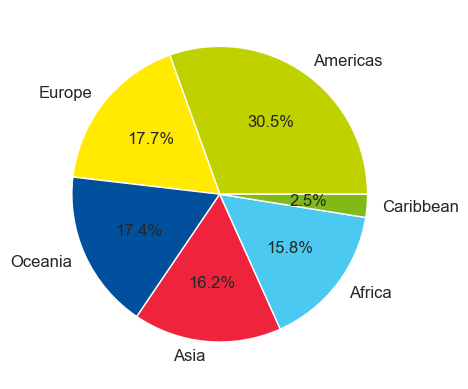

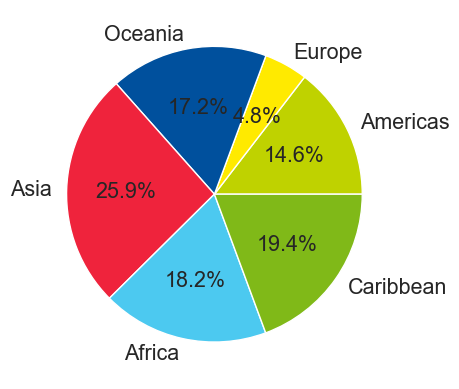

In [181]:
colors = [pal[continent] for continent in bd['Continent']]
plt.pie(bd['Total BCseq'], colors=colors, labels=bd['Continent'], 
        autopct='%1.1f%%', textprops={'fontsize': 12})
plt.show()

colors = [pal[continent] for continent in bd['Continent']]
plt.pie(bd['tot_uptake (tC)'], colors=colors, labels=bd['Continent'], 
        autopct='%1.1f%%', textprops={'fontsize': 15.5})
plt.show()

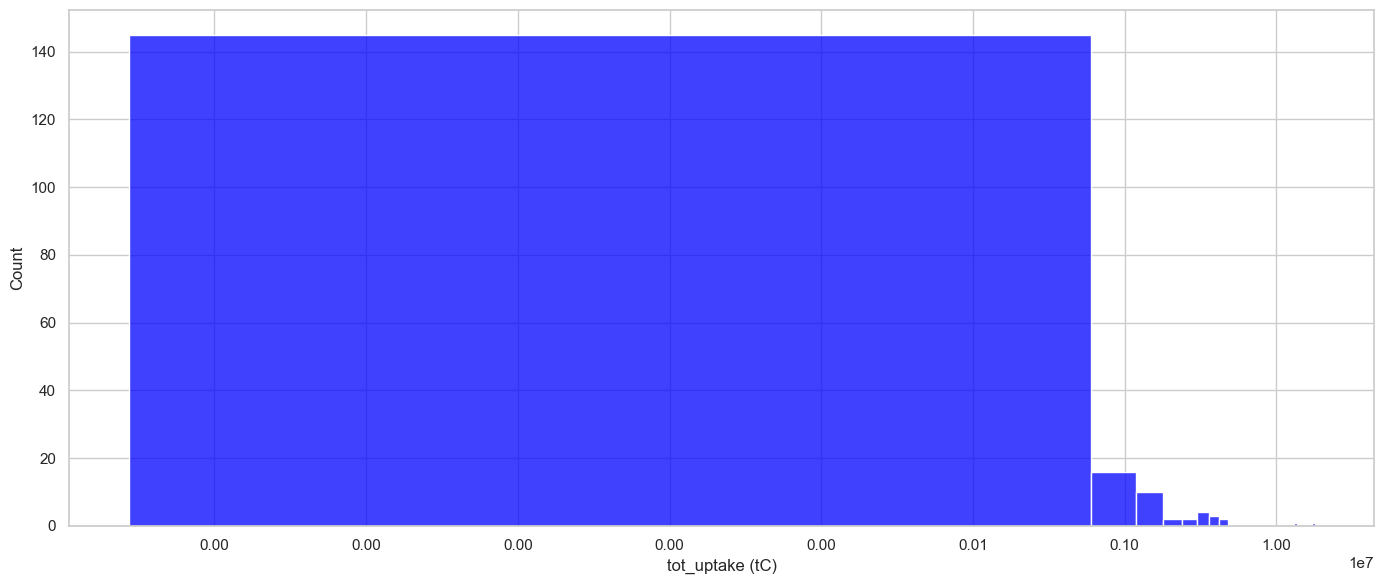

In [182]:
plt.figure(figsize=(14, 6))
sns.histplot(data=ddf, x='tot_uptake (tC)', bins=30, color='blue')
plt.xscale('log')
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
plt.gca().xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100))
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.tight_layout()
plt.show()

In [183]:
def _to_geom(val):
    # déjà shapely ?
    if isinstance(val, BaseGeometry):
        return val
    # WKT ?
    try:
        return wkt.loads(val)
    except Exception:
        pass
    # GeoJSON (string de dict)
    try:
        gj = json.loads(val)
        return shape(gj)
    except Exception:
        pass
    raise ValueError("Format de géométrie non reconnu dans usa_split.csv")

In [184]:
wld = gpd.read_file("data_source/shp/map/ne_110m_admin_0_countries.shp")
wld = wld[wld['ISO_A3'] != 'ATA']
wld.loc[wld['NAME'] == 'France', 'ISO_A3'] = 'FRA'
wld.loc[wld['NAME'] == 'Somaliland', 'ISO_A3'] = 'SOM'
wld.loc[wld['NAME'] == 'Northern Cyprus', 'ISO_A3'] = 'CYP'
wld.loc[wld['NAME'] == 'Norway', 'ISO_A3'] = 'NOR'

wld = wld[['ISO_A3', 'NAME', 'CONTINENT', 'geometry']]

# 2) Load USA split
saal = pd.read_csv('data_source/shp/map/usa_split.csv')[['ISO_A3', 'NAME', 'CONTINENT', 'geometry']].copy()
saal['geometry'] = saal['geometry'].apply(_to_geom)

# 3) Fix USA parts
saal.loc[saal['NAME'] == 'Alaska', 'ISO_A3'] = 'US-AK'
saal.loc[saal['ISO_A3'] == 'USA', 'NAME'] = 'United States'
saal = gpd.GeoDataFrame(saal, geometry='geometry', crs=wld.crs)

world_no_usa = wld[wld['ISO_A3'] != 'USA'].copy()
wld = pd.concat([world_no_usa, saal], ignore_index=True)
wld = gpd.GeoDataFrame(wld, geometry='geometry', crs=wld.crs)

# assert wld.geometry.notnull().all()
# assert wld.crs == wld.crs
world = wld.copy()

def categorize(i, which='BCE'):
    if which == 'BCE':
        if 0 < i < 6e5:
            return '0 – 0.6 MtC'
        elif 6e5 <= i < 12e5:
            return '0.6 – 1.2 MtC'
        elif 12e5 <= i < 14e5:
            return '1.2 – 1.4 MtC'
        elif i >= 14e5:
            return '> 1.4 MtC'
        else:
            return 'No data available'
    elif which == 'BCP':
        if 0 < i < 25e6:
            return '0 – 25 MtC'
        elif 25e6 <= i < 4e7:
            return '25 – 40 MtC'
        elif 4e7 <= i < 5e7:
            return '40 – 50 MtC'
        elif i >= 5e7:
            return '> 50 MtC'
        else:
            return 'No data available'
    else:
        raise ValueError("Invalid category type. Use 'BCE' or 'BCP'.")

dw = data_map.copy()
dw['cat'] = dw['tot_uptake (tC)'].apply(categorize, which='BCE')

country_data = world.set_index('ISO_A3').join(dw.set_index('ISO'))
country_data = country_data[['NAME', 'CONTINENT', 'geometry', 'tot_uptake (tC)', 'cat']]
country_data = country_data.reset_index()
country_data = country_data.rename(columns={'ISO_A3': 'ISO'})
country_data = country_data.dropna(subset='cat')

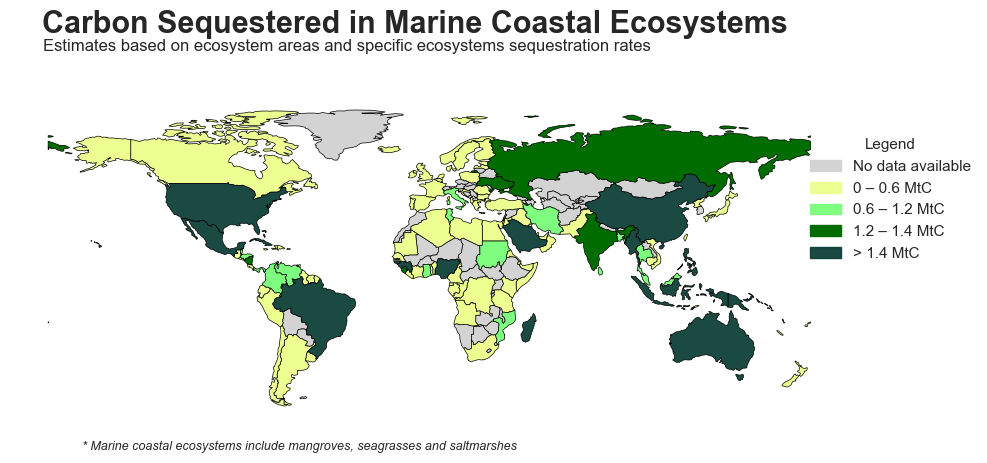

In [185]:
fig, ax = plt.subplots(figsize=(10, 8))
legend_patches = []
for cat, color in color_map2.items():
    subset = country_data[country_data['cat'] == cat]
    subset.plot(ax=ax, color=color, label=cat, edgecolor='black', linewidth=0.5)
    legend_patches.append(Patch(color=color, label=cat))

fig.text(0.05, 0.8, 'Carbon Sequestered in Marine Coastal Ecosystems', 
         fontsize=22, fontweight='bold', va='top', ha='left')
fig.text(0.051, 0.764, "Estimates based on ecosystem areas and specific ecosystems sequestration rates", 
         fontsize=12, va='top', ha='left')

plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 0.45),
           loc='lower center', ncol=1, fontsize=11, 
           title='Legend',
        title_fontsize=11, frameon=False)

ax.axis('off')
plt.figtext(0.525, 0.25, "* Marine coastal ecosystems include mangroves, seagrasses and saltmarshes", ha="right", fontsize=9, style="italic")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

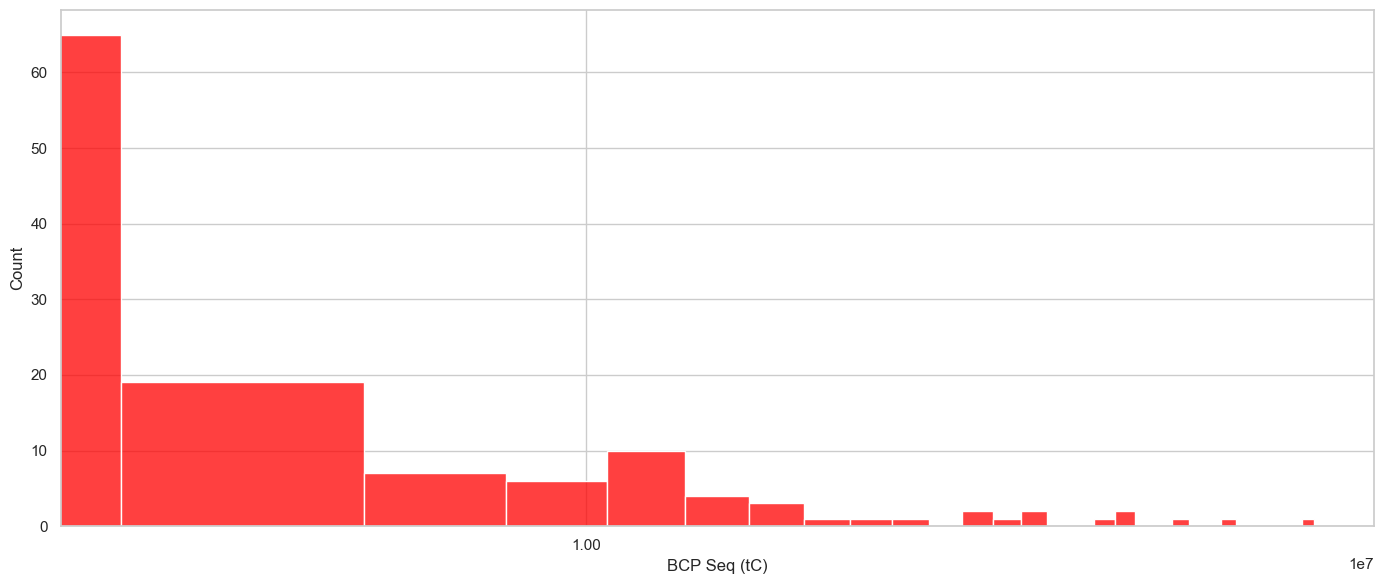

In [186]:
plt.figure(figsize=(14, 6))
sns.histplot(data=dw, x='BCP Seq (tC)', bins=30, color='red')
plt.xscale('log')
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
plt.gca().xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100))
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.tight_layout()
plt.show()

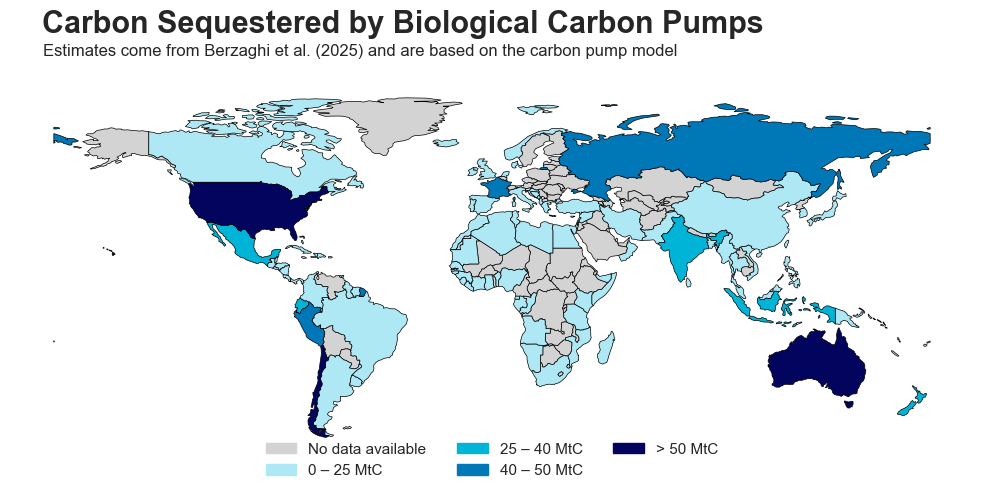

In [187]:
world = wld[['ISO_A3', 'NAME', 'CONTINENT', 'geometry']]
dq = data_map.copy()
dq['cat'] = dq['BCP Seq (tC)'].apply(categorize, which='BCP')
country_data = world.set_index('ISO_A3').join(dq.set_index('ISO'))
country_data = country_data[['NAME', 'CONTINENT', 'geometry', 'BCP Seq (tC)', 'cat']]
country_data = country_data.reset_index()
country_data = country_data.rename(columns={'ISO_A3': 'ISO'})
country_data = country_data.dropna(subset='cat')

fig, ax = plt.subplots(figsize=(10, 8))
legend_patches = []

for cat, color in color_map3.items():
    subset = country_data[country_data['cat'] == cat]
    subset = subset[subset.geometry.is_valid & subset.geometry.notnull()]
    if len(subset) > 0:
        subset.plot(ax=ax, color=color, label=cat, edgecolor='black', linewidth=0.5)
        legend_patches.append(Patch(color=color, label=cat))

fig.text(0.05, 0.8125, 'Carbon Sequestered by Biological Carbon Pumps', 
         fontsize=22, fontweight='bold', va='top', ha='left')
fig.text(0.051, 0.77, "Estimates come from Berzaghi et al. (2025) and are based on the carbon pump model", 
         fontsize=12, va='top', ha='left')

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.1),
           loc='lower center', ncol=3, fontsize=11, 
           title='',
        title_fontsize=11, frameon=False)

ax.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

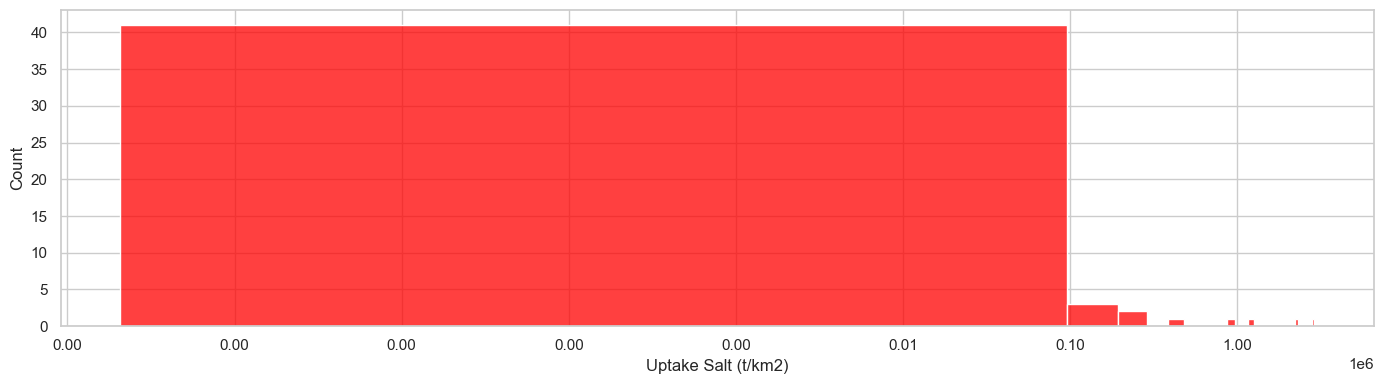

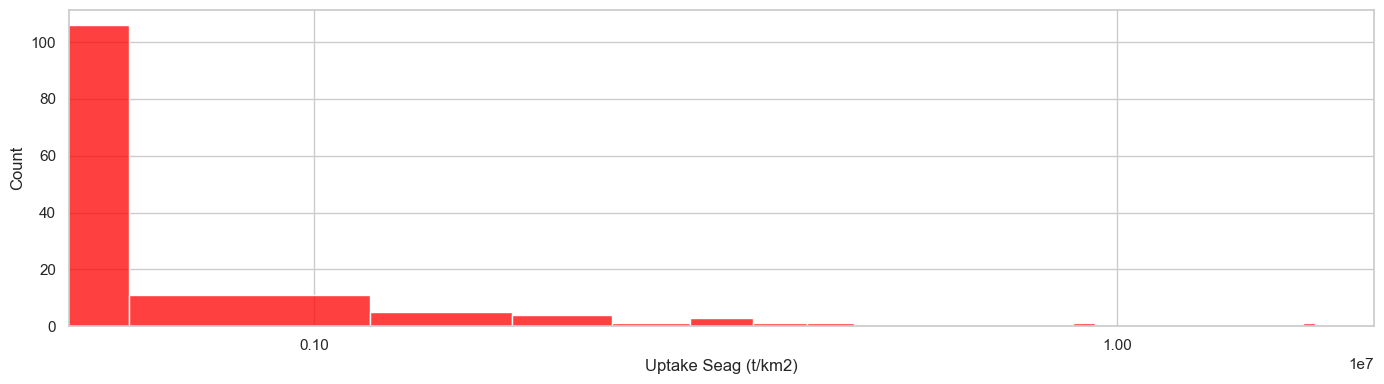

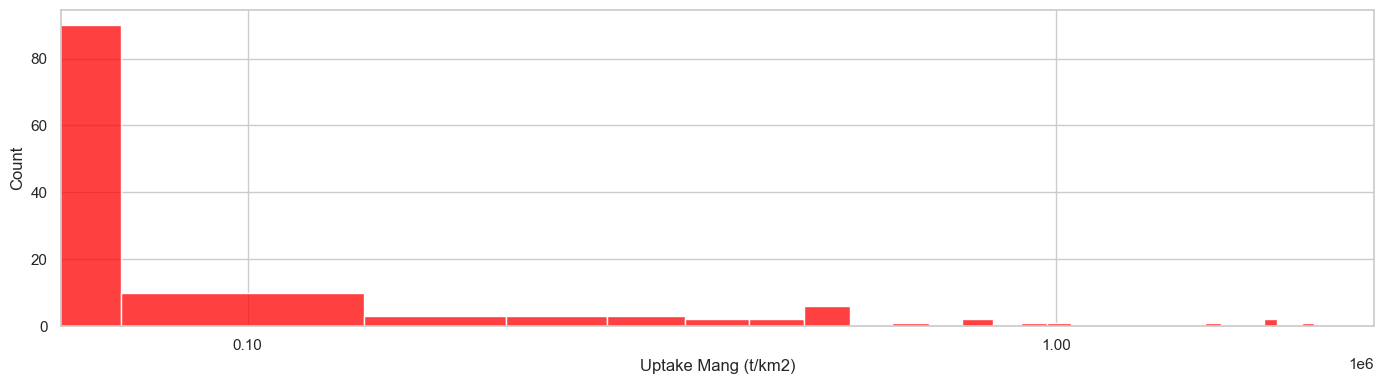

In [188]:
targvars = ['Uptake Salt (t/km2)', 'Uptake Seag (t/km2)', 'Uptake Mang (t/km2)']
colopat = ['#F2C94C', '#E27D60', '#85E3FF']

for var in targvars:
    plt.figure(figsize=(14, 4))
    sns.histplot(data=dq, x=var, bins=30, color='red')
    plt.xscale('log')
    plt.gca().xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))
    plt.gca().xaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=100))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())
    plt.tight_layout()
    plt.show()

In [189]:
def mapper_bce(dtfm:pd.DataFrame, var:str, ecosystem:str, palet:dict, 
               title:str, subtitle:str, wld:pd.DataFrame=wld) -> None:
    """
    Affiche une carte des pays en coloriant les valeurs d'une variable BCE
    selon des seuils définis par écosystème.

    Paramètres :
    ----------
    df : pd.DataFrame
        DataFrame contenant les colonnes 'ISO' et la variable à catégoriser.
    var : str
        Nom de la colonne contenant les valeurs BCE à cartographier.
    ecosystem : str
        Écosystème concerné : 'Mangroves', 'Saltmarshes' ou 'Seagrasses'.
    col_map : dict
        Dictionnaire de correspondance entre les catégories et les couleurs.
    title : str
        Titre principal de la figure.
    subtitle : str
        Sous-titre explicatif.

    Retour :
    -------
    None
    """
    
    def categorize_bce(value: float, ecosystem: str) -> str:
        """Catégorise une valeur selon l’écosystème spécifié."""
        if ecosystem == 'Mangroves':
            if 0 < value < 2e5:
                return '0 – 0.2 MtC'
            elif 2e5 <= value < 4e5:
                return '0.2 – 0.4 MtC'
            elif 4e5 <= value < 8e5:
                return '0.4 – 0.8 MtC'
            elif value >= 8e5:
                return '> 0.8 MtC'
            else:
                return 'No data available'
        elif ecosystem == 'Saltmarshes':
            if 0 < value < 1e5:
                return '0 – 0.1 MtC'
            elif 1e5 <= value < 2e5:
                return '0.1 – 0.2 MtC'
            elif 2e5 <= value < 5e5:
                return '0.2 – 0.5 MtC'
            elif value >= 5e5:
                return '> 0.5 MtC'
            else:
                return 'No data available'
        elif ecosystem == 'Seagrasses':
            if 0 < value < 1e5:
                return '0 – 0.1 MtC'
            elif 1e5 <= value < 1e6:
                return '0.1 – 1 MtC'
            elif 1e6 <= value < 2e6:
                return '1 – 2 MtC'
            elif value >= 2e6:
                return '> 2 MtC'
            else:
                return 'No data available'
        elif ecosystem == 'areas':
            if 0 < value < 1e3:
                return '0 – 1,000 km²'
            elif 1e3 <= value < 2e3:
                return '1,000 – 2,000 km²'
            elif 2e3 <= value < 5e3:
                return '2,000 – 5,000 km²'
            elif value >= 5e3:
                return '> 5,000 km²'
        elif ecosystem == 'Total BCW uptake':
            if 0 < value < 5e6:
                return '0 - 5 MtC'
            elif 5e6 <= value < 10e6:
                return '5 – 10 MtC'
            elif 10e6 <= value < 30e6:
                return '10 – 30 MtC'
            elif value >= 30e6:
                return '> 30 MtC'
        return 'No data available'
    
    def generate_col_map(df: pd.DataFrame, palette: str = 'Greens') -> dict:
        """
        Génère un dictionnaire de couleurs pour chaque catégorie dans df['cat'].
        """
        # Liste des catégories triées, avec 'No data available' toujours en premier si présent
        categories = sorted(df['cat'].dropna().unique().tolist())
        if 'No data available' in categories:
            categories.remove('No data available')
        categories = ['No data available'] + categories

        # Création de la palette (hors 'No data available')
        cmap = plt.get_cmap(palette)
        colors = [mcolors.to_hex(cmap(i / max(len(categories) - 2, 1))) for i in range(len(categories) - 1)]

        # Dictionnaire final avec 'No data available' en gris
        col_map = {'No data available': '#D3D3D3'}
        for cat, color in zip(categories[1:], colors):
            col_map[cat] = color

        return col_map
    
    # Chargement des frontières pays
    world = wld[['ISO_A3', 'NAME', 'CONTINENT', 'geometry']]
    world = world[world['NAME'] != 'Antarctica']
    
    # Catégorisation de la variable
    df = dtfm.copy()
    df['cat'] = df[var].apply(lambda x: categorize_bce(x, ecosystem=ecosystem))
    
    # Jointure avec la carte
    country_data = world.set_index('ISO_A3').join(df.set_index('ISO'))
    country_data = country_data[['NAME', 'CONTINENT', 'geometry', var, 'cat']].reset_index()
    country_data = country_data.rename(columns={'ISO_A3': 'ISO'})
    country_data['cat'] = country_data['cat'].fillna('No data available')
    # country_data = country_data.fillna('No data available')

    # Affichage de la carte
    fig, ax = plt.subplots(figsize=(10, 8))
    legend_elements = []
    col_map = generate_col_map(country_data, palette=palet)
    
    for category, color in col_map.items():
        subset = country_data[country_data['cat'] == category]
        subset = subset[subset.geometry.is_valid & subset.geometry.notnull()]
        if not subset.empty:
            subset.plot(ax=ax, color=color, label=category, edgecolor='black', linewidth=0.5)
            legend_elements.append(Patch(color=color, label=category))

    # Titre et légende
    fig.text(0.05, 0.8, title, fontsize=24, fontweight='bold', va='top', ha='left')
    fig.text(0.051, 0.76, subtitle, fontsize=15, va='top', ha='left')

    plt.legend(
        handles=legend_elements,
        bbox_to_anchor=(0.5, -0.1),
        loc='lower center',
        fontsize=12,
        frameon=False,
        ncol=3
    )

    ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

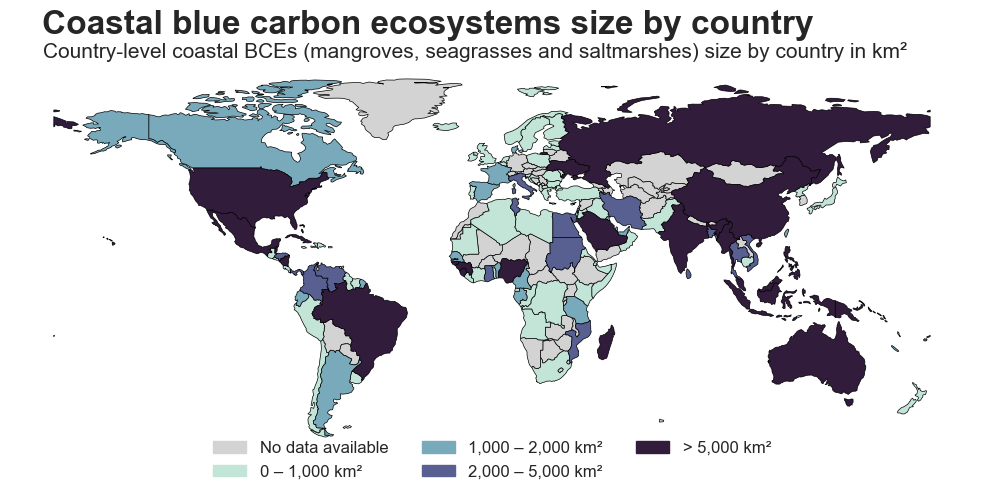

In [190]:
var = 'Total_BCE_area_km2'
palet = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
title = 'Coastal blue carbon ecosystems size by country'
subtitle = "Country-level coastal BCEs (mangroves, seagrasses and saltmarshes) size by country in km²"
ddb = data_map.copy()
ddb['Total_BCE_area_km2'] = ddb[['saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2']].sum(axis=1, skipna=True)
mapper_bce(ddb, var, 'areas', palet, title, subtitle)

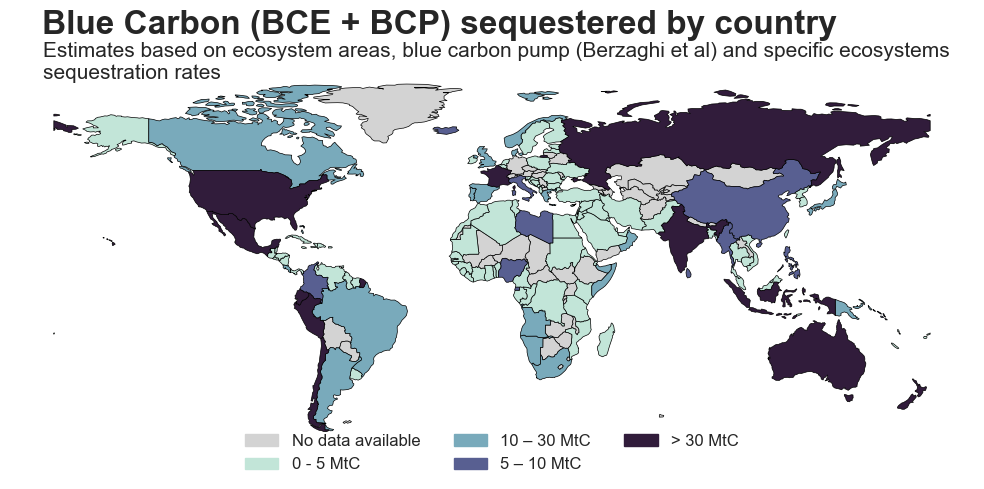

In [191]:
var = 'Total BCseq'
palet = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
title = 'Blue Carbon (BCE + BCP) sequestered by country'
subtitle = "Estimates based on ecosystem areas, blue carbon pump (Berzaghi et al) and specific ecosystems \nsequestration rates"
mapper_bce(ddb, var, 'Total BCW uptake', palet, title, subtitle)

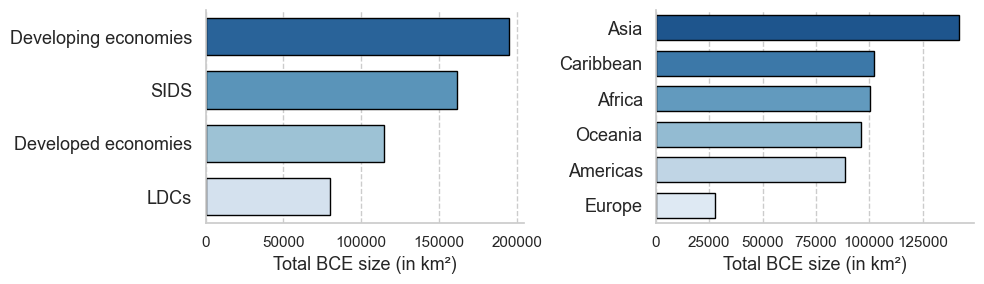

In [192]:
grou = ddf.groupby('Groups')['Total_BCE_area_km2'].sum().sort_values(ascending=False).reset_index()
grou['Total_BCE_area_km2'] = grou['Total_BCE_area_km2']

grou2 = ddf.groupby('Continent')['Total_BCE_area_km2'].sum().sort_values(ascending=False).reset_index()
grou2['Total_BCE_area_km2'] = grou2['Total_BCE_area_km2']

# on 1 row and 2 cols
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
sns.set_theme(style='whitegrid')
# Groups
sns.barplot(data=grou, x='Total_BCE_area_km2', y='Groups', width=0.7, palette='Blues_r', ax=axs[0], edgecolor='black')
axs[0].set_ylabel('')
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=13)
axs[0].set_xlabel('Total BCE size (in km²)', fontsize=13)
sns.despine(ax=axs[0])
axs[0].grid(True, axis='x', linestyle='--')

# Continents
sns.barplot(data=grou2, x='Total_BCE_area_km2', y='Continent', width=0.7, palette='Blues_r', ax=axs[1], edgecolor='black')
axs[1].set_ylabel('')
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=13)
axs[1].set_xlabel('Total BCE size (in km²)', fontsize=13)
sns.despine(ax=axs[1])
axs[1].grid(True, axis='x', linestyle='--')

plt.tight_layout()
plt.show()

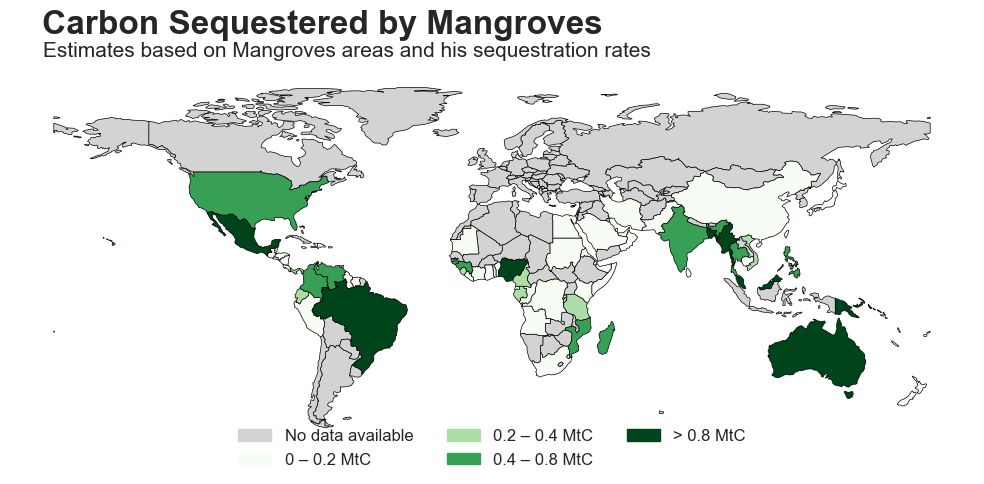

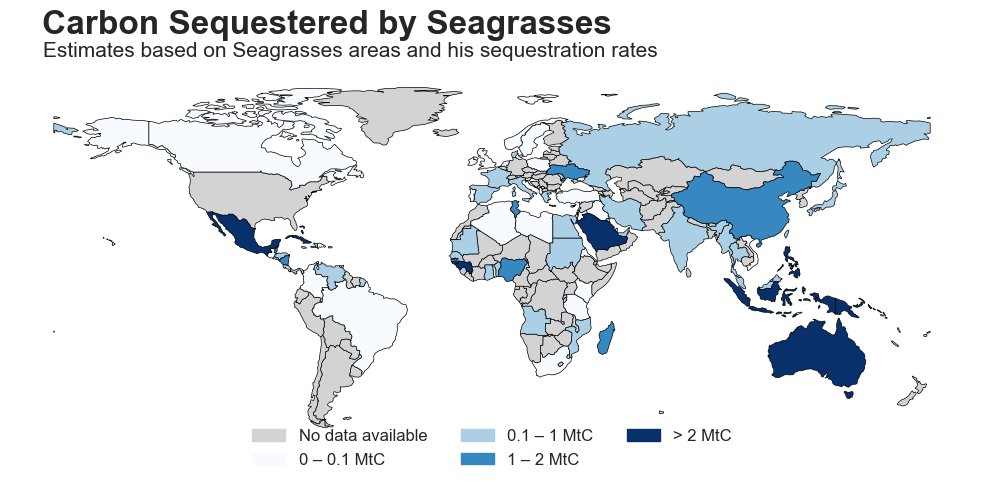

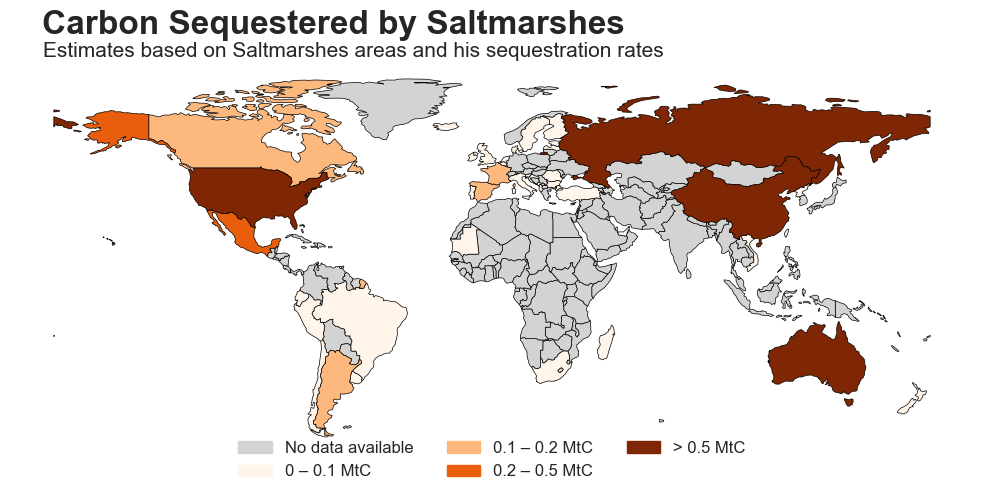

In [193]:
Dictvars = {
    'Mangroves': ['Uptake Mang (t/km2)', 'Greens', 'Carbon Sequestered by Mangroves',
                  'Estimates based on Mangroves areas and his sequestration rates'],
    'Seagrasses': ['Uptake Seag (t/km2)', 'Blues', 'Carbon Sequestered by Seagrasses',
                   'Estimates based on Seagrasses areas and his sequestration rates'],
    'Saltmarshes': ['Uptake Salt (t/km2)', 'Oranges', 'Carbon Sequestered by Saltmarshes',
                    'Estimates based on Saltmarshes areas and his sequestration rates']
}

for ecosystem, (var, palet, title, subtitle) in Dictvars.items():
    mapper_bce(ddb, var, ecosystem, palet=palet, title=title, subtitle=subtitle)

In [194]:
ddf.groupby('Groups')['tot_uptake (tC)'].mean().sort_values(ascending=False).reset_index()

Groups  tot_uptake (tC)
0                  LDCs     699,556.4029
1  Developing economies     679,221.7019
2                  SIDS     639,253.5858
3   Developed economies     562,928.6476

In [195]:
ddf.groupby('Groups')['Total BCseq'].mean().sort_values(ascending=False).reset_index()

Groups     Total BCseq
0   Developed economies 10,234,783.8548
1  Developing economies  7,043,086.7367
2                  SIDS  3,129,045.6259
3                  LDCs  2,879,513.1112

<function matplotlib.pyplot.show(close=None, block=None)>

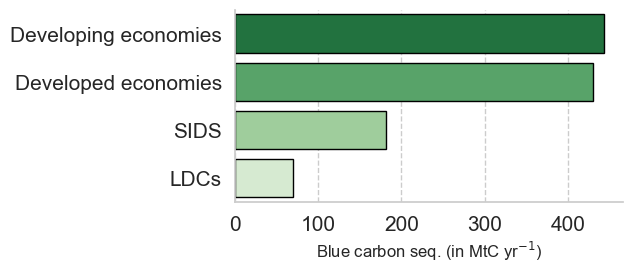

In [196]:
grou = ddf.groupby('Groups')['Total BCseq'].sum().sort_values(ascending=False).reset_index()
grou['Total BCseq'] = grou['Total BCseq']/1e6

sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 2.5))
sns.barplot(data=grou, x='Total BCseq', y='Groups', width=0.8, palette='Greens_r', edgecolor='black')
# text on bars
# for p in plt.gca().patches:
#     plt.gca().text(p.get_width() + 10, p.get_y() + p.get_height()/2, 
#                    f'{p.get_width():.2f}', va='center', ha='left', fontsize=9, color='steelblue')
plt.ylabel('')
plt.xlabel('Blue carbon seq. (in MtC yr$^{-1}$)')
sns.despine()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, axis='x', linestyle='--')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

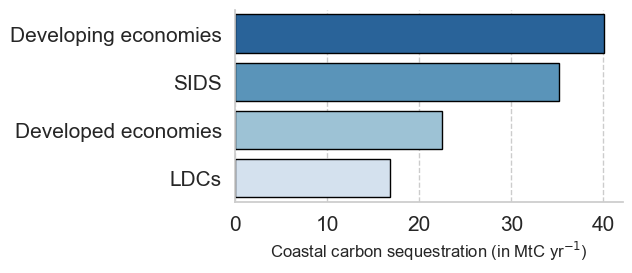

In [197]:
grou = ddf.groupby('Groups')['tot_uptake (tC)'].sum().sort_values(ascending=False).reset_index()
grou['tot_uptake (tC)'] = grou['tot_uptake (tC)']/1e6

sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 2.5))
sns.barplot(data=grou, x='tot_uptake (tC)', y='Groups', width=0.8, palette='Blues_r', edgecolor='black')
# text on bars
# for p in plt.gca().patches:
#     plt.gca().text(p.get_width() + 10, p.get_y() + p.get_height()/2, 
#                    f'{p.get_width():.2f} MtC', va='center', ha='left', fontsize=9)
plt.ylabel('')
plt.xlabel('Coastal carbon sequestration (in MtC yr$^{-1}$)')
sns.despine()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True, axis='x', linestyle='--')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

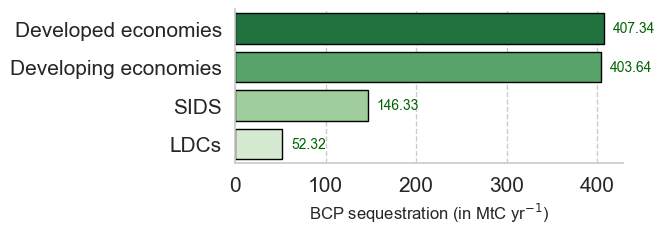

In [198]:
grou = ddf.groupby('Groups')['BCP Seq (tC)'].sum().sort_values(ascending=False).reset_index()
grou['BCP Seq (tC)'] = grou['BCP Seq (tC)']/1e6

sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 2))
sns.barplot(data=grou, x='BCP Seq (tC)', y='Groups', width=0.8, palette='Greens_r', edgecolor='black')
# text on bars
for p in plt.gca().patches:
    plt.gca().text(p.get_width() + 10, p.get_y() + p.get_height()/2,
                   f'{p.get_width():.2f}', va='center', ha='left', fontsize=10, color='darkgreen')
plt.ylabel('')
plt.xlabel('BCP sequestration (in MtC yr$^{-1}$)')
sns.despine()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid(True, axis='x', linestyle='--')
plt.show

In [199]:
t = ddf[['ISO', 'Continent', 'Groups', 'Uptake Salt (t/km2)', 'Uptake Seag (t/km2)',
     'Uptake Mang (t/km2)', 'BCP Seq (tC)']].copy()
# Only sum numeric columns to avoid TypeError
ecosystem_totals = t.select_dtypes(include='number').sum()
ecosystem_totals = ecosystem_totals / 1e6 
ecosystem_totals = ecosystem_totals.sort_values(ascending=False)  # Fixing the sort_values issue
print('Sequestration by NCS (Natural Carbon Sink) in MtC by year')
ecosystem_totals

Sequestration by NCS (Natural Carbon Sink) in MtC by year


BCP Seq (tC)          1,017.1517
Uptake Seag (t/km2)      86.0940
Uptake Mang (t/km2)      20.5495
Uptake Salt (t/km2)       9.2657
dtype: float64

In [200]:
def circle_area_plot(
    ecosystem_totals: pd.Series, diameters: list = None, colors: list = None, label_colors: list = None
) -> None:
    """
    Plot a circle area diagram based on values from a pandas Series.

    Args:
        ecosystem_totals (pd.Series): Series where index are labels (e.g. ecosystem names) and values are numeric (e.g. carbon uptake).
        diameters (list, optional): Diameters for the circles (must match the length of ecosystem_totals). If None, scaled automatically.
        colors (list, optional): Fill colors for the circles.
        label_colors (list, optional): Text label colors for ecosystem names.

    Returns:
        None
    """

    try:
        n = len(ecosystem_totals)
        if n == 0:
            print("Nothing to plot: empty series.")
            return

        # Default diameters based on relative size if not provided
        if diameters is None:
            max_val = ecosystem_totals.max()
            diameters = [4 + 16 * (val / max_val)**0.5 for val in ecosystem_totals]  # square root scaling

        # Fallback colors if not enough provided
        if colors is None or len(colors) < n:
            colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'plum', 'skyblue']
            colors = (colors * (n // len(colors) + 1))[:n]

        if label_colors is None or len(label_colors) < n:
            label_colors = ['black'] * n

        labels = ecosystem_totals.index.tolist()
        uptake_values = ecosystem_totals.values.tolist()

        # Positioning: even spacing based on max diameter
        circle_radii = [d / 2 for d in diameters]
        # spacing = max(circle_radii) + 1
        # positions = [i * (2 * spacing) + spacing for i in range(n)]
        border_spacing = 1.5

        # Calcul des positions des centres des cercles
        positions = []
        current_x = 0

        for i, radius in enumerate(circle_radii):
            if i == 0:
                current_x = radius
            else:
                previous_radius = circle_radii[i - 1]
                current_x += previous_radius + radius + border_spacing
            positions.append(current_x)
        # Create plot
        plt.style.use('default')
        fig, ax = plt.subplots(figsize=(3 * n, 12))
        for x, diameter, color, text_color, label, value in zip(positions, diameters, colors, label_colors, labels, uptake_values):
            circle = plt.Circle((x, 5), diameter / 2, color=color, alpha=0.7)
            ax.add_artist(circle)
            font_size = max(15, min(25, diameter * 2.5))
            if value < 1e3:
                ax.text(x, 5, f"{value:.2f}\nMtC yr⁻¹", fontsize=font_size, 
                        ha='center', va='center', color='black')
            else:
                ax.text(x, 5, f"{value/1e3:.2f}\nGtC yr⁻¹", fontsize=font_size, 
                        ha='center', va='center', color='black')
            ax.text(x, 5 - diameter / 2 - 0.7, label, fontsize=19, ha='center', va='center', color=text_color)

        ax.set_aspect('equal')
        ax.set_xlim(-2, max(positions) + border_spacing * 4)
        ax.set_ylim(-10, 18)
        ax.axis('off')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

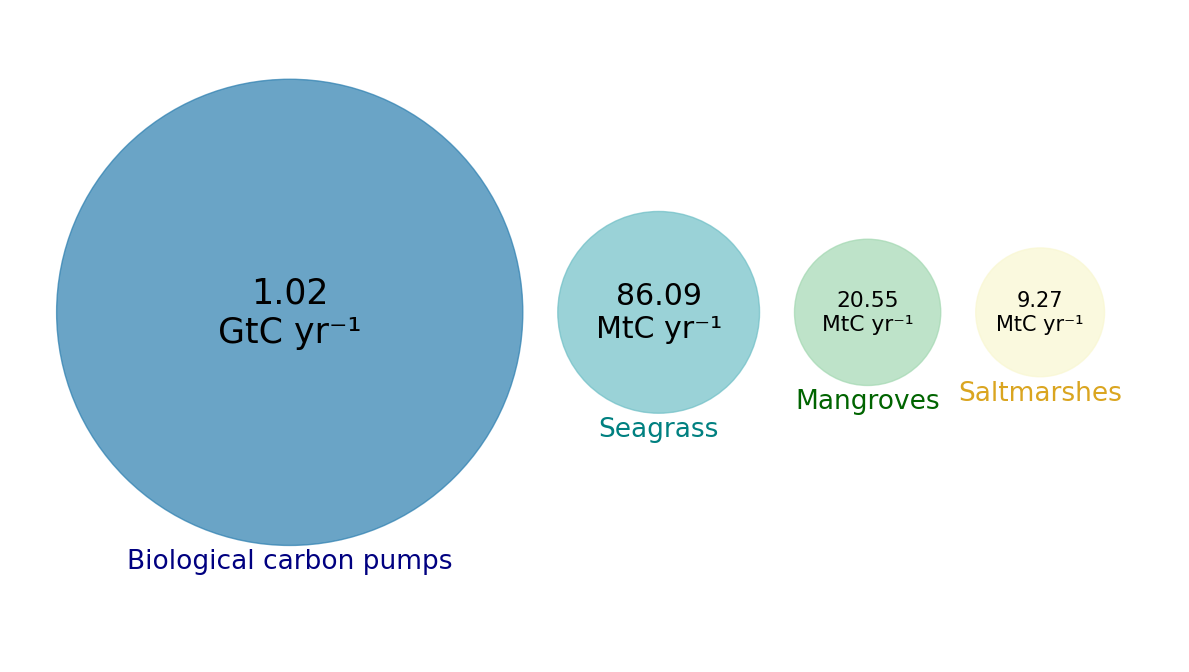

In [201]:
ecosystem_totals.index = ["Biological carbon pumps", "Seagrass", "Mangroves", "Saltmarshes"]
circle_area_plot(
    ecosystem_totals=ecosystem_totals,
    colors=['#2b7eaf', '#6fbfc6', '#a3d8b2', '#f9f7d1'],
    label_colors=['navy', 'teal', 'darkgreen', 'goldenrod']
)


In [202]:
uptake_by_continent = t.groupby('Continent').agg({
    'BCP Seq (tC)': 'sum',
    'Uptake Salt (t/km2)': 'sum',
    'Uptake Seag (t/km2)': 'sum',
    'Uptake Mang (t/km2)': 'sum'
}).reset_index()
uptake_by_continent = uptake_by_continent.rename(columns={
    'BCP Seq (tC)': 'Carbon Pumps',
    'Uptake Salt (t/km2)': 'Saltmarshes',
    'Uptake Seag (t/km2)': 'Seagrasses',
    'Uptake Mang (t/km2)': 'Mangroves'
})
uptake_by_continent[['Carbon Pumps', 'Saltmarshes', 
                     'Seagrasses', 'Mangroves']] = uptake_by_continent[['Carbon Pumps', 'Saltmarshes', 
                                                                        'Seagrasses', 'Mangroves']] / 1e6
uptake_by_continent.to_csv('data_source/summary/sequestration_by_continent.csv', index=False)
uptake_by_continent

Continent  Carbon Pumps  Saltmarshes  Seagrasses  Mangroves
0     Africa      157.5229       0.0239     15.9703     5.1180
1   Americas      328.6054       4.0613      6.0372     6.7745
2       Asia      153.5396       0.9741     23.7886     5.2224
3  Caribbean        6.0787       0.0100     21.9963     0.4350
4     Europe      194.5454       1.9525      3.5854     0.0000
5    Oceania      176.8597       2.2439     14.7158     2.9997

# Regressions

In [203]:
sns.set_theme(style='whitegrid')

Regression equation: $y = 9.61 + 0.70x$ | $R² = 0.20$


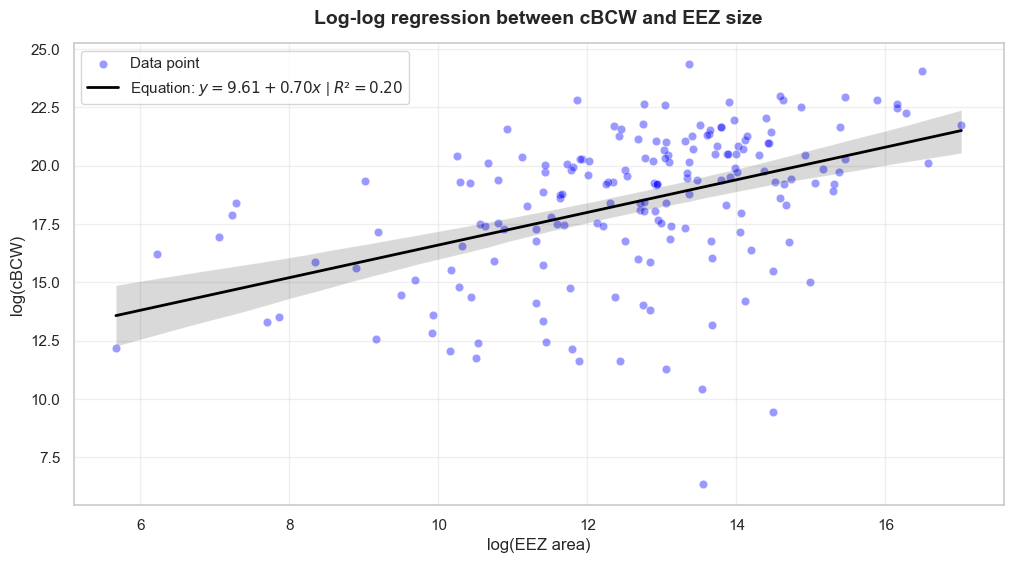

In [204]:
df = data.copy()
df = df[(df['Area_EEZ_KM2'] > 0) & (df['cBCW'] > 0)].copy()
df['log_EEZ'] = np.log(df['Area_EEZ_KM2'])
df['log_cBCW'] = np.log(df['cBCW'])
df = df.dropna(subset=['log_EEZ', 'log_cBCW'])
X = df['log_EEZ']
y = df['log_cBCW']
X = sm.add_constant(X)  # intercept

model = sm.OLS(y, X).fit()
a_hat = model.params['const']  # Intercept (a^)
b_hat = model.params['log_EEZ']  # Coefficient (b^)
R2 = model.rsquared  # Coefficient R²

# regression formula
equation = f"$y = {a_hat:.2f} + {b_hat:.2f}x$ | $R² = {R2:.2f}$"  
print(f"Regression equation: {equation}")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='log_EEZ', y='log_cBCW', alpha=0.4, color='blue')
sns.regplot(x='log_EEZ', y='log_cBCW', data=df, scatter=False, color='black', line_kws={"linewidth": 2})
plt.xlabel('log(EEZ area)')
plt.ylabel('log(cBCW)')
plt.title('Log-log regression between cBCW and EEZ size', 
          fontweight='bold', fontsize=14, pad=14)
plt.legend(labels=['Data point', f'Equation: {equation}'], loc='best')
plt.grid(alpha=0.3)
plt.show()

In [205]:
a = data.copy()
a['total_BCE_area'] = a[['saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2']].fillna(0).sum(axis=1)
a = a[['ISO', 'Groups', 'Population', 'Area_EEZ_KM2', 'Area_EEZ_KM2_per_capita', 'total_BCE_area',
       'tot_uptake (tC)', 'cBCW', 'cBCW_per_capita']]
a.rename(columns={'Area_EEZ_KM2':'EEZ'}, inplace=True)
a['total_BCE_area'] = a['total_BCE_area'].replace(0, np.nan)
a['log EEZ'] = np.log(a['EEZ'])
a['log BCE'] = np.log(a['total_BCE_area'])
a.head()

ISO                Groups      Population            EEZ  \
0     AE                   NaN             NaN     6,199.3060   
1    AFG                  LDCs 41,454,761.0000   641,860.3931   
2  US-AK                   NaN             NaN 5,193,058.2890   
3    ALB   Developed economies  2,811,655.0000    40,953.5448   
4    DZA  Developing economies 46,164,219.0000 2,444,283.5600   

   Area_EEZ_KM2_per_capita  total_BCE_area  tot_uptake (tC)             cBCW  \
0                      NaN             NaN              NaN              NaN   
1                   0.0155             NaN              NaN              NaN   
2                      NaN      1,771.4588     305,536.7711 642,830,100.1929   
3                   0.0146         90.5973      17,540.1574  36,903,385.1708   
4                   0.0529         40.4832       8,934.6418  18,797,922.9248   

   cBCW_per_capita  log EEZ  log BCE  
0              NaN   8.7322      NaN  
1              NaN  13.3721      NaN  
2              NaN  15.4628   7.4796  
3          13.1251  10.6202   4.5064  
4           0.4072  14.7093   3.7009

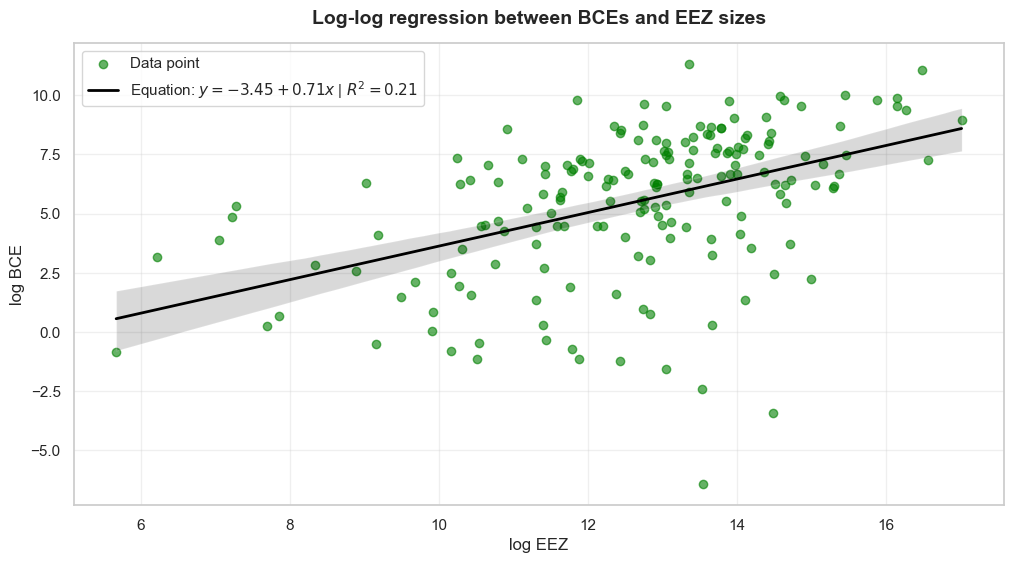

In [206]:
a = a.dropna(subset=['log EEZ', 'log BCE'])
X = a['log EEZ']
y = a['log BCE']
X = sm.add_constant(X)  # intercept
model = sm.OLS(y, X).fit()
a_hat = model.params['const']  # Interception (a^)
b_hat = model.params['log EEZ']  # Coefficient (b^)

R2 = model.rsquared  # Coefficient R²
equation = f"$y = {a_hat:.2f} + {b_hat:.2f}x$ | $R^2 = {R2:.2f}$"

plt.figure(figsize=(12, 6))
plt.scatter(a['log EEZ'], a['log BCE'], color='green', alpha=0.6)
sns.regplot(x='log EEZ', y='log BCE', data=a, scatter=False, color='black', line_kws={"linewidth": 2})
plt.xlabel('log EEZ')
plt.ylabel('log BCE')
plt.title('Log-log regression between BCEs and EEZ sizes', 
          fontweight='bold', fontsize=14, pad=14)
plt.legend(labels=['Data point', f'Equation: {equation}'], loc='best')
plt.grid(alpha=0.3)
plt.show()

Regression equation: $y = 11.22 + 0.46x$ | $R² = 0.17$


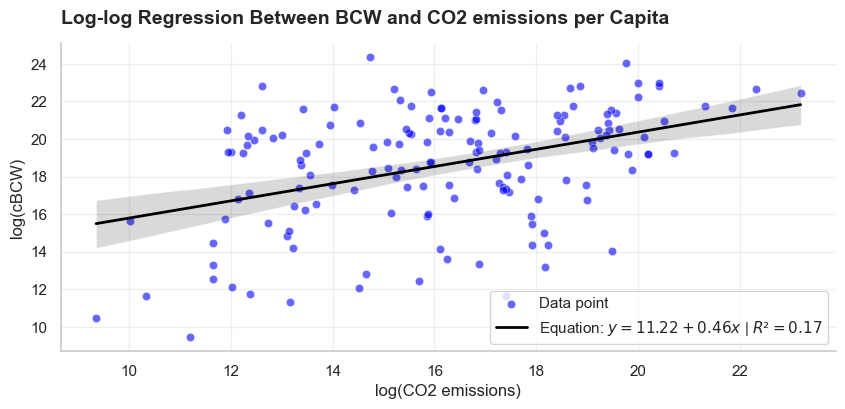

Regression equation: $y = -3.45 + 0.71x$ | $R² = 0.21$


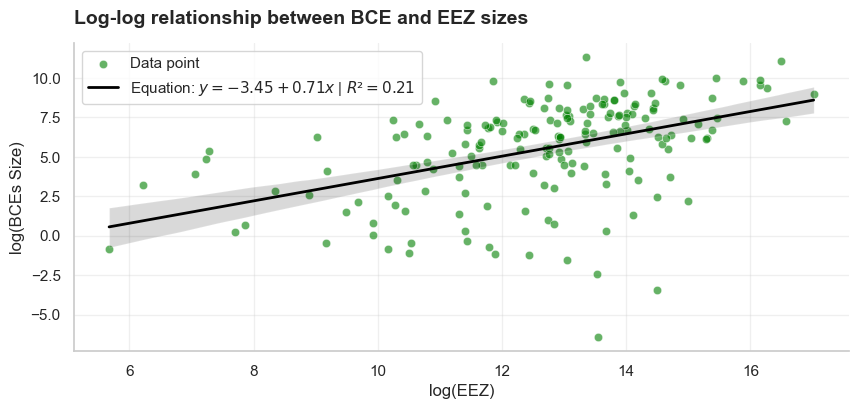

Regression equation: $y = -8.27 + -0.10x$ | $R² = 0.00$


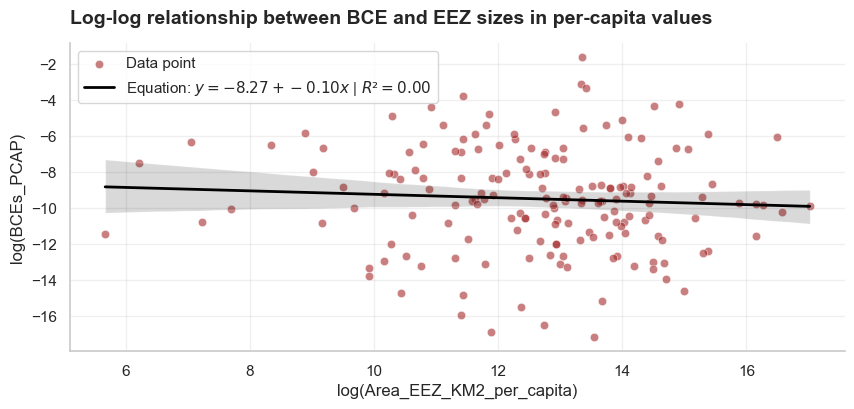

Regression equation: $y = 13.33 + 0.36x$ | $R² = 0.09$


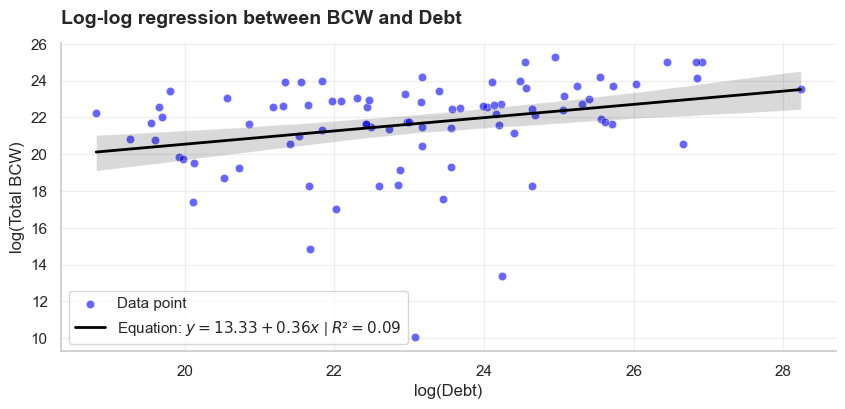

Regression equation: $y = 5.74 + 1.17x$ | $R² = 0.40$


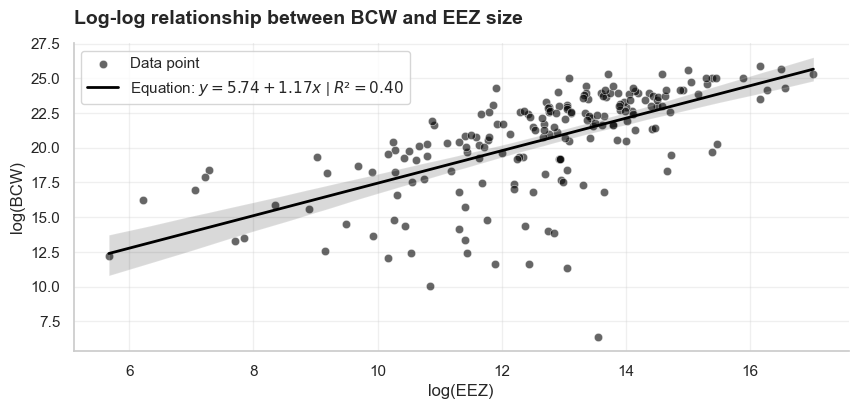

In [207]:
def regplotter(dtf, var, varname, title, xlab, yvar='cBCW', col="blue"):
   df = dtf.copy()
   df = df[(df[var] > 0) & (df[yvar] > 0)].copy()
   df[varname] = np.log(df[var])
   df['log_cBCW'] = np.log(df[yvar])
   df = df.dropna(subset=[varname, 'log_cBCW'])
   X = df[varname]
   y = df['log_cBCW']
   X = sm.add_constant(X)  # intercept

   model = sm.OLS(y, X).fit()
   a_hat = model.params['const']  # Intercept (a^)
   b_hat = model.params[varname]  # Coefficient (b^)
   R2 = model.rsquared  # Coefficient R²

   equation = f"$y = {a_hat:.2f} + {b_hat:.2f}x$ | $R² = {R2:.2f}$"  
   print(f"Regression equation: {equation}")
   plt.figure(figsize=(10, 4))
   sns.scatterplot(data=df, x=varname, y='log_cBCW', alpha=0.6, color=col)
   sns.regplot(x=varname, y='log_cBCW', data=df, scatter=False, color='black', line_kws={"linewidth": 2})
   plt.xlabel(f'log({xlab})')
   plt.ylabel(f'log({yvar})')
   plt.title(title, loc='left',
         fontweight='bold', fontsize=14, pad=14)
   plt.legend(labels=['Data point', f'Equation: {equation}'], loc='best')
   plt.grid(alpha=0.3)
   sns.despine()
   plt.show()

regplotter(data, 'CO2_emissions_2023', 'log CO2',
           'Log-log Regression Between BCW and CO2 emissions per Capita',
           'CO2 emissions')

ddf['BCEs area'] = ddf[['saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2']].fillna(0).sum(axis=1).replace(0, np.nan)
ddt = data.copy()
ddt['BCEs Size'] = ddt[['saltmarshes_area_km2', 'seagrasses_area_km2', 'mangroves_area_km2']].fillna(0).sum(axis=1).replace(0, np.nan)
ddt['Area_EEZ_KM2_per_capita'] = ddt['Area_EEZ_KM2'] / ddt['Population']
ddt['BCEs_PCAP'] = ddt['BCEs Size'] / ddt['Population']
ddt['cBCW'] = ddt['cBCW']
ddt['BCW'] = ddt['Total BCW']
ddt['EEZ'] = ddt['Area_EEZ_KM2']

regplotter(ddt, 'Area_EEZ_KM2', 'log(EEZ Size)',
           'Log-log relationship between BCE and EEZ sizes',
              'EEZ', 'BCEs Size', 'green')
regplotter(ddt, 'Area_EEZ_KM2', 'log(EEZ)',
           'Log-log relationship between BCE and EEZ sizes in per-capita values',
              'Area_EEZ_KM2_per_capita', 'BCEs_PCAP', 'brown')
regplotter(data, 'Debt (2015 US$)', 'log Debt',
           'Log-log regression between BCW and Debt',
              'Debt', 'Total BCW')

regplotter(ddt, 'EEZ', 'log(EEZ)',
           'Log-log relationship between BCW and EEZ size',
              'EEZ', 'BCW', 'black')

Regression equation: $y = 11.22 + 0.46x$ | $R² = 0.17$

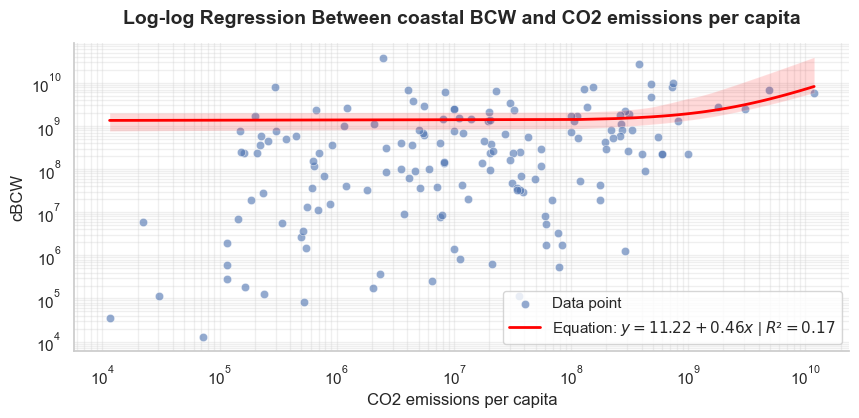

Regression equation: $y = 10.13 + 0.41x$ | $R² = 0.12$


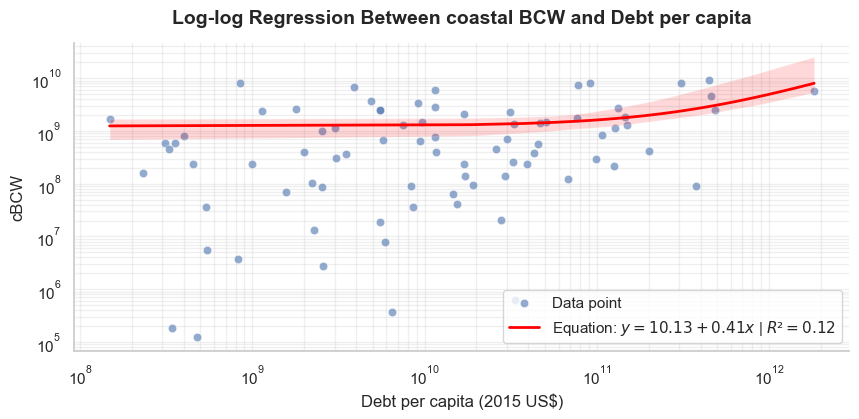

Regression equation: $y = 7.82 + 0.90x$ | $R² = 0.38$


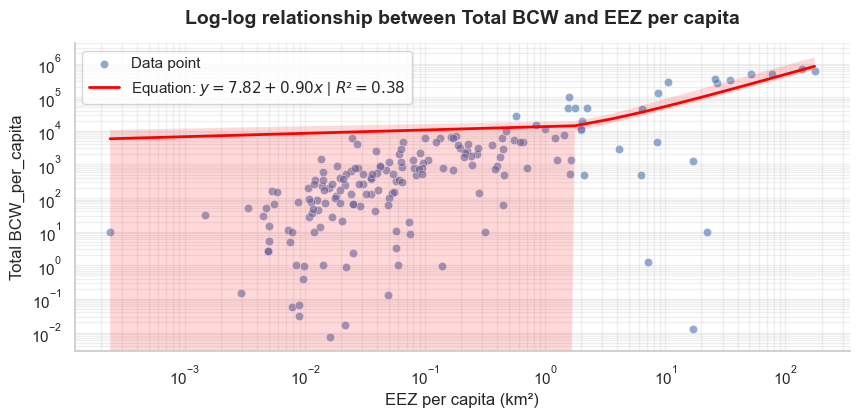

In [208]:
def regplotter_log_axes(dtf, var, varname, title, xlab, yvar='BCW'):
    df = dtf.copy()
    df = df[(df[var] > 0) & (df[yvar] > 0)].copy()
    df = df.dropna(subset=[var, yvar])

    X = np.log(df[var])
    y = np.log(df[yvar])
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    a_hat = model.params['const']
    b_hat = model.params[var]
    R2 = model.rsquared

    equation = f"$y = {a_hat:.2f} + {b_hat:.2f}x$ | $R² = {R2:.2f}$"
    print(f"Regression equation: {equation}")

    plt.figure(figsize=(10, 4))
    sns.scatterplot(data=df, x=var, y=yvar, alpha=0.6)
    sns.regplot(data=df, x=var, y=yvar, scatter=False, color='red', line_kws={"linewidth": 2})
    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel(xlab)
    plt.ylabel(yvar)
    plt.title(title, fontweight='bold', fontsize=14, pad=14)
    plt.legend(labels=['Data point', f'Equation: {equation}'], loc='best')
    plt.grid(alpha=0.3, which='both')
    sns.despine()
    plt.show()

# BCW vs CO2 emissions per capita
regplotter_log_axes(
    dtf=data,
    var='CO2_emissions_2023',          
    varname='log CO2',           
    title='Log-log Regression Between coastal BCW and CO2 emissions per capita',
    xlab='CO2 emissions per capita',
    yvar='cBCW'
)

# BCW vs Debt per capita
regplotter_log_axes(
    dtf=data,
    var='Debt (2015 US$)',
    varname='log Debt',
    title='Log-log Regression Between coastal BCW and Debt per capita',
    xlab='Debt per capita (2015 US$)',
    yvar='cBCW'
)

# Total BCW per capita vs EEZ per capita
regplotter_log_axes(
    dtf=data,
    var='Area_EEZ_KM2_per_capita',
    varname='log EEZ',
    title='Log-log relationship between Total BCW and EEZ per capita',
    xlab='EEZ per capita (km²)',
    yvar='Total BCW_per_capita'
)


# Barplots

### bcw

In [209]:
df = data.copy()
by_country = df[['ISO', 'cBCW_per_capita', 'Groups']]
by_country = by_country.sort_values(by='cBCW_per_capita', ascending=False)

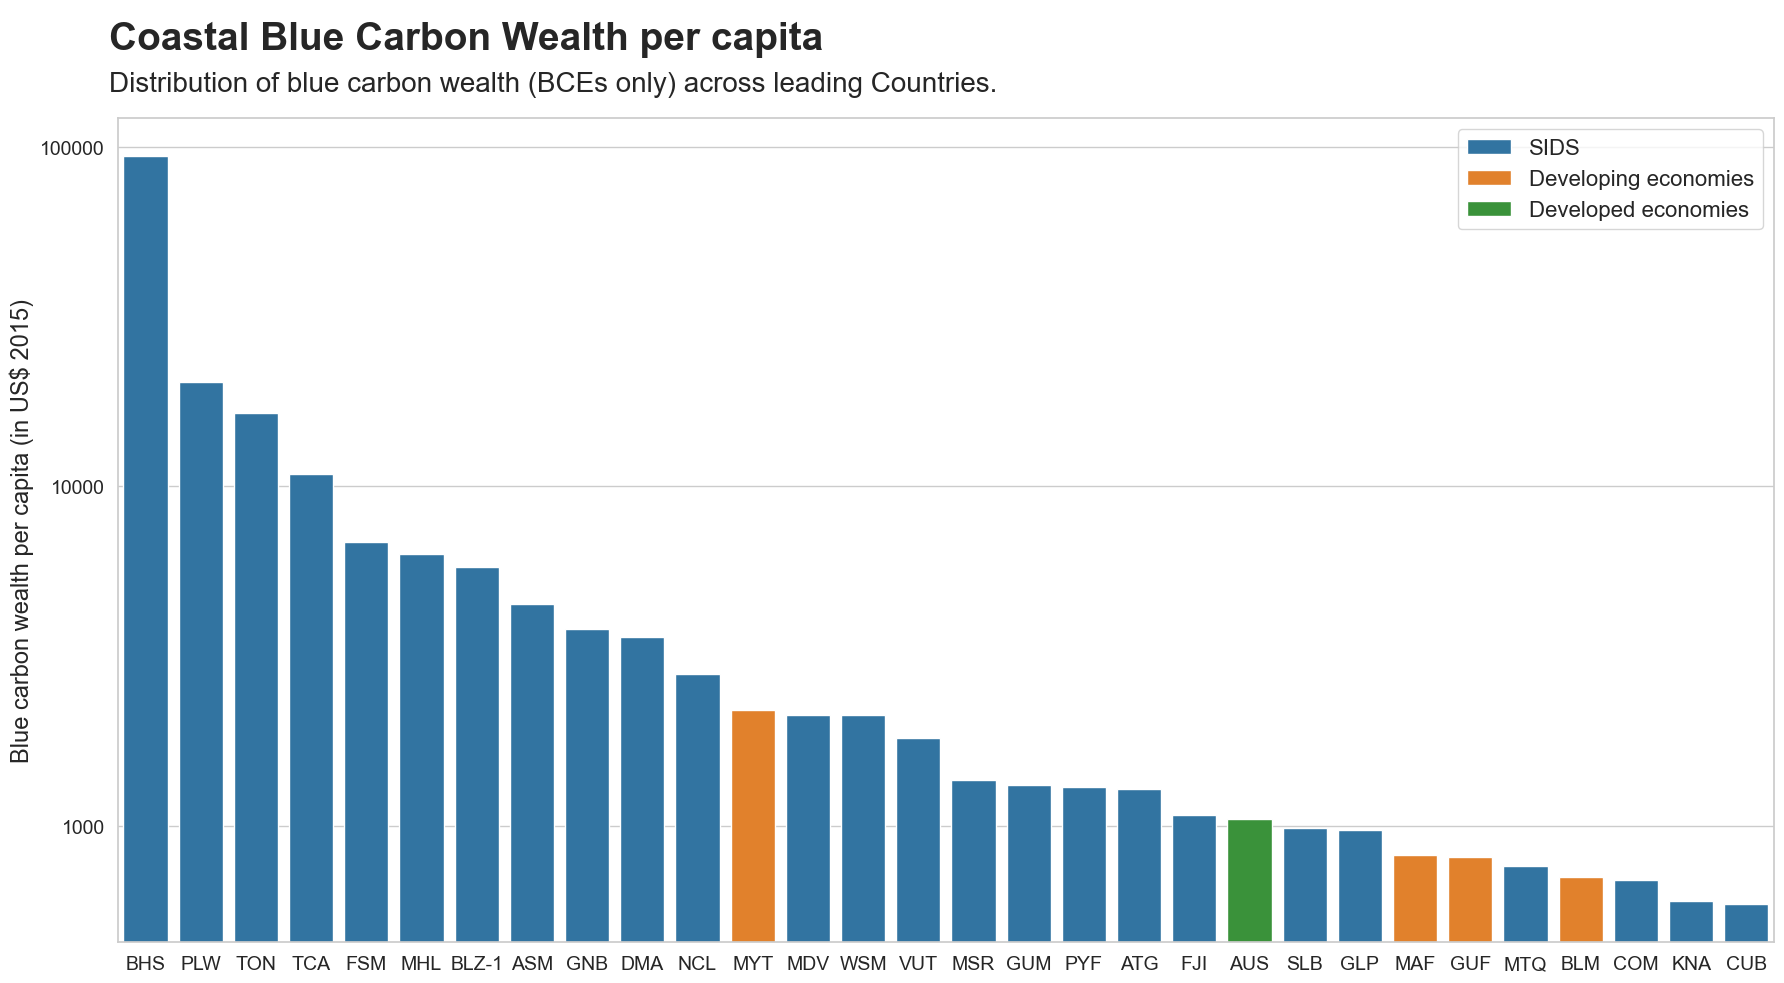

In [210]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style='whitegrid')
sns.barplot(by_country.head(30), x='ISO', y='cBCW_per_capita', palette= 'tab10', hue='Groups',ax=ax)
fig.text(0.065, 0.97, 'Coastal Blue Carbon Wealth per capita', 
         fontsize=28, fontweight='bold', va='top', ha='left')
fig.text(0.065, 0.92, 'Distribution of blue carbon wealth (BCEs only) across leading Countries.', 
         fontsize=20, va='top', ha='left')
plt.title('d', color='white', pad=70)
plt.ylabel('Blue carbon wealth per capita (in US$ 2015)', fontsize=17)
plt.xlabel('', fontsize=14)
ax.set_yscale("log")
format_log_axis_plain('y')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

In [211]:
color_mapping = {
    'SIDS': 'tab:blue',       # Bleu
    'Developing economies': 'tab:orange',  # Orange
    'Developed economies': 'tab:green',    # Vert
    'LDCs': 'tab:red'         # Rouge
}

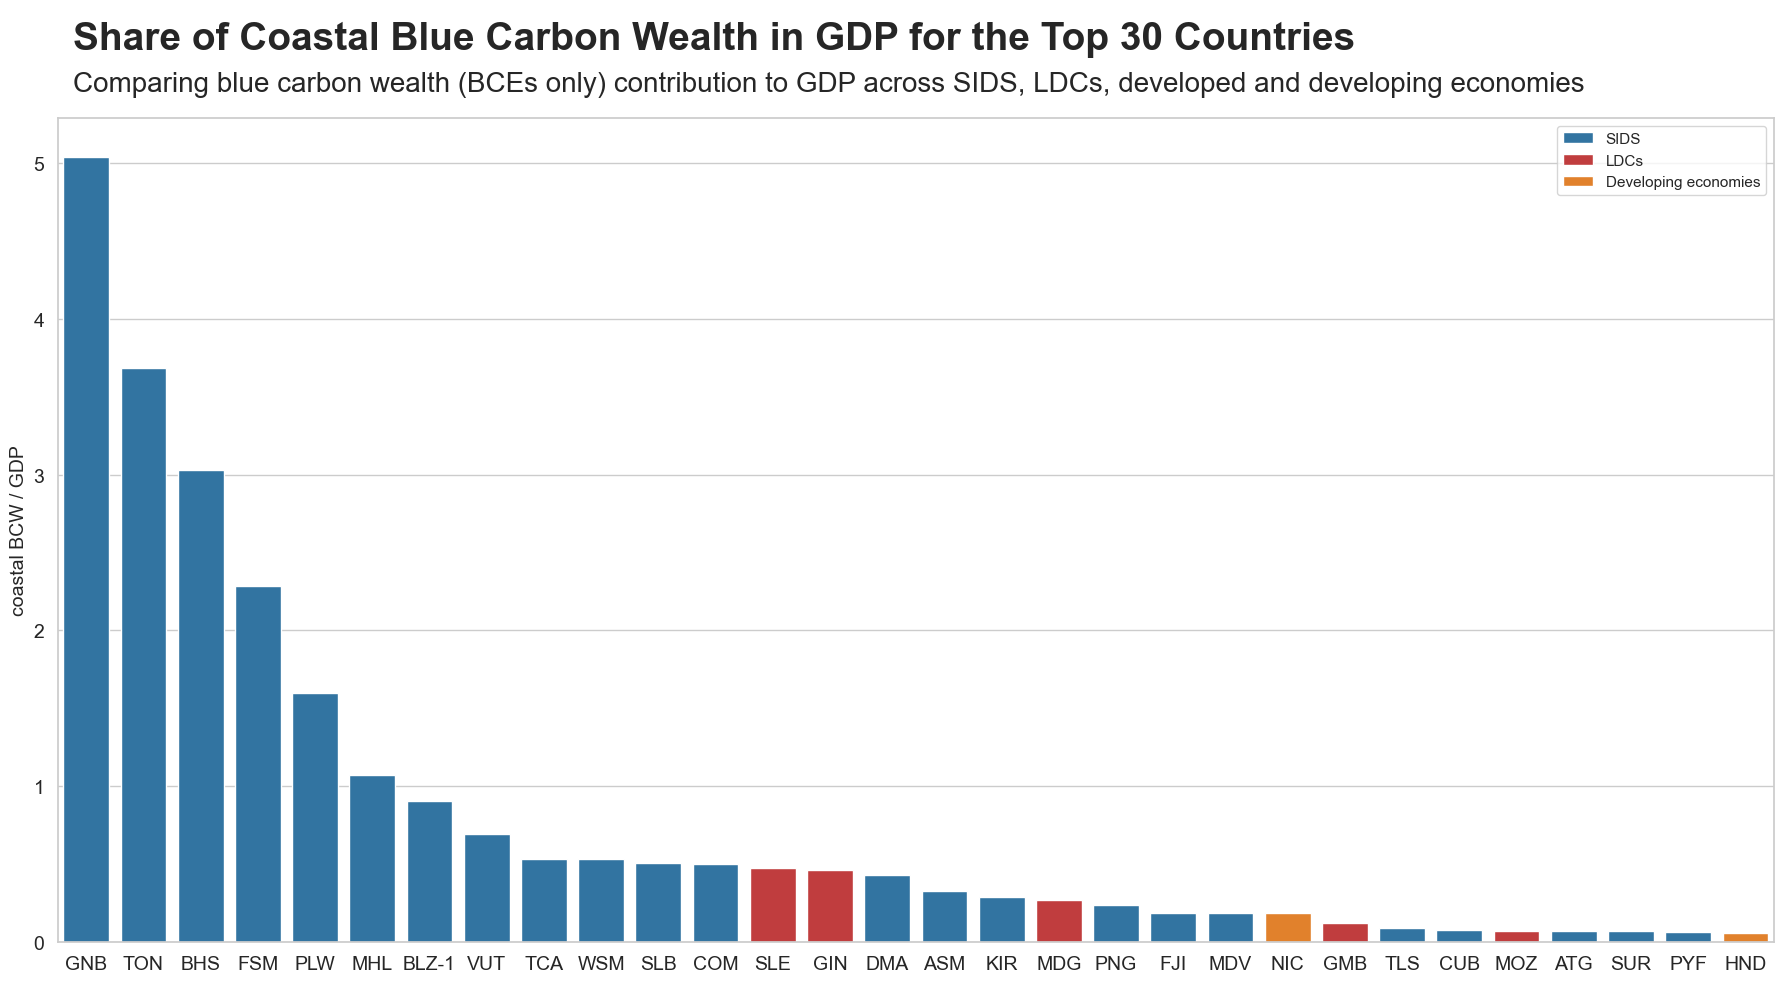

In [212]:
by_bg = df[['ISO', 'Groups', 'cBCW', 'GDP']]
by_bg['BCW_to_GDP_ratio'] = by_bg['cBCW'] / by_bg['GDP']
by_bg['BCW_to_GDP_ratio'] = by_bg['BCW_to_GDP_ratio'].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
by_bg = by_bg.sort_values(by='BCW_to_GDP_ratio', ascending=False).head(30)
palette = by_bg['Groups'].map(color_mapping)

fig, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style='whitegrid')
sns.barplot(by_bg, x='ISO', y='BCW_to_GDP_ratio', palette= color_mapping, hue='Groups',ax=ax)
fig.text(0.045, 0.97, 'Share of Coastal Blue Carbon Wealth in GDP for the Top 30 Countries', 
         fontsize=28, fontweight='bold', va='top', ha='left')
fig.text(0.045, 0.92, 'Comparing blue carbon wealth (BCEs only) contribution to GDP across SIDS, LDCs, developed and developing economies', 
         fontsize=20, va='top', ha='left')
plt.title('d', color='white', pad=70)
plt.ylabel('coastal BCW / GDP', fontsize=14)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

### bcp

In [213]:
by_country = data[['ISO', 'country_name', 'oBCW_per_capita', 'Groups']]
by_country = by_country.sort_values(by='oBCW_per_capita', ascending=False)

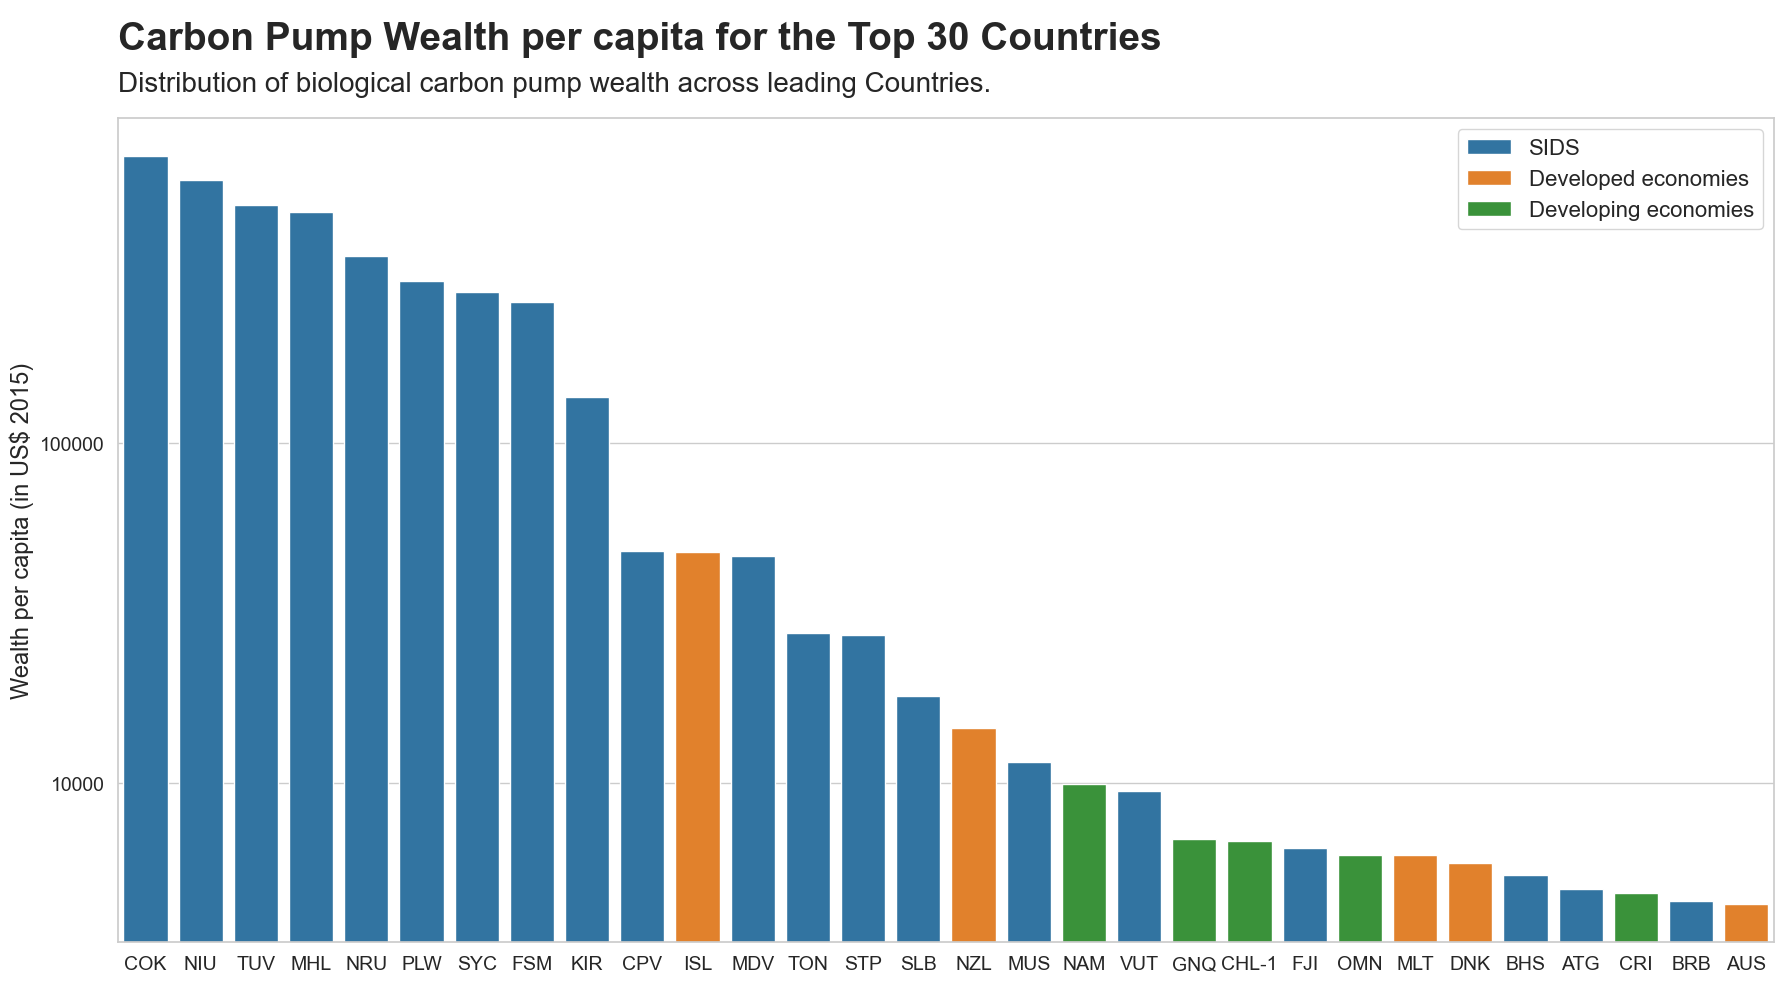

In [214]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style='whitegrid')
sns.barplot(by_country.head(30), x='ISO', y='oBCW_per_capita', palette= 'tab10', hue='Groups',ax=ax)
fig.text(0.07, 0.97, 'Carbon Pump Wealth per capita for the Top 30 Countries', 
         fontsize=28, fontweight='bold', va='top', ha='left')
fig.text(0.07, 0.92, 'Distribution of biological carbon pump wealth across leading Countries.', 
         fontsize=20, va='top', ha='left')
plt.title('d', color='white', pad=70)
plt.ylabel('Wealth per capita (in US$ 2015)', fontsize=17)
plt.xlabel('', fontsize=14)
ax.set_yscale("log")
format_log_axis_plain('y')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

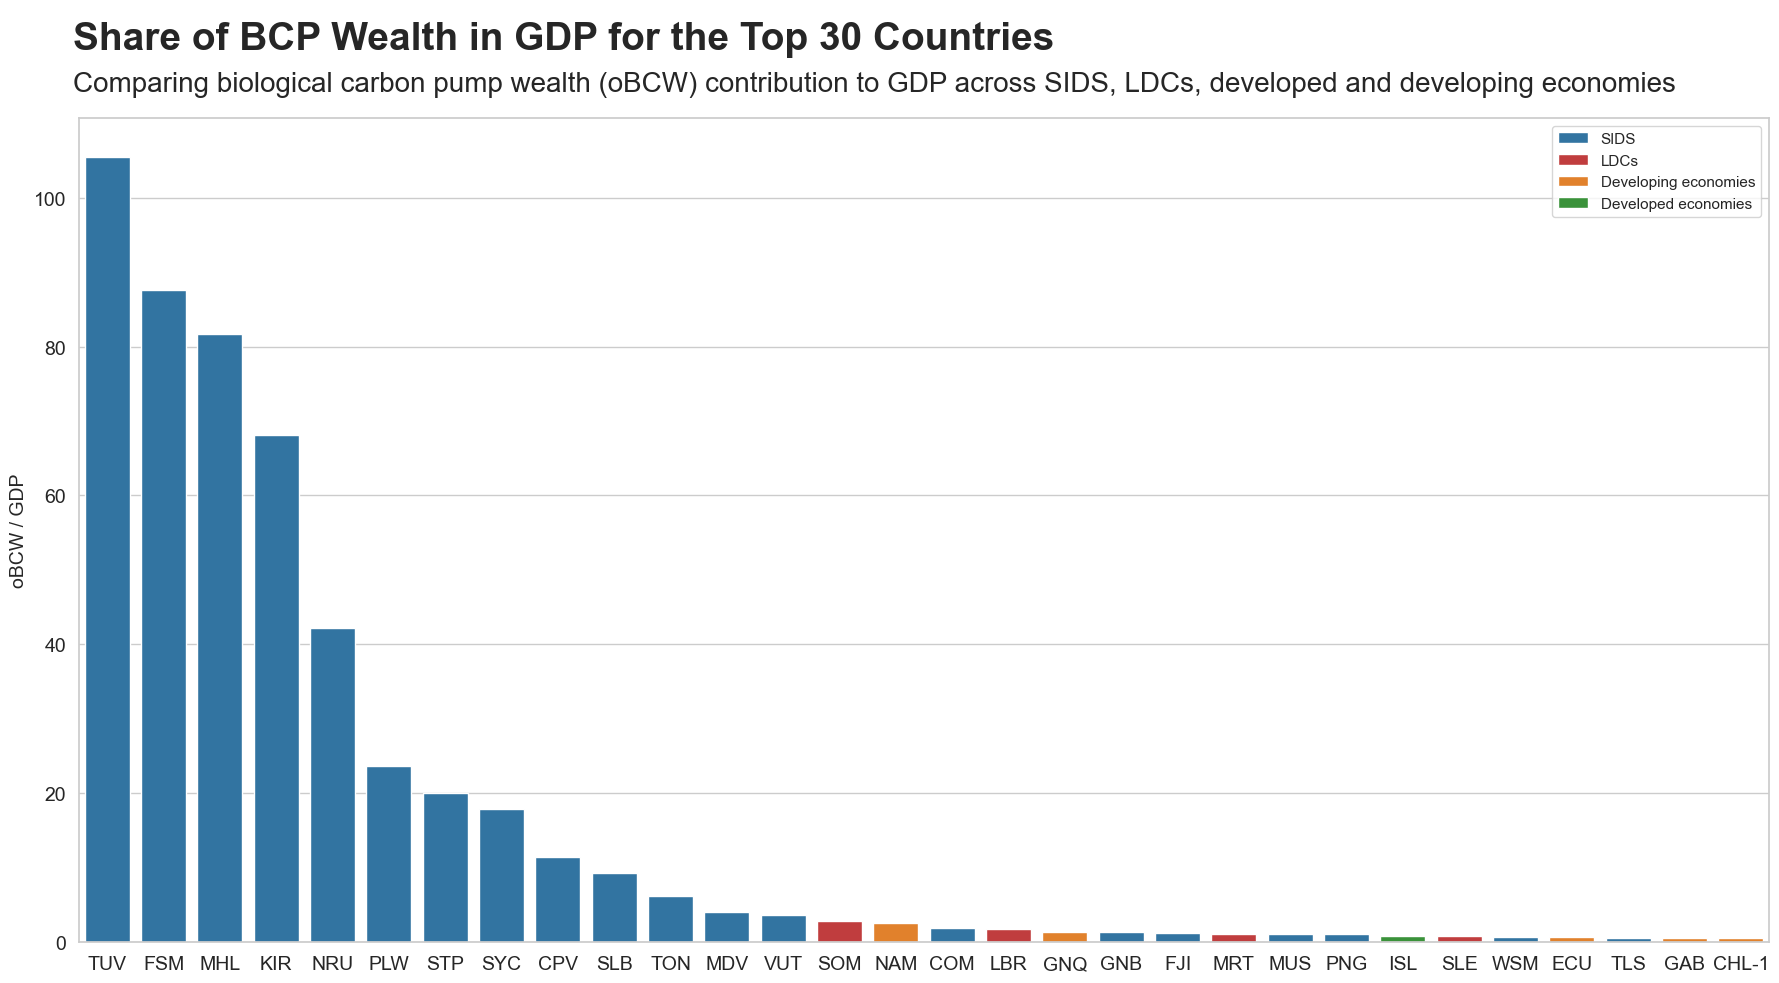

In [215]:
by_bg = df[['ISO', 'Groups', 'oBCW', 'GDP']]
by_bg = ratio_computer( by_bg, 'oBCW', 'GDP', 'oBCW to GDP ratio')
by_bg['oBCW to GDP ratio'] = by_bg['oBCW'] / by_bg['GDP']
by_bg['oBCW to GDP ratio'] = by_bg['oBCW to GDP ratio'].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
by_bg = by_bg.sort_values(by='oBCW to GDP ratio', ascending=False).head(30)
palette = by_bg['Groups'].map(color_mapping)

fig, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style='whitegrid')
sns.barplot(by_bg, x='ISO', y='oBCW to GDP ratio', palette= color_mapping, hue='Groups',ax=ax)
fig.text(0.045, 0.97, 'Share of BCP Wealth in GDP for the Top 30 Countries', 
         fontsize=28, fontweight='bold', va='top', ha='left')
fig.text(0.045, 0.92, 'Comparing biological carbon pump wealth (oBCW) contribution to GDP across SIDS, LDCs, developed and developing economies', 
         fontsize=20, va='top', ha='left')
plt.title('d', color='white', pad=70)
plt.ylabel('oBCW / GDP', fontsize=14)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()

### Total BCW

In [216]:
by_country = df[['ISO', 'country_name', 'Total BCW_per_capita', 'Groups']]
by_country = by_country.sort_values(by='Total BCW_per_capita', ascending=False)

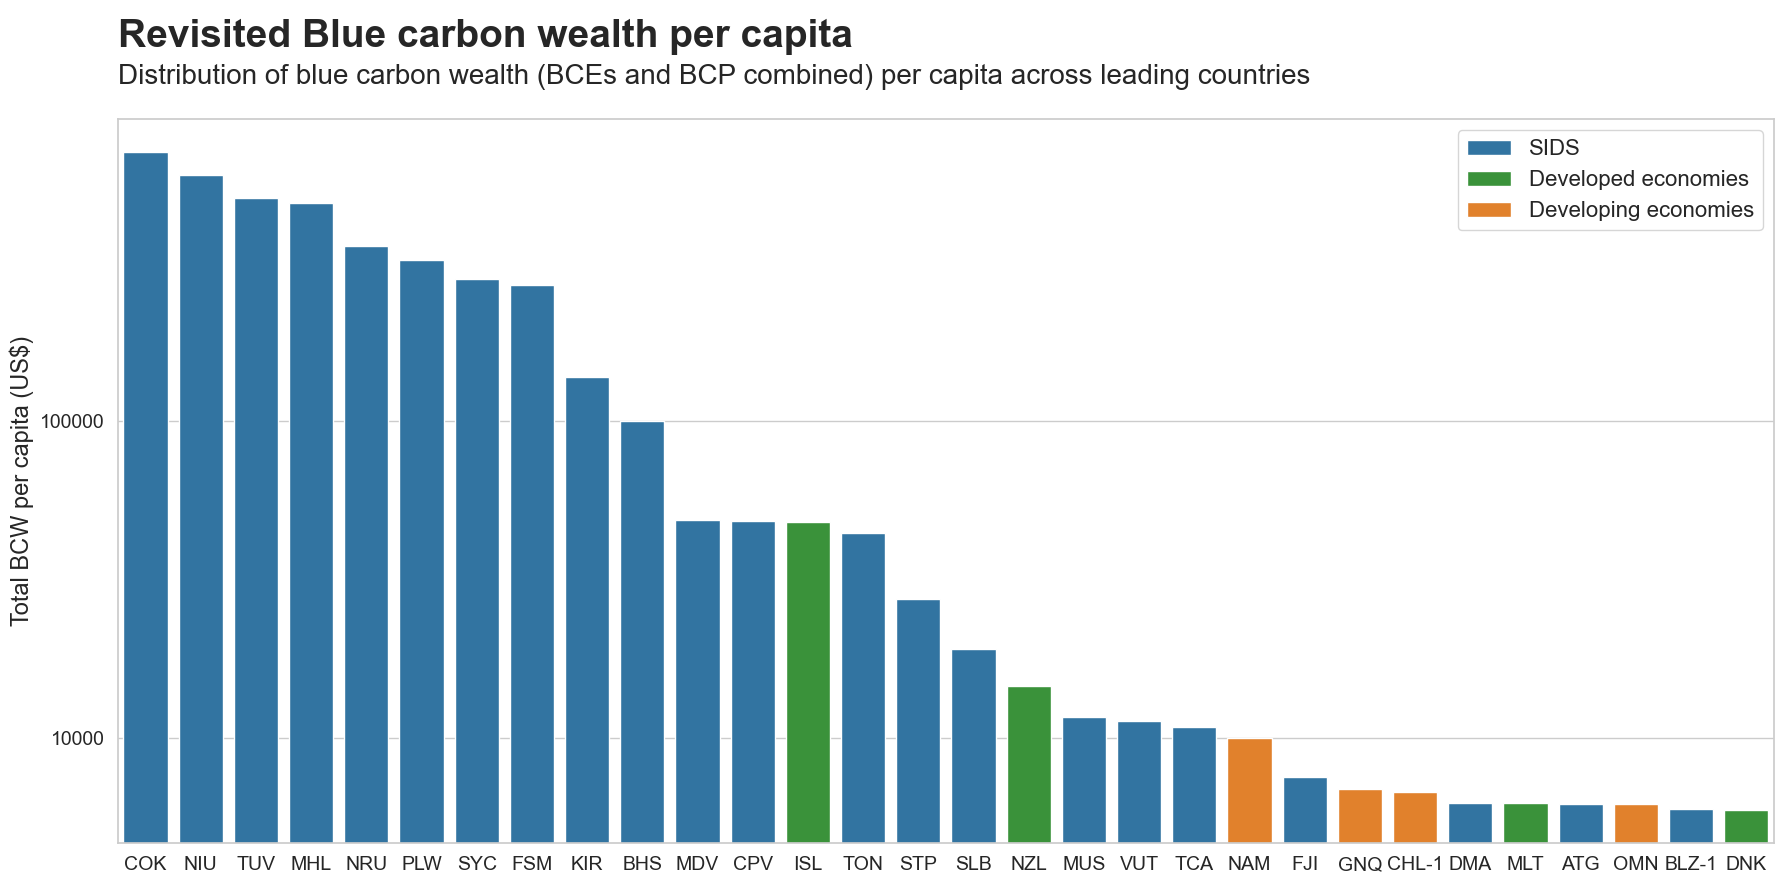

In [217]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.set_theme(style='whitegrid')
sns.barplot(by_country.head(30), x='ISO', y='Total BCW_per_capita', palette= color_mapping, hue='Groups',ax=ax)
fig.text(0.07, 0.97, 'Revisited Blue carbon wealth per capita', 
         fontsize=28, fontweight='bold', va='top', ha='left')
fig.text(0.07, 0.92, 'Distribution of blue carbon wealth (BCEs and BCP combined) per capita across leading countries',
         fontsize=20, va='top', ha='left')
plt.title('d', color='white', pad=70)
plt.ylabel('Total BCW per capita (US$)', fontsize=17)
plt.xlabel('')
plt.xticks(fontsize=17)
ax.set_yscale("log")
format_log_axis_plain('y')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

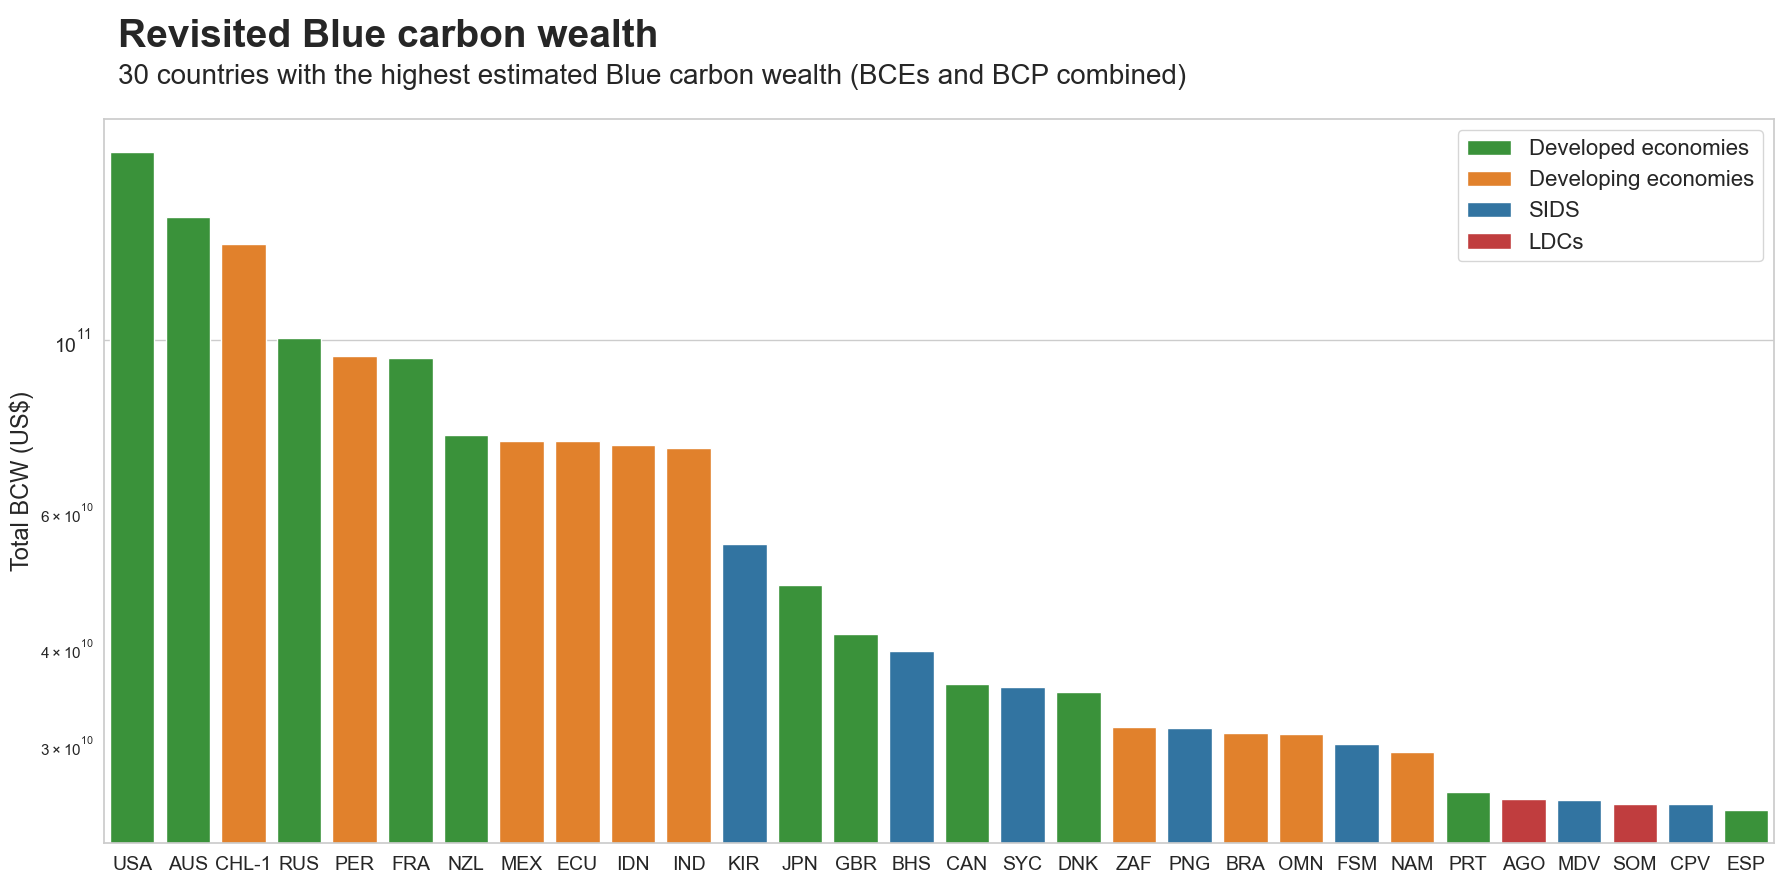

In [218]:
by_country = df[['ISO', 'Total BCW', 'Groups']]
by_country = by_country.sort_values(by='Total BCW', ascending=False)

fig, ax = plt.subplots(figsize=(18, 9))
sns.set_theme(style='whitegrid')
sns.barplot(by_country.head(30), x='ISO', y='Total BCW', palette= color_mapping, hue='Groups',ax=ax)
fig.text(0.07, 0.97, 'Revisited Blue carbon wealth', 
         fontsize=28, fontweight='bold', va='top', ha='left')
fig.text(0.07, 0.92, '30 countries with the highest estimated Blue carbon wealth (BCEs and BCP combined)',
         fontsize=20, va='top', ha='left')
plt.title('d', color='white', pad=70)
plt.ylabel('Total BCW (US$)', fontsize=17)
plt.xlabel('')
plt.xticks(fontsize=17)
ax.set_yscale("log")
# format_log_axis_plain('y')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

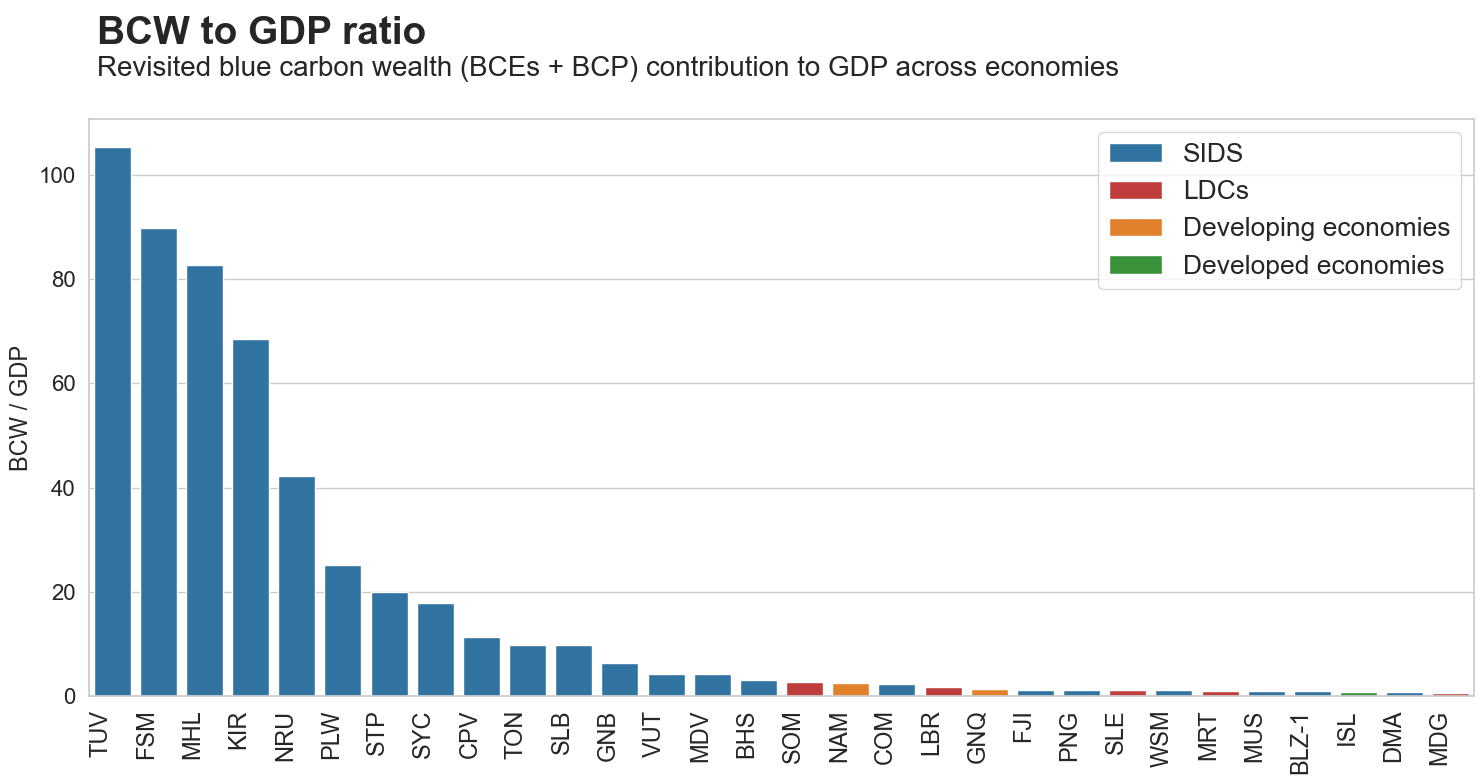

In [219]:
by_bg = df[['ISO', 'Groups', 'Total BCW', 'GDP']]
by_bg['Total BCW to GDP ratio'] = by_bg['Total BCW'] / by_bg['GDP']
by_bg['Total BCW to GDP ratio'] = by_bg['Total BCW to GDP ratio'].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
by_bg = by_bg.sort_values(by='Total BCW to GDP ratio', ascending=False).head(30)
palette = by_bg['Groups'].map(color_mapping)

fig, ax = plt.subplots(figsize=(15, 8))
sns.set_theme(style='whitegrid')
sns.barplot(by_bg, x='ISO', y='Total BCW to GDP ratio', palette= color_mapping, hue='Groups',ax=ax)
fig.text(0.07, 0.97, 'BCW to GDP ratio', 
         fontsize=28, fontweight='bold', va='top', ha='left')
fig.text(0.07, 0.92, 'Revisited blue carbon wealth (BCEs + BCP) contribution to GDP across economies', 
         fontsize=20, va='top', ha='left')
plt.title('d', color='white', pad=70)
plt.ylabel('BCW / GDP', fontsize=17)
# plt.yscale("log")
# format_log_axis_plain('y')
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90, ha='right', fontsize=17)
plt.tight_layout()
plt.legend(fontsize=19)
plt.show()

In [220]:
by_bg.groupby('Groups')['Total BCW to GDP ratio'].mean()

Groups
Developed economies     0.8063
Developing economies    1.9272
LDCs                    1.5137
SIDS                   23.1654
Name: Total BCW to GDP ratio, dtype: float64

### eez

In [221]:
by_eez = df[['country_name','ISO', 'Groups', 'Area_EEZ_KM2', 'Population']]
by_eez['Area_EEZ_KM2_per_capita'] = by_eez['Area_EEZ_KM2'] / by_eez['Population']
by_eez_sorted = by_eez.sort_values(by='Area_EEZ_KM2_per_capita', ascending=False)
top_30_eez = by_eez_sorted.head(30)

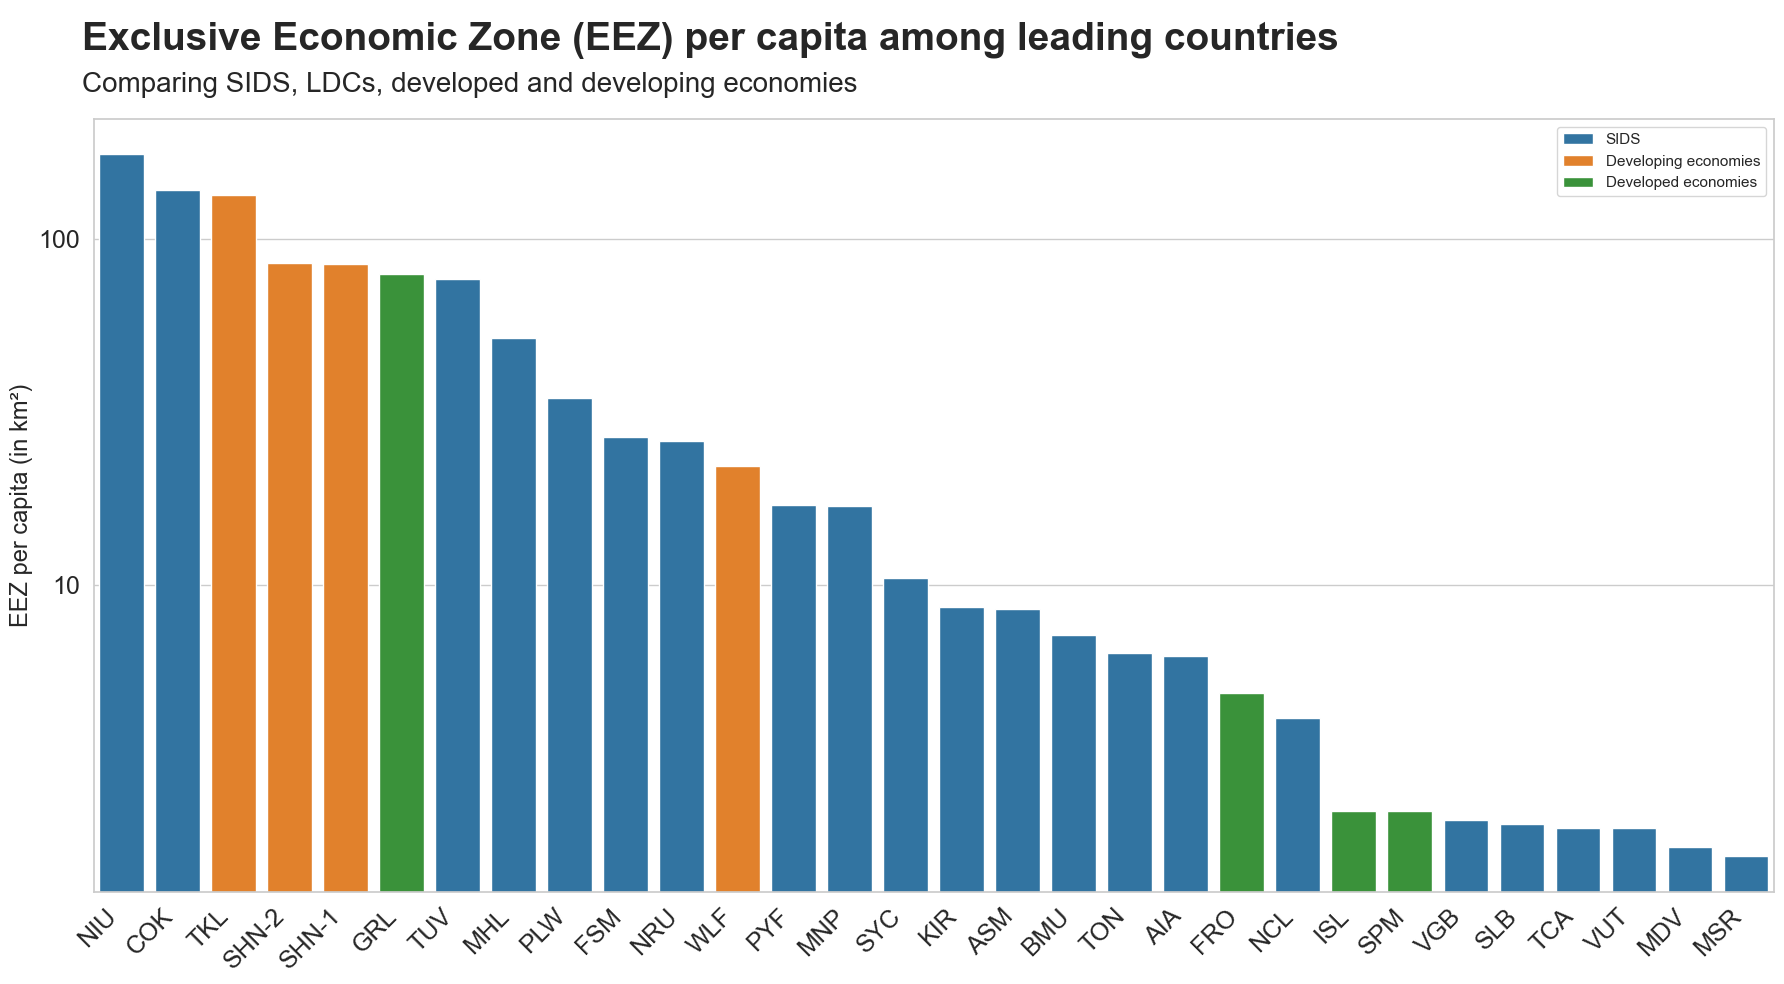

In [222]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style='whitegrid')
sns.barplot(top_30_eez, x='ISO', y='Area_EEZ_KM2_per_capita', palette= 'tab10', ci=False, hue='Groups',ax=ax)
fig.text(0.05, 0.97, 'Exclusive Economic Zone (EEZ) per capita among leading countries', 
         fontsize=28, fontweight='bold', va='top', ha='left')
fig.text(0.05, 0.92, 'Comparing SIDS, LDCs, developed and developing economies', 
         fontsize=20, va='top', ha='left')

# fig.text(0.045, 0, 'Note: The suffixes added to ISO codes, such as SHN-1, SHN-2, SHN-3 for Saint Helena, Ascension, and Tristan Da Cunha, and KIR-1 for the Gilbert Islands, KIR-2 for the Phoenix Islands, and KIR-3 for the Line Islands of Kiribati, are used to differentiate these territories under the same ISO designation.', 
#          fontsize=18, va='top', ha='left', wrap=True)

plt.title('d', color='white', pad=70)
plt.ylabel('EEZ per capita (in km²)', fontsize=17)
plt.xlabel('')
ax.set_yscale("log")
format_log_axis_plain('y')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.legend()
plt.show()

# Maps

## bcw

In [223]:
data_map['cBCW_per_capita'] = data_map['cBCW'] / data_map['Population']
data_map['oBCW_per_capita'] = data_map['oBCW'] / data_map['Population']

by_country = data_map[['ISO', 'cBCW_per_capita', 'Groups']]
by_country = by_country.sort_values(by='cBCW_per_capita', ascending=False)

In [224]:
def categorize(i):
    if 0 <= i < 5:
        return '0 - 5 US$'
    elif 5 <= i < 50:
        return '5 - 50 US$'
    elif 50 <= i < 500:
        return '50 - 500 US$'
    elif 500 <= i:
        return '> 500 US$'
    else:
        return 'No data available'

by_country['cat'] = by_country['cBCW_per_capita'].apply(categorize)

In [225]:
color_map = {
    'No data available': '#d3d3d3',
    '0 - 5 US$': '#FFFF00',
    '5 - 50 US$': '#98FB98',
    '50 - 500 US$': '#006400',
    '> 500 US$': '#FF6347'
}

country_data = wld.set_index('ISO_A3').join(by_country.set_index('ISO'))
country_data = country_data[['NAME', 'CONTINENT', 'geometry', 'cBCW_per_capita', 'cat']]
country_data = country_data.reset_index()
country_data = country_data.rename(columns={'ISO_A3': 'ISO'})
country_data['cat'] = country_data['cat'].fillna('No data available')

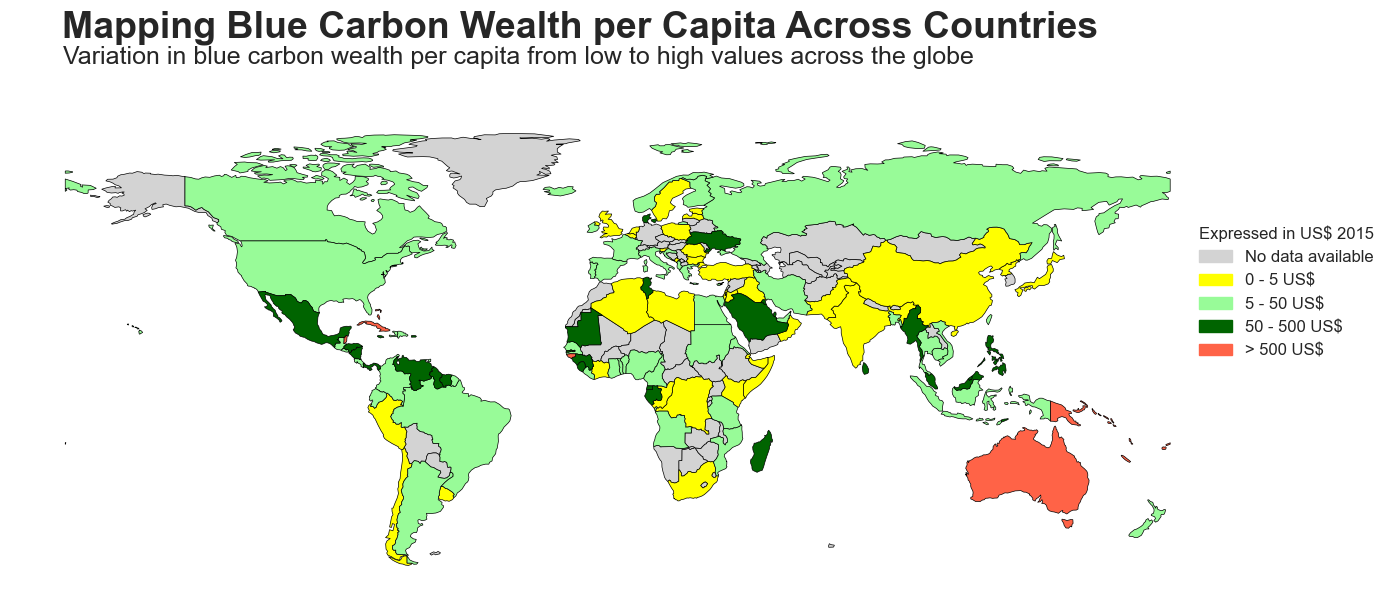

In [226]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(14, 10))
legend_patches = []
for cat, color in color_map.items():
    subset = country_data[country_data['cat'] == cat]
    subset.plot(ax=ax, color=color, label=cat, edgecolor='black', linewidth=0.5)
    legend_patches.append(Patch(color=color, label=cat))

fig.text(0.05, 0.83, 'Mapping Blue Carbon Wealth per Capita Across Countries', 
         fontsize=27, fontweight='bold', va='top', ha='left')
fig.text(0.051, 0.794, 'Variation in blue carbon wealth per capita from low to high values across the globe', 
         fontsize=18, va='top', ha='left')

plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 0.45),
           loc='lower center', ncol=1, fontsize=12, 
           title='Expressed in US$ 2015',
        title_fontsize=12, frameon=False)

ax.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Function map_and_barplot

In [227]:
def map_and_barplot(df: pd.DataFrame,
                    var: str,
                    group_col: str,
                    thresholds: list,
                    labels: list,
                    colors: list,
                    title: str,
                    subtitle: str,
                    xlabel_bar: str,
                    fig_size_map=(14, 10),
                    fig_size_bar=(5, 2),
                    cmap_palette='Blues',
                    wld=wld) -> None:
    """
    Affiche une carte et un barplot horizontal moyen pour une variable continue.

    Paramètres :
    ------------
    df : DataFrame avec au moins les colonnes ['ISO', var, group_col]
    var : str, nom de la variable à cartographier
    group_col : str, nom de la colonne de regroupement pour le barplot
    thresholds : list de float, bornes inférieures pour la catégorisation (croissantes)
    labels : list de str, étiquettes correspondantes aux classes
    colors : list de str, couleurs hex pour chaque classe (ordre == labels)
    title : str, titre principal de la carte
    subtitle : str, sous-titre de la carte
    xlabel_bar : str, nom de l’axe x du barplot
    fig_size_map : tuple, taille de la carte
    fig_size_bar : tuple, taille du barplot horizontal
    cmap_palette : str, palette seaborn pour le barplot

    Retour :
    --------
    None
    """

    # 1. Catégorisation
    def categorize(value):
        if pd.isna(value):
            return 'No data available'
        for i, t in enumerate(thresholds):
            if value < t:
                return labels[i]
        return labels[-1]

    df = df.copy()
    df['cat'] = df[var].apply(categorize)

    # 2. Charger la carte
    world = wld[['ISO_A3', 'NAME', 'CONTINENT', 'geometry']]
    world = world[world['ISO_A3'] != 'ATA']  # Exclure l'Antarctique

    # 3. Fusionner
    by_country = df[['ISO', var, 'cat', group_col]]
    country_data = world.set_index('ISO_A3').join(by_country.set_index('ISO'))
    country_data = country_data.reset_index().rename(columns={'ISO_A3': 'ISO'})
    country_data['cat'] = country_data['cat'].fillna('No data available')

    # 4. Barplot moyen par groupe
    sq = df.replace(0, np.nan).groupby(group_col)[var].mean().reset_index().dropna().sort_values(by=var, ascending=False)
    sns.set_theme(style='whitegrid')
    plt.figure(figsize=fig_size_bar)
    sns.barplot(data=sq, x=var, y=group_col, palette=cmap_palette, width=0.8, ci=False, edgecolor='black')
    plt.xlabel(xlabel_bar)
    plt.ylabel('')
    plt.xscale("log")
    format_log_axis_plain('x')
    sns.despine()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.grid(True, axis='x', linestyle='--')
    plt.tight_layout()
    plt.show()

    # 5. Carte
    fig, ax = plt.subplots(figsize=fig_size_map)
    legend_patches = []

    color_map = dict(zip(labels, colors))
    color_map['No data available'] = '#d3d3d3'

    for cat, color in color_map.items():
        subset = country_data[country_data['cat'] == cat]
        if not subset.empty:
            subset.plot(ax=ax, color=color, edgecolor='black', linewidth=0.3)
            legend_patches.append(Patch(color=color, label=cat))

    fig.text(0.05, 0.83, title, fontsize=27, fontweight='bold', va='top', ha='left')
    fig.text(0.051, 0.794, subtitle, fontsize=18, va='top', ha='left')

    plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.1),
               loc='lower center', ncol=3, fontsize=13,
               title='', frameon=False)

    ax.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [228]:
# print(sns.color_palette("ch:start=.2,rot=-.3", n_colors=4)[::-1])
hex_col = ['#27203f', '#51618f', '#7da6c0', '#c2e2e2']
list_col = hex_col[::-1]
print(list_col)

['#c2e2e2', '#7da6c0', '#51618f', '#27203f']


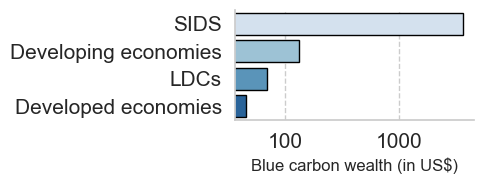

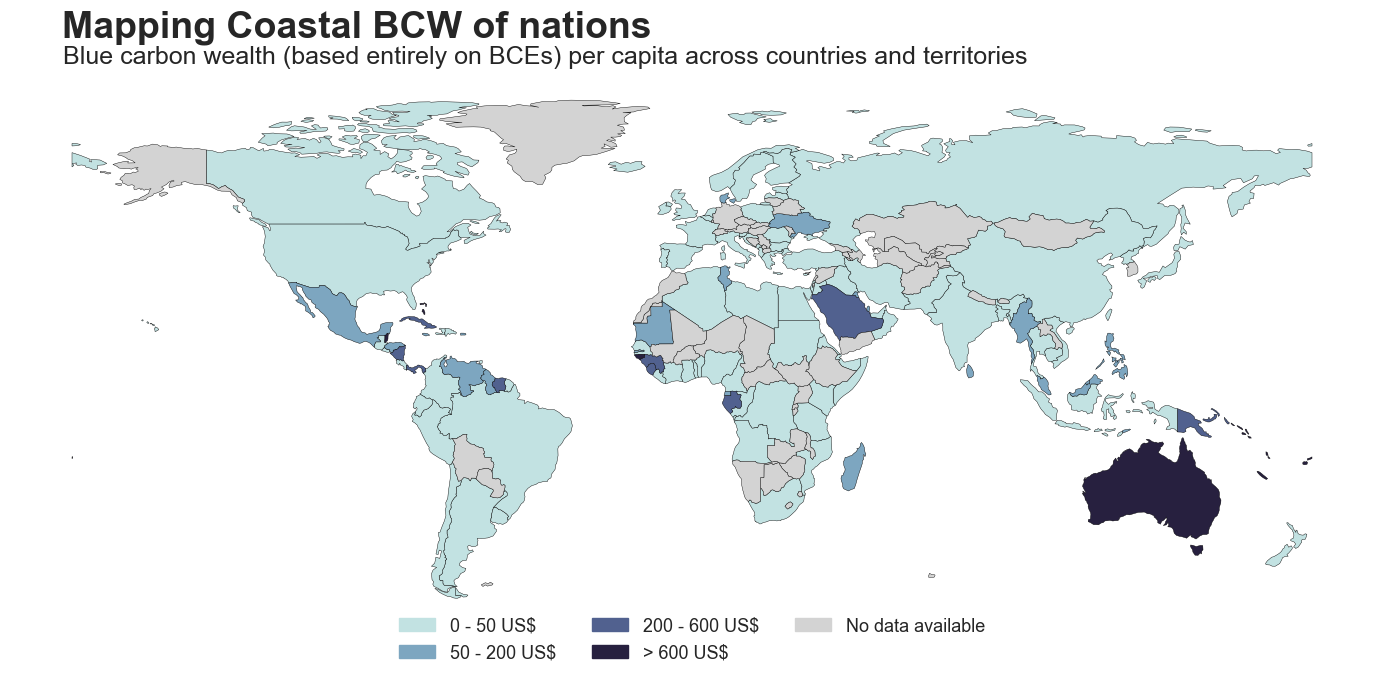

In [229]:
map_and_barplot(df=data_map,
                var='cBCW_per_capita',
                group_col='Groups',
                thresholds=[50, 200, 600],
                labels=['0 - 50 US$', '50 - 200 US$', '200 - 600 US$', '> 600 US$'],
                colors=list_col,
                title='Mapping Coastal BCW of nations',
                subtitle='Blue carbon wealth (based entirely on BCEs) per capita across countries and territories',
                xlabel_bar='Blue carbon wealth (in US$)',
                fig_size_map=(14, 10),
                fig_size_bar=(5, 2),
                cmap_palette='Blues')

# oBCW
# map_and_barplot(df=data_map,
#                 var='oBCW',
#                 group_col='Groups',
#                 thresholds=[10e9, 50e9, 10e10],
#                 labels=['0 - 3B US$', '3 - 5B US$', '5 - 20B US$', '> 20B US$'],
#                 colors=["#fdf0d5", "#ffb703", "#ca6702", "#B24100"],
#                 title='Mapping oBCW of nations and territories',
#                 subtitle='Distribution of Biological Carbon Pump Wealth (oBCW) across countries and territories',
#                 xlabel_bar='Biological carbon pump wealth (in US$)',
#                 fig_size_map=(14, 10),
#                 fig_size_bar=(5, 2),
#                 cmap_palette='Blues')

## bcp

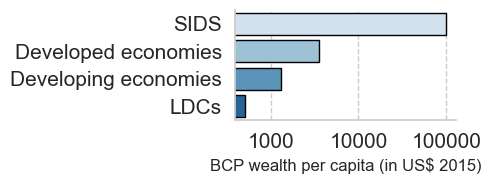

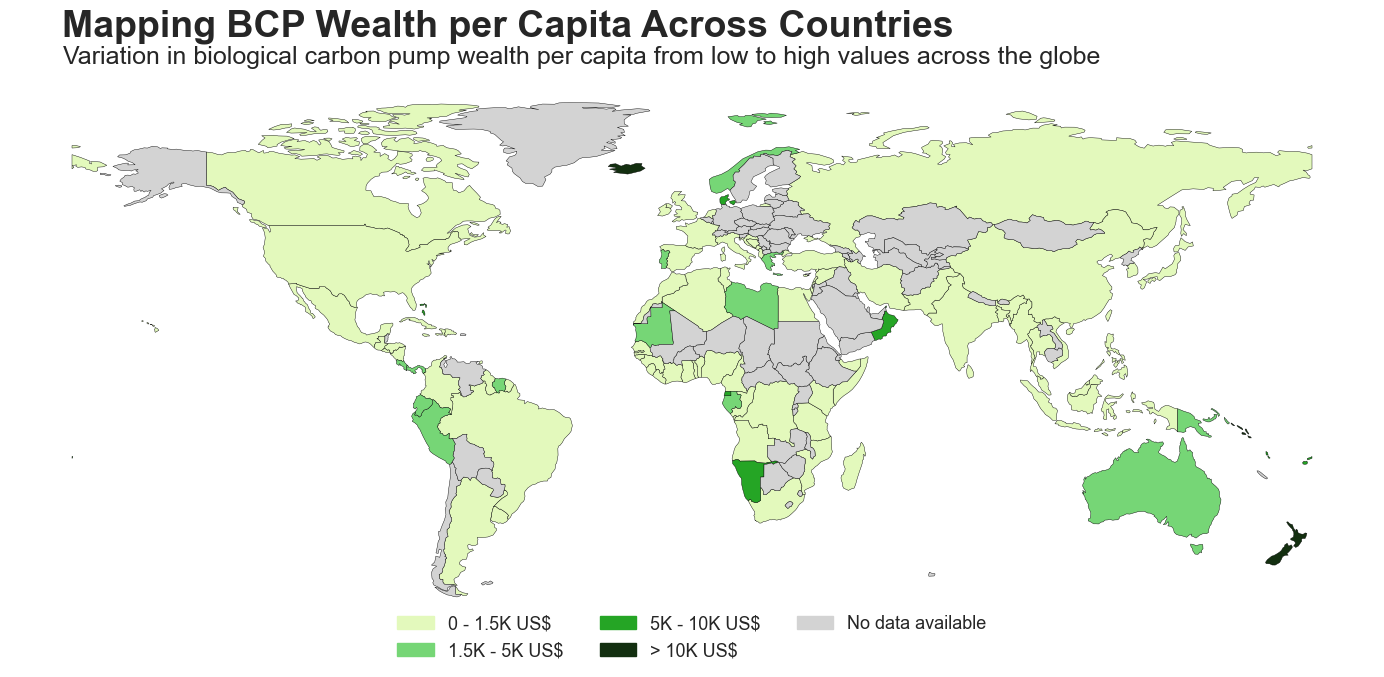

In [230]:
map_and_barplot(df=data,
                var='oBCW_per_capita',
                group_col='Groups',
                thresholds=[15e2, 5e3, 1e4],
                labels=['0 - 1.5K US$', '1.5K - 5K US$', '5K - 10K US$', '> 10K US$'],
                colors=["#E3F9BC", "#76D676", "#25A525", "#132F10"],
                title='Mapping BCP Wealth per Capita Across Countries',
                subtitle='Variation in biological carbon pump wealth per capita from low to high values across the globe',
                xlabel_bar='BCP wealth per capita (in US$ 2015)',
                fig_size_map=(14, 10),
                fig_size_bar=(5, 2),
                cmap_palette='Blues')

## Total BCW

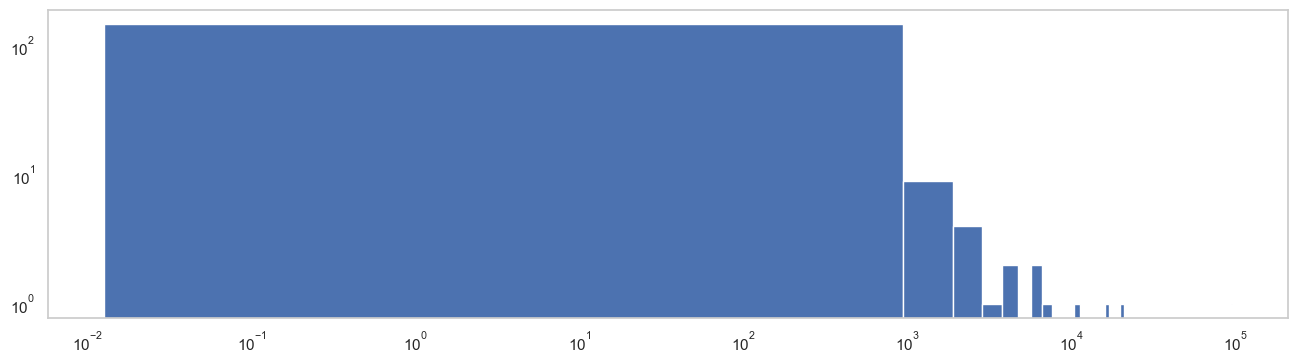

In [231]:
data['cBCW_per_capita'].hist(bins=100, log=True, figsize=(16, 4))
plt.xscale("log")
plt.grid(False)
plt.show()

In [232]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(
        int(rgb[0]*255),
        int(rgb[1]*255),
        int(rgb[2]*255)
    )
colors_rgb = sns.color_palette("ch:start=.2,rot=-.3", n_colors=5)[::-1]
hex_colors = [rgb_to_hex(c) for c in colors_rgb]
hex_colors = hex_colors[::-1]

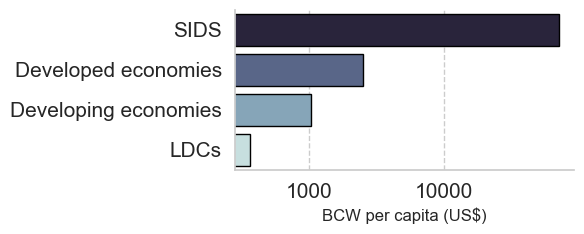

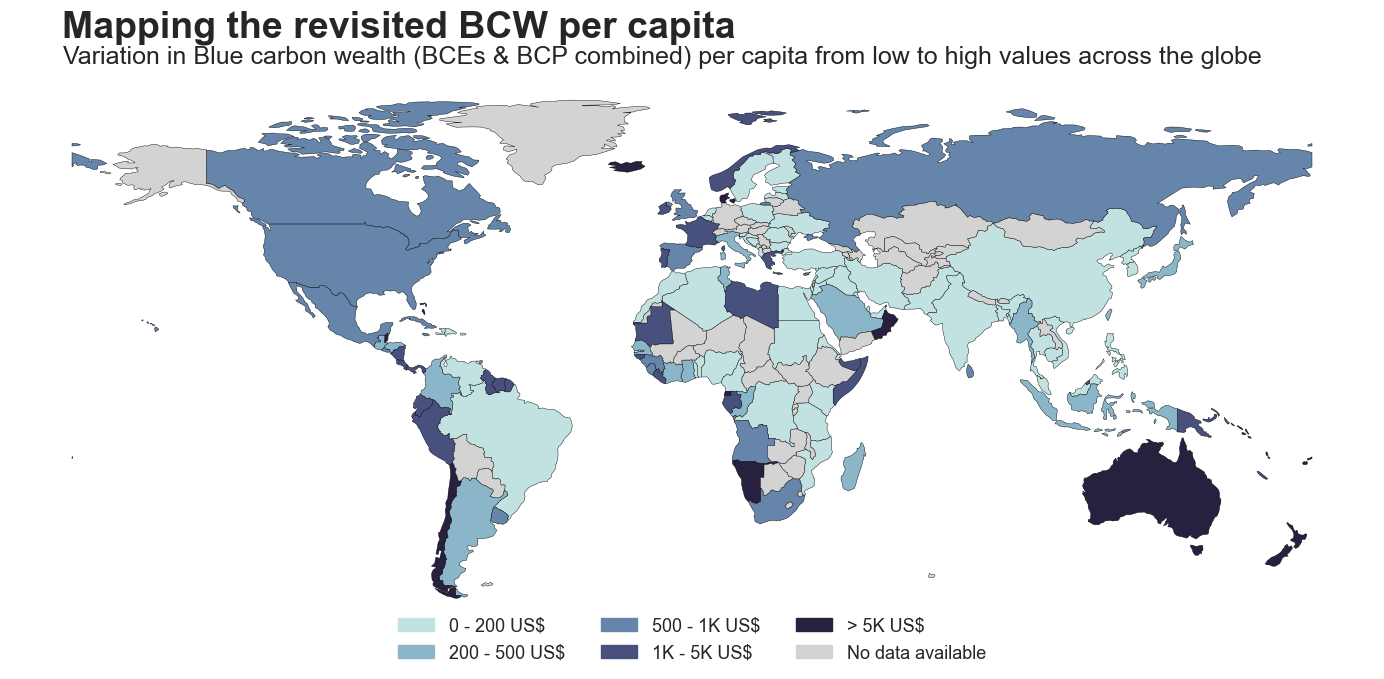

In [233]:
colors_list = sns.color_palette("ch:start=.2,rot=-.3", n_colors=4)[::-1]
# map_and_barplot(df=data_map,
#                 var='Total BCW_per_capita',
#                 group_col='Groups',
#                 thresholds=[2e2, 5e2, 1e3, 5e3, 1e4],
#                 labels=['0 - 200 US$', '200 - 500 US$', '500 - 1K US$', '1K - 5K US$', '> 5K US$'],
#                 colors=["#fdf0d5", "#ffb703", "#ca6702", "#a53860", "#38040e"],
#                 title='Mapping the revisited BCW per capita',
#                 subtitle='Variation in Blue carbon wealth (BCEs & BCP combined) per capita from low to high values across the globe',
#                 xlabel_bar='BCW per capita (US$)',
#                 fig_size_map=(14, 10),
#                 fig_size_bar=(6, 2.5),
#                 cmap_palette=colors_list)

map_and_barplot(df=data_map,
                var='Total BCW_per_capita',
                group_col='Groups',
                thresholds=[2e2, 5e2, 1e3, 5e3, 1e4],
                labels=['0 - 200 US$', '200 - 500 US$', '500 - 1K US$', '1K - 5K US$', '> 5K US$'],
                colors=hex_colors,
                title='Mapping the revisited BCW per capita',
                subtitle='Variation in Blue carbon wealth (BCEs & BCP combined) per capita from low to high values across the globe',
                xlabel_bar='BCW per capita (US$)',
                fig_size_map=(14, 10),
                fig_size_bar=(6, 2.5),
                cmap_palette=colors_list)

# Continent plots

In [234]:
continent = df.groupby('Continent')[['cBCW', 'oBCW', 'Total BCW', 'Population']].sum().reset_index()
continent['cBCW_per_capita'] = continent['cBCW'] / continent['Population']
continent['oBCW_per_capita'] = continent['oBCW'] / continent['Population']
continent['Total BCW_per_capita'] = continent['Total BCW'] / continent['Population']
# continent.rename(columns={
#     'oBCW': 'PCW', 'oBCW_per_capita': 'PCW_PCAP'
#     }).to_csv('continent_summary.csv', index=False, float_format='%.6f')
continent.head()

Continent                cBCW                 oBCW            Total BCW  \
0     Africa 44,418,540,097.8378 331,418,202,456.8002 375,836,742,554.6380   
1   Americas 35,499,708,767.1814 691,365,028,241.0952 726,864,737,008.2766   
2       Asia 58,007,978,919.3643 323,037,668,443.8782 381,045,647,363.2424   
3  Caribbean 47,215,138,664.6042  12,789,226,745.1626  60,004,365,409.7667   
4     Europe 11,213,497,108.3893 409,310,658,816.7332 420,524,155,925.1224   

          Population  cBCW_per_capita  oBCW_per_capita  Total BCW_per_capita  
0 1,465,946,459.0000          30.3002         226.0780              256.3782  
1 1,017,200,349.0000          34.8994         679.6744              714.5738  
2 4,809,238,643.0000          12.0618          67.1702               79.2320  
3    44,309,064.0000       1,065.5865         288.6368            1,354.2233  
4   828,450,578.0000          13.5355         494.0677              507.6032

In [235]:
pal = {
'Asia': '#ef233c',
'Europe': '#ffea00',
'Africa': '#4cc9f0',
'Oceania': '#00509d',
'Antarctica': '#6c757d',
'Americas': '#bfd200',
'Caribbean': '#80b918',
}

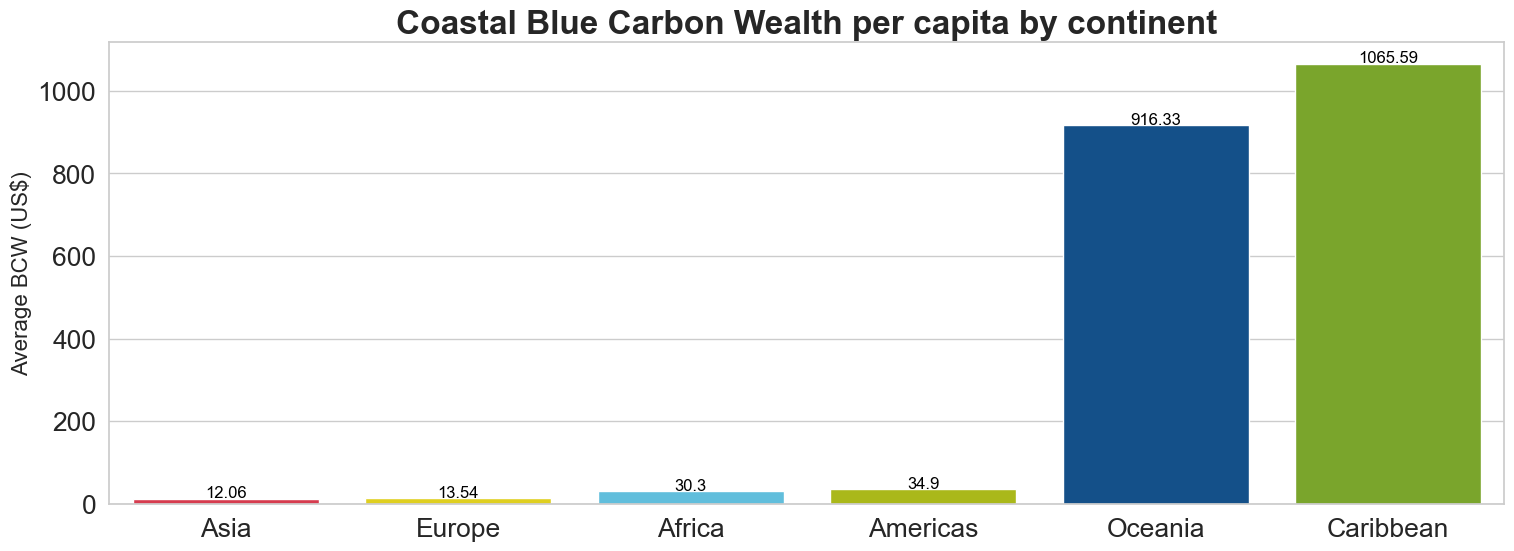

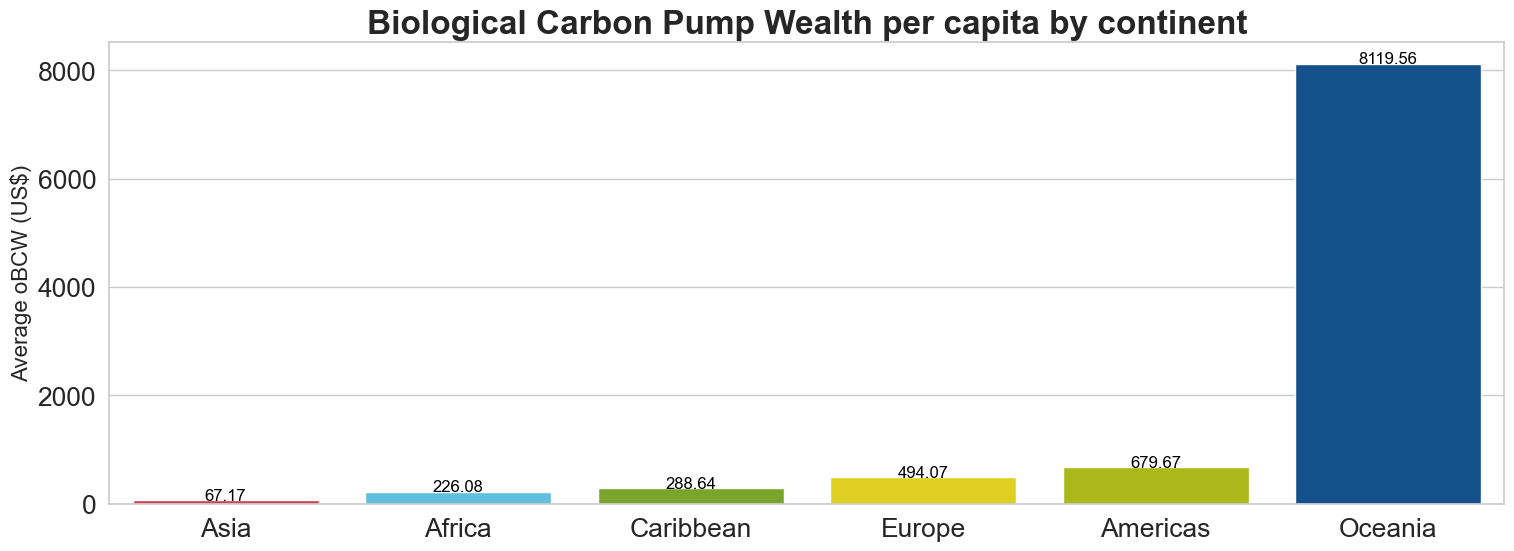

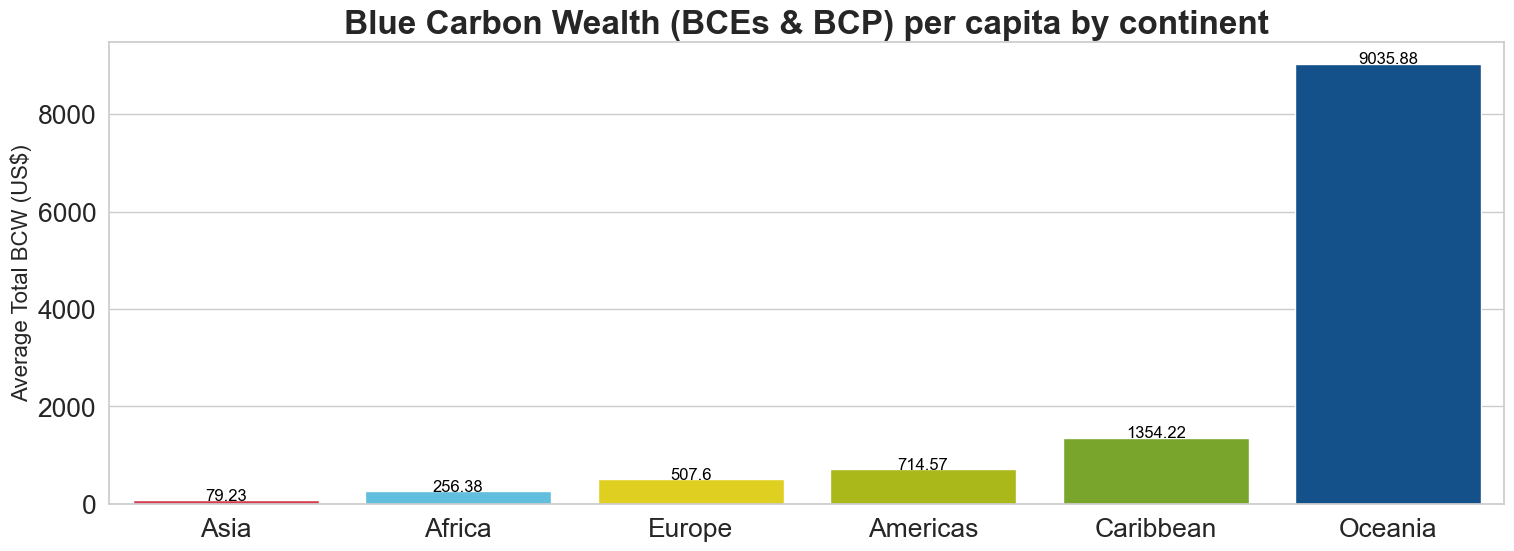

In [236]:
varlist = ['cBCW_per_capita', 'oBCW_per_capita', 'Total BCW_per_capita']
titles = ['Coastal Blue Carbon Wealth per capita by continent',
          'Biological Carbon Pump Wealth per capita by continent',
          'Blue Carbon Wealth (BCEs & BCP) per capita by continent']
ylabels = ['Average BCW (US$)',
           'Average oBCW (US$)',
              'Average Total BCW (US$)']
for var, title, ylabel in zip(varlist, titles, ylabels):
    cdf = continent.copy()
    cdf.sort_values(by=var, inplace=True)
    plt.figure(figsize=(18, 6))
    sns.set_theme(style="whitegrid")
    sns.barplot(cdf, x='Continent', y=var, ci=False, palette=pal)
    plt.title(title, fontweight='bold',
            fontsize=24)
    plt.xlabel('')
    for i, v in enumerate(cdf[var]):
        plt.text(
            i, v + 3, str(round(v, 2)), 
            color='black', ha='center'
        )
    plt.tick_params(axis='both', which='major', labelsize=19)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

In [237]:
cont = continent.copy()
varlits = ['cBCW', 'oBCW', 'Total BCW']
varlist = ['cBCW_per_capita', 'oBCW_per_capita', 'Total BCW_per_capita']
for var, tot in zip(varlist, varlits):
    tota = cont[tot].sum()
    cont[f'prop_{tot}'] = round((cont[tot]/tota) * 100, 2).astype(str) + '%'
    cont[f'prop_{tot}'] = cont[f'prop_{tot}'].astype(str)
    cont['Continent'] =cont['Continent'].astype('object')
    cont[f'Estimated_{var}'] = cont['Continent'] + ' (' + cont[var].round(2).astype(str) + ' US$ on avg.)'
cont = cont.drop(columns=varlist + varlits)
cont

Continent         Population prop_cBCW        Estimated_cBCW_per_capita  \
0     Africa 1,465,946,459.0000    18.64%        Africa (30.3 US$ on avg.)   
1   Americas 1,017,200,349.0000    14.89%      Americas (34.9 US$ on avg.)   
2       Asia 4,809,238,643.0000    24.34%         Asia (12.06 US$ on avg.)   
3  Caribbean    44,309,064.0000    19.81%  Caribbean (1065.59 US$ on avg.)   
4     Europe   828,450,578.0000      4.7%       Europe (13.54 US$ on avg.)   
5    Oceania    45,827,843.0000    17.62%     Oceania (916.33 US$ on avg.)   

  prop_oBCW       Estimated_oBCW_per_capita prop_Total BCW  \
0    15.49%     Africa (226.08 US$ on avg.)          15.8%   
1    32.31%   Americas (679.67 US$ on avg.)         30.56%   
2     15.1%        Asia (67.17 US$ on avg.)         16.02%   
3      0.6%  Caribbean (288.64 US$ on avg.)          2.52%   
4    19.13%     Europe (494.07 US$ on avg.)         17.68%   
5    17.39%   Oceania (8119.56 US$ on avg.)         17.41%   

    Estimated_Total BCW_per_capita  
0      Africa (256.38 US$ on avg.)  
1    Americas (714.57 US$ on avg.)  
2         Asia (79.23 US$ on avg.)  
3  Caribbean (1354.22 US$ on avg.)  
4       Europe (507.6 US$ on avg.)  
5    Oceania (9035.88 US$ on avg.)

In [238]:
country_data = df[['ISO', 'country_name', 'Continent', 'cBCW_per_capita', 'oBCW_per_capita', 'Total BCW_per_capita']].copy()
country_data.head()

ISO                       country_name Continent  cBCW_per_capita  \
0     AE  Abu musa, Greater and Lesser Tunb      Asia              NaN   
1    AFG                        Afghanistan      Asia              NaN   
2  US-AK                             Alaska  Americas              NaN   
3    ALB                            Albania    Europe          13.1251   
4    DZA                            Algeria    Africa           0.4072   

   oBCW_per_capita  Total BCW_per_capita  
0              NaN                   NaN  
1              NaN                   NaN  
2              NaN                   NaN  
3          58.2919               71.4170  
4         136.7252              137.1324

# Groups plots

In [239]:
groups = df.groupby('Groups')[['cBCW', 'oBCW', 'Total BCW', 'Population']].sum().reset_index()
groups['cBCW_per_capita'] = groups['cBCW'] / groups['Population']
groups['oBCW_per_capita'] = groups['oBCW'] / groups['Population']
groups['Total BCW_per_capita'] = groups['Total BCW'] / groups['Population']
groups['Groups'] = groups['Groups'].replace({'Developed economies': 'Developed', 'Developing economies': 'Developing'})
groups.head()

Groups                cBCW                 oBCW            Total BCW  \
0   Developed 46,936,681,004.8789 857,025,114,050.5247 903,961,795,055.4036   
1  Developing 84,313,338,247.6777 849,233,915,750.6542 933,547,253,998.3318   
2        LDCs 30,245,113,282.8801 110,075,794,888.8379 140,320,908,171.7180   
3        SIDS 73,972,207,948.5723 307,860,044,064.8064 381,832,252,013.3786   

          Population  cBCW_per_capita  oBCW_per_capita  Total BCW_per_capita  
0 1,429,633,557.0000          32.8313         599.4719              632.3031  
1 5,538,886,372.0000          15.2221         153.3221              168.5442  
2 1,169,293,241.0000          25.8661          94.1387              120.0049  
3    73,159,766.0000       1,011.1050       4,208.0512            5,219.1563

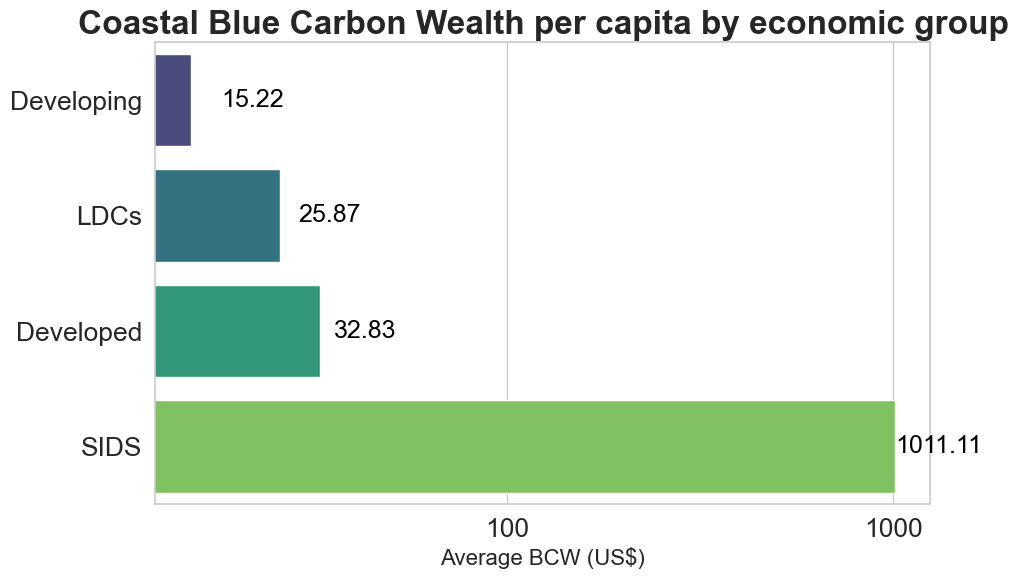

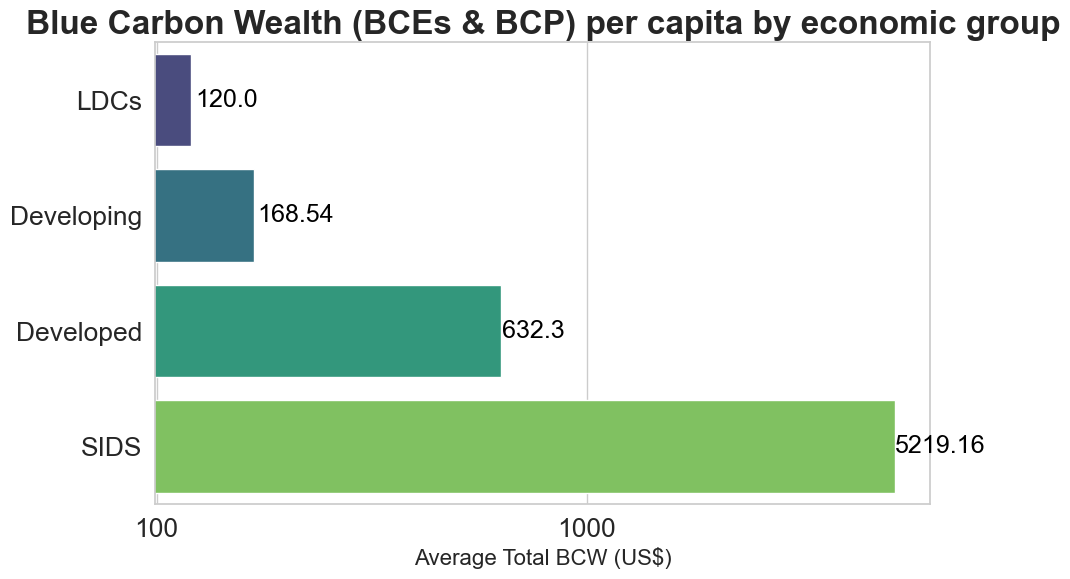

In [240]:
# horizontal barplot for groups
varlist = ['cBCW_per_capita', 'Total BCW_per_capita']
titles = ['Coastal Blue Carbon Wealth per capita by economic group',
          'Blue Carbon Wealth (BCEs & BCP) per capita by economic group']
ylabels = ['Average BCW (US$)',
           'Average Total BCW (US$)']
for var, title, ylabel in zip(varlist, titles, ylabels):
    gdf = groups.copy()
    gdf.sort_values(by=var, inplace=True)
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    sns.barplot(gdf, y='Groups', x=var, ci=False, palette='viridis')
    plt.title(title, fontweight='bold',
            fontsize=24)
    plt.ylabel('')
    for i, v in enumerate(gdf[var]):
        plt.text(
            v + 3, i, str(round(v, 2)), 
            color='black', va='center', fontsize=18
        )
    plt.xscale("log")
    format_log_axis_plain('x')
    plt.tick_params(axis='both', which='major', labelsize=19)
    plt.xlabel(ylabel, fontsize=16)
    plt.show()

In [241]:
groups = df.groupby('Groups')[['cBCW', 'oBCW', 'Total BCW', 'Population']].mean().reset_index()
groups['cBCW_per_capita'] = groups['cBCW'] / groups['Population']
groups['oBCW_per_capita'] = groups['oBCW'] / groups['Population']
groups['Total BCW_per_capita'] = groups['Total BCW'] / groups['Population']
groups['Groups'] = groups['Groups'].replace({'Developed economies': 'Developed', 'Developing economies': 'Developing'})
groups.head()

Groups               cBCW                oBCW           Total BCW  \
0   Developed 1,235,175,815.9179 31,741,670,890.7602 22,599,044,876.3851   
1  Developing 1,429,039,631.3166 18,871,864,794.4590 14,818,210,380.9259   
2        LDCs 1,374,777,876.4945  6,879,737,180.5524  6,378,223,098.7145   
3        SIDS 1,344,949,235.4286  7,893,847,283.7130  6,583,314,689.8858   

       Population  cBCW_per_capita  oBCW_per_capita  Total BCW_per_capita  
0 24,231,077.2373          50.9749       1,309.9571              932.6471  
1 66,733,570.7470          21.4141         282.7942              222.0503  
2 31,602,520.0270          43.5022         217.6958              201.8264  
3  1,283,504.6667       1,047.8725       6,150.2287            5,129.1708

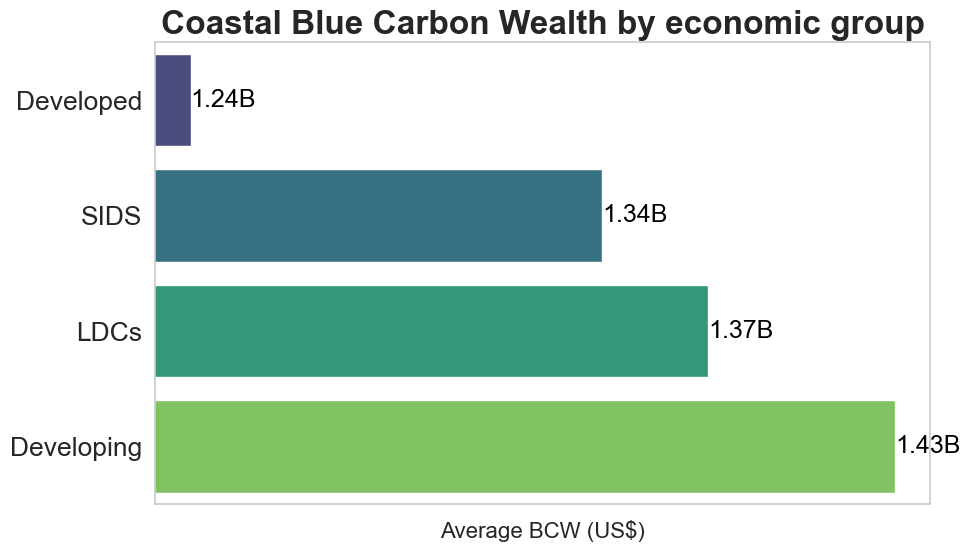

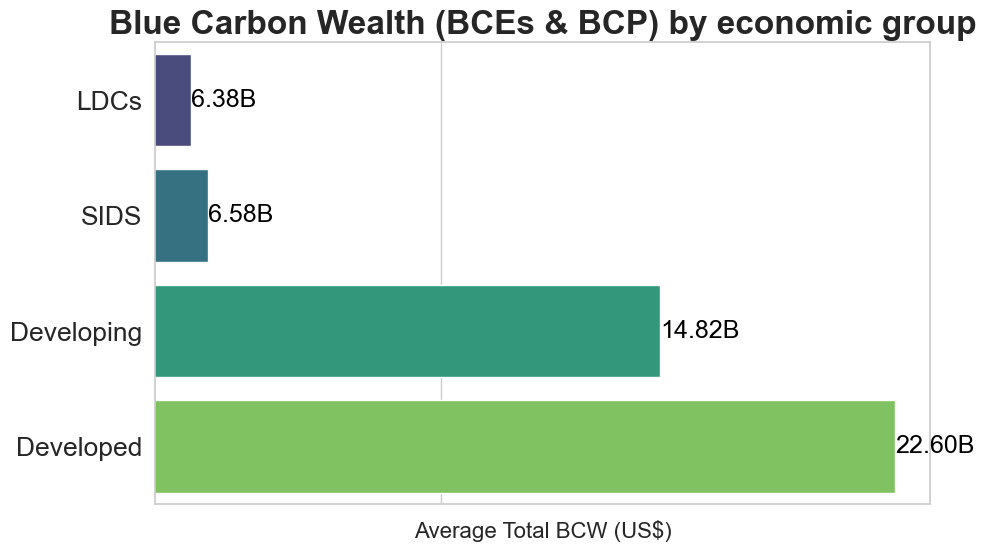

In [242]:
# horizontal barplot for groups
varlist = ['cBCW', 'Total BCW']
titles = ['Coastal Blue Carbon Wealth by economic group',
          'Blue Carbon Wealth (BCEs & BCP) by economic group']
ylabels = ['Average BCW (US$)',
           'Average Total BCW (US$)']
for var, title, ylabel in zip(varlist, titles, ylabels):
    gdf = groups.copy()
    gdf.sort_values(by=var, inplace=True)
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    sns.barplot(gdf, y='Groups', x=var, ci=False, palette='viridis')
    plt.title(title, fontweight='bold',
            fontsize=24)
    plt.ylabel('')
    for i, v in enumerate(gdf[var]):
        plt.text(
            v + 3, i, f'{v/1e9:.2f}B', 
            color='black', va='center', fontsize=18
        )
    plt.xticks(visible=False)
    plt.xscale("log")
    format_log_axis_plain('x')
    plt.tick_params(axis='both', which='major', labelsize=19)
    plt.xlabel(ylabel, fontsize=16)
    plt.show()

In [243]:
def wind_rose(df:pd.DataFrame, segment_col:str = 'Segment', label_col:str = 'Label',
                    value_col:str = 'Value', category_col:str = None, n_top:int = 10,
                    category_colors: dict = None, figsize: tuple =(18, 18)) -> None:
    """
    Génère un graphique radial en barres (wind rose chart) représentant les n entités principales 
    dans chaque segment, en fonction d'une variable quantitative. Chaque entité est coloriée 
    selon sa catégorie d'appartenance.

    Ce type de visualisation est utile pour comparer les valeurs maximales dans différents segments 
    (ex. produits par catégorie, départements par région, individus par groupe), tout en mettant 
    en évidence leur répartition par groupe ou catégorie.

    Paramètres
    ----------
    df : pandas.DataFrame
        Le DataFrame contenant les données à visualiser.
    
    segment_col : str, default='Segment'
        Le nom de la colonne représentant les groupes ou segments principaux (ex. catégorie, région, secteur).
    
    label_col : str, default='Label'
        Le nom de la colonne contenant les identifiants ou étiquettes uniques des entités à afficher (ex. noms, codes).
    
    value_col : str, default='Value'
        Le nom de la colonne contenant la variable quantitative à représenter (hauteur des barres).
    
    category_col : str, optional
        Le nom de la colonne représentant la catégorie ou le groupe associé à chaque entité (utilisé pour la couleur).
    
    n_top : int, default=10
        Le nombre d’entités à afficher pour chaque segment (les n plus élevées selon `value_col`).
    
    category_colors : dict, optional
        Un dictionnaire associant chaque catégorie (valeurs de `category_col`) à une couleur (code hexadécimal ou nom de couleur).
        Exemple : { "Groupe A": "#1f77b4", "Groupe B": "#ff7f0e" }

    figsize : tuple of (float, float), default=(12, 12)
        Taille de la figure en pouces.

    Affichage
    ---------
    Affiche un graphique circulaire divisé en segments :
    - Chaque segment contient les n entités les plus importantes par valeur.
    - Les barres sont coloriées selon leur catégorie.
    - Les étiquettes sont affichées au-dessus de chaque barre.
    - Une légende est générée automatiquement à partir des catégories.
    """
    
    continents = df[segment_col].unique()
    n_segments = len(continents)
    angles = np.linspace(0, 2 * np.pi, n_segments + 1, endpoint=True)
    
    # Couleurs automatiques si category_colors n'est pas fourni
    if category_col is not None:
        unique_categories = df[category_col].unique()
        if category_colors is None:
            cmap = plt.get_cmap('tab10')
            category_colors = {cat: cmap(i % 10) for i, cat in enumerate(unique_categories)}
    else:
        # Si pas de catégorie, on attribue une couleur unique
        category_colors = None
        
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    sns.set_theme(style="whitegrid")
    
    segment_width = 2 * np.pi / n_segments
    ax.set_theta_offset(np.pi / 2 - segment_width / 2)

    # Lignes radiales (séparation des continents)
    for angle in angles[:-1]:
        ax.axvline(x=angle, color='black', lw=2)

    width = (2 * np.pi / n_segments) / n_top  # Largeur de chaque barre

    for i, segment in enumerate(continents):
        angles_i = np.linspace(angles[i], angles[i+1], n_top + 1)
        segment_data = df[df[segment_col] == segment].sort_values(by=value_col, ascending=False).head(n_top)

        for j in range(len(segment_data)):
            row = segment_data.iloc[j]
            label = row[label_col]
            value = row[value_col]
            if category_col is not None:
                category = row[category_col]
                color = category_colors.get(category, '#333333')
            else:
                color = '#1f77b4'  # couleur par défaut

            ax.bar(
                angles_i[j] + width / 2,
                value,
                width=width,
                bottom=0,
                color=color,
                alpha=0.7,
                edgecolor='white',
                linewidth=2
            )
            ax.text(
                angles_i[j] + width / 2,
                value + 1,
                f"{label}",
                fontsize=15,
                fontweight='bold',
                ha='center',
                va='bottom'
            )

    ax.set_yscale("symlog")
    ax.set_xticks(angles[:-1] + (angles[1] - angles[0]) / 2)
    ax.set_xticklabels(continents, va='bottom', fontsize=25, fontweight='bold')
    ax.grid(axis='x', visible=False)
         
    # Légende
    if category_col is not None:
        legend_handles = [
            mpatches.Patch(color=category_colors[cat], label=cat)
            for cat in unique_categories
        ]
        ax.legend(handles=legend_handles, loc='lower right', fontsize=15)
    ax.grid(True, linestyle="-", alpha=0.7, axis='y')

    plt.show()

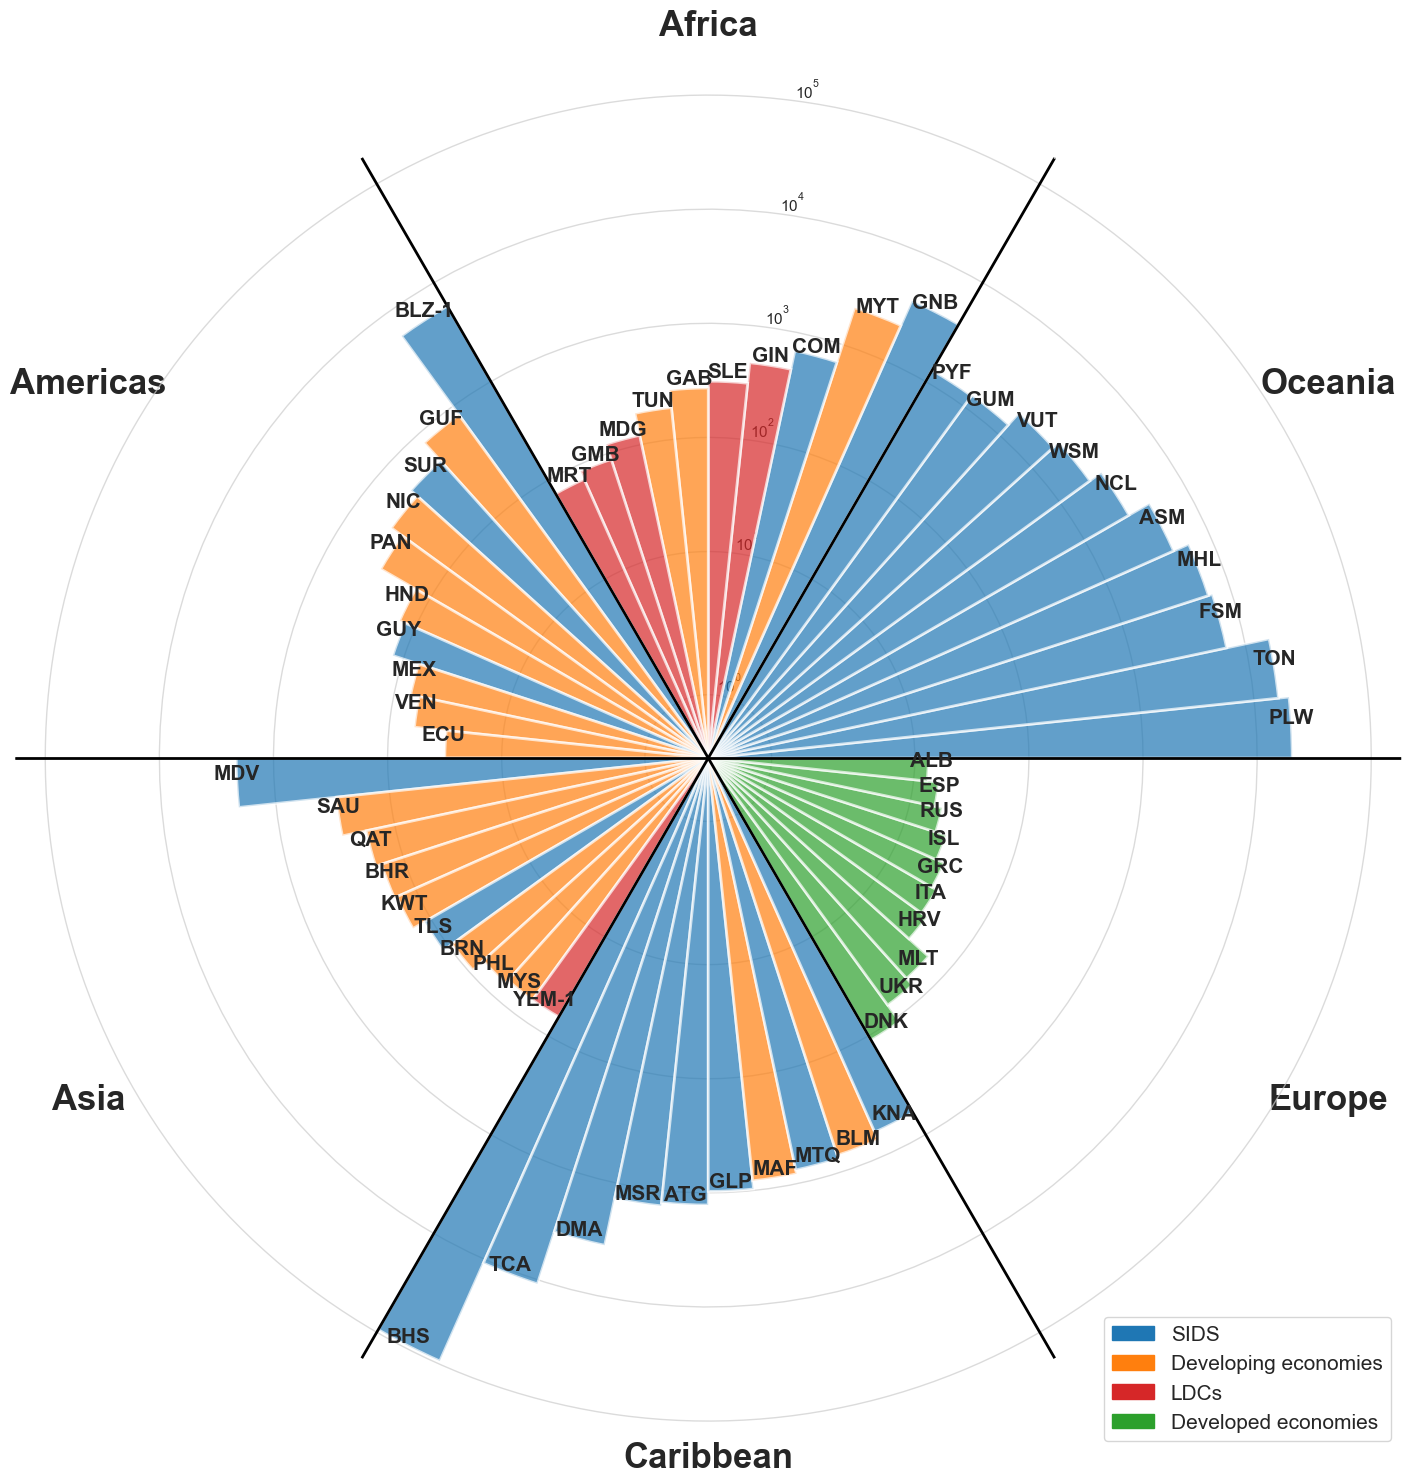

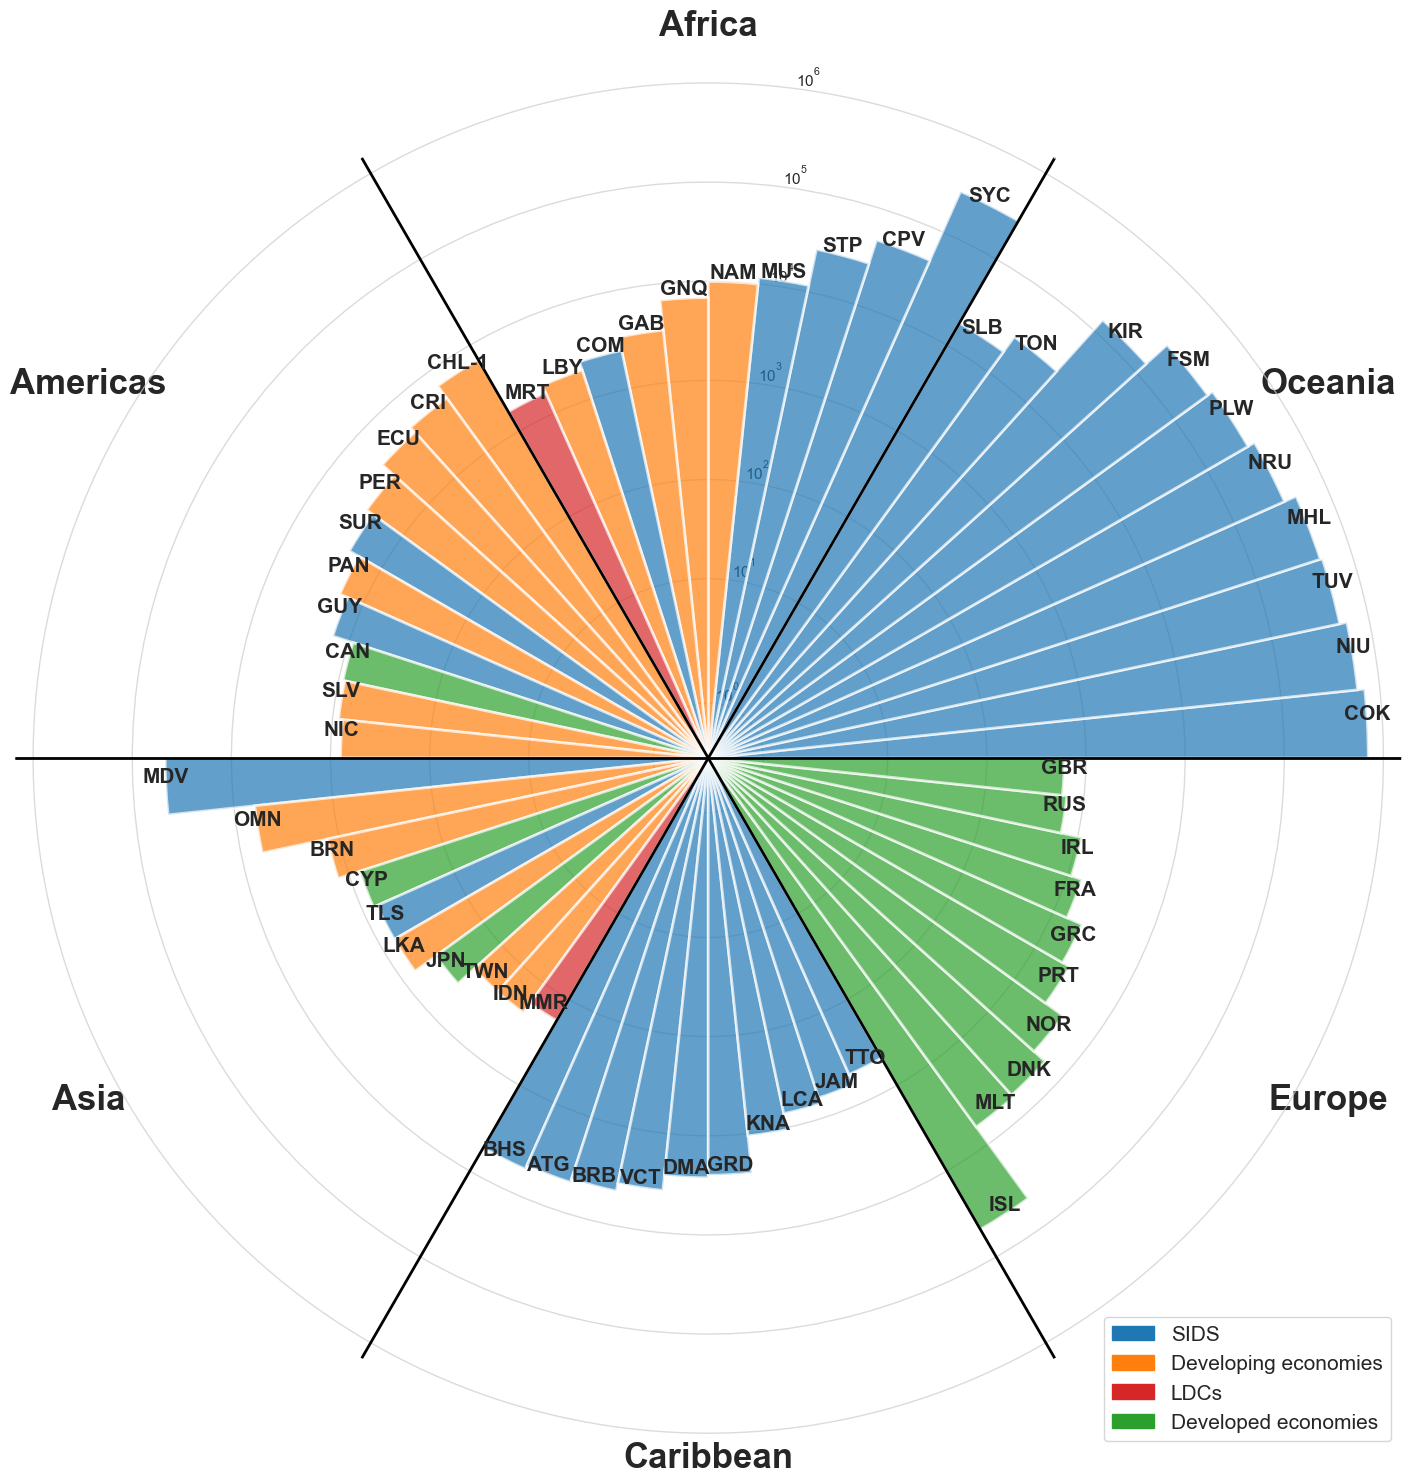

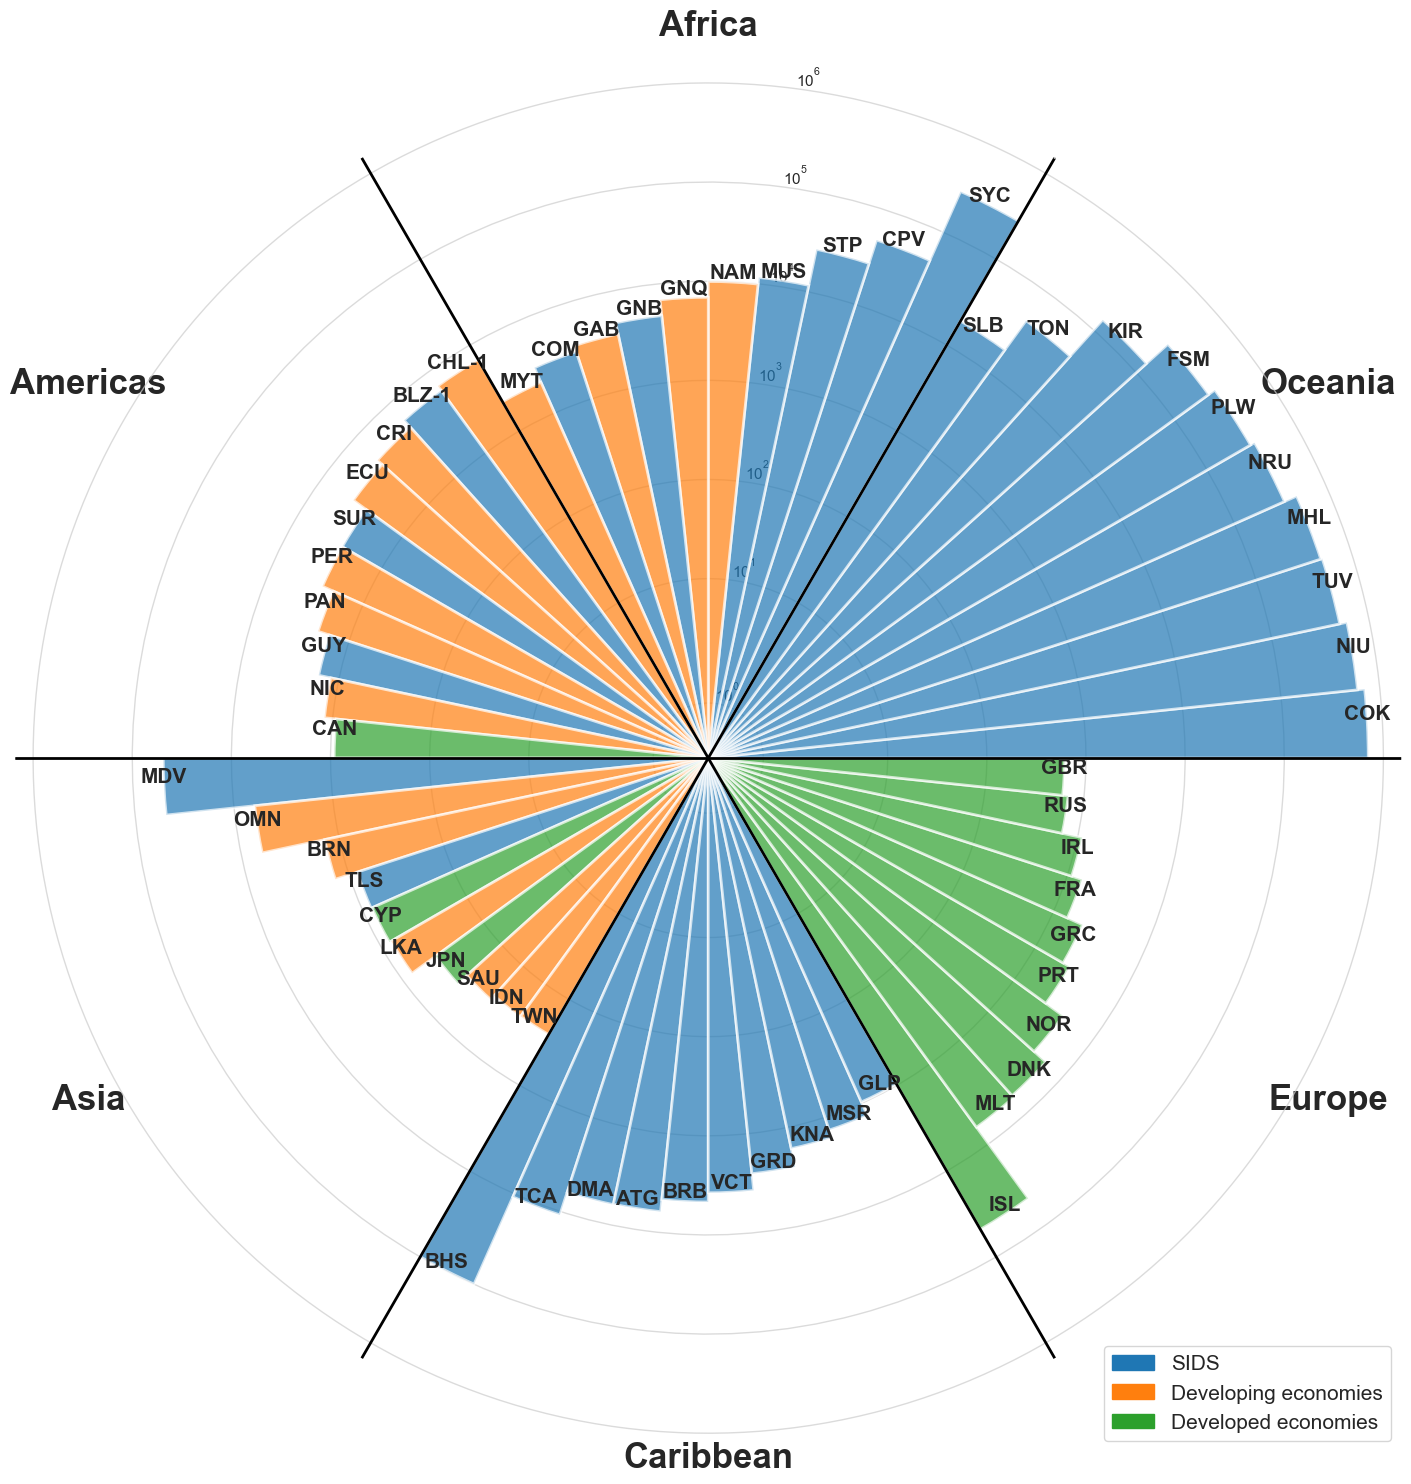

In [244]:
pf = df[['Continent', 'ISO', 'Groups', 'cBCW_per_capita', 'oBCW_per_capita', 'Total BCW_per_capita']].copy()

# Top 10 countries for each Continent by cBCW_per_capita, oBCW_per_capita and Total BCW_per_capita
top_10_bcw = pf.groupby('Continent').apply(lambda x: x.nlargest(10, 'cBCW_per_capita')).reset_index(drop=True)
top_10_bcw.drop(columns=['oBCW_per_capita', 'Total BCW_per_capita'], inplace=True)
top_10_oBCW = pf.groupby('Continent').apply(lambda x: x.nlargest(10, 'oBCW_per_capita')).reset_index(drop=True)
top_10_oBCW.drop(columns=['cBCW_per_capita', 'Total BCW_per_capita'], inplace=True)
top_10_Total_BCW = pf.groupby('Continent').apply(lambda x: x.nlargest(10, 'Total BCW_per_capita')).reset_index(drop=True)
top_10_Total_BCW.drop(columns=['cBCW_per_capita', 'oBCW_per_capita'], inplace=True)

datasets = [top_10_bcw, top_10_oBCW, top_10_Total_BCW]

category_colors = {
    'SIDS': '#1f77b4',       # Bleu
    'Developing economies': '#ff7f0e',  # Orange
    'Developed economies': '#2ca02c',    # Vert
    'LDCs': '#d62728'         # Rouge
}
for dta in datasets:
    if 'cBCW_per_capita' in dta.columns:
        segment_col = 'Continent'
        label_col = 'ISO'
        value_col = 'cBCW_per_capita'
        category_col = 'Groups'
    elif 'oBCW_per_capita' in dta.columns:
        segment_col = 'Continent'
        label_col = 'ISO'
        value_col = 'oBCW_per_capita'
        category_col = 'Groups'
    else:
        segment_col = 'Continent'
        label_col = 'ISO'
        value_col = 'Total BCW_per_capita'
        category_col = 'Groups'

    wind_rose(dta, segment_col=segment_col, label_col=label_col, value_col=value_col,
              category_col=category_col, n_top=10, figsize=(18, 18), category_colors=category_colors)

# Joint regimes & Overlap claims

In [245]:
dta = pd.read_csv('data_source/summary/bcw_data_before_grouping.csv')
dta.rename(columns={'country_name':'entity'}, inplace=True)
dta = dta[['entity', 'ISO', 'Area_EEZ_KM2', 'Continent']]
otj = dta[dta['entity'].str.contains('Joint regime|Overlapping', na=False)]
otj = otj.sort_values(by='entity').reset_index(drop=True)

for _, row in otj.iterrows():
    if 'Joint regime' in row['entity']:
        otj.loc[row.name, 'ISO'] = f'JR-{row.name + 1}'
    elif 'Overlapping claim' in row['entity']:
        otj.loc[row.name, 'ISO'] = f'OC-{row.name - 20}'
otj
# 21 Joint regimes and 11 Overlapping claims
# Only one with dat on Seq: Joint regime area Torres Strait Treaty: Papua New Guinea and Australia

entity    ISO  Area_EEZ_KM2  \
0   Joint regime area Torres Strait Treaty: Papua ...   JR-1    2,620.8506   
1                Joint regime area: Barbados / Guyana   JR-2       67.1575   
2   Joint regime area: Costa Rica / Ecuador (Galap...   JR-3   17,337.2422   
3               Joint regime area: Croatia / Slovenia   JR-4       98.3189   
4    Joint regime area: Dominican Republic / Colombia   JR-5   13,110.7034   
5               Joint regime area: Ecuador / Colombia   JR-6   18,663.0196   
6                   Joint regime area: France / Italy   JR-7       67.0413   
7   Joint regime area: Honduras / United Kingdom (...   JR-8    2,075.2810   
8   Joint regime area: Iceland / Denmark (Faeroe I...   JR-9    1,233.6885   
9     Joint regime area: Iceland / Norway (Jan Mayen)  JR-10   45,531.9129   
10              Joint regime area: Jamaica / Colombia  JR-11   15,247.2949   
11                 Joint regime area: Norway / Russia  JR-12    3,397.1334   
12                  Joint regime area: Peru / Ecuador  JR-13   16,091.2116   
13  Joint regime area: Sao Tome and Principe / Nig...  JR-14   34,533.7496   
14         Joint regime area: Senegal / Guinea-Bissau  JR-15   63,460.2090   
15             Joint regime area: South Korea / Japan  JR-16   82,609.9816   
16                  Joint regime area: Spain / France  JR-17    2,859.4922   
17                 Joint regime area: Sweden / Norway  JR-18      140.2085   
18  Joint regime area: United Kingdom / Denmark (F...  JR-19    8,010.5858   
19          Joint regime area: United States / Russia  JR-20    8,478.1683   
20             Joint regime area: Uruguay / Argentina  JR-21   41,413.8092   
21  Overlapping claim Liancourt Rocks: Japan / Sou...   OC-1    1,623.6285   
22                  Overlapping claim South China Sea   OC-2  338,839.1232   
23          Overlapping claim: Canada / United States   OC-3   24,772.3107   
24  Overlapping claim: Colombia / Dominican Republ...   OC-4      868.7043   
25                   Overlapping claim: Egypt / Libya   OC-5    8,113.7298   
26  Overlapping claim: Guyana / Trinidad and Tobag...   OC-6    3,611.5364   
27                     Overlapping claim: Iraq / Iran   OC-7       27.7017   
28            Overlapping claim: Malaysia / Singapore   OC-8      286.6074   
29  Overlapping claim: Qatar / Saudi Arabia / Unit...   OC-9      125.7369   
30  Overlapping claim: United States (Puerto Rico)...  OC-10   18,296.8053   
31  Overlapping claim: Venezuela / Netherlands (Ar...  OC-11    1,113.3173   

    Continent  
0     Oceania  
1   Caribbean  
2    Americas  
3      Europe  
4   Caribbean  
5    Americas  
6      Europe  
7    Americas  
8      Europe  
9      Europe  
10  Caribbean  
11     Europe  
12   Americas  
13     Africa  
14     Africa  
15       Asia  
16     Europe  
17     Europe  
18     Europe  
19   Americas  
20   Americas  
21        NaN  
22       Asia  
23   Americas  
24   Americas  
25     Africa  
26   Americas  
27       Asia  
28       Asia  
29       Asia  
30  Caribbean  
31   Americas

In [246]:
full = pd.read_csv('data_source/shp/EEZ_full.csv')
full = full[['UNION', 'ISO_TER1', 'ISO_TER2', 'ISO_TER3']]

otj_full = otj.merge(full, left_on='entity', right_on='UNION', how='left').drop(columns=['UNION'])

country_Total_BCW = df[['ISO', 'Total BCW_per_capita']].copy()
country_Total_BCW_unique = country_Total_BCW.drop_duplicates(subset='ISO')
otj_full['Total BCWpcap_1'] = otj_full['ISO_TER1'].map(country_Total_BCW_unique.set_index('ISO')['Total BCW_per_capita'])
otj_full['Total BCWpcap_2'] = otj_full['ISO_TER2'].map(country_Total_BCW_unique.set_index('ISO')['Total BCW_per_capita'])
otj_full['Total BCWpcap_3'] = otj_full['ISO_TER3'].map(country_Total_BCW_unique.set_index('ISO')['Total BCW_per_capita'])

otj_full['Total BCW_InvolvedStates'] = otj_full[['Total BCWpcap_1', 'Total BCWpcap_2', 'Total BCWpcap_3']].mean(axis=1).replace(0, np.nan)
otj_full.drop(columns=['Total BCWpcap_1', 'Total BCWpcap_2', 'Total BCWpcap_3', 'ISO_TER1', 'ISO_TER2', 'ISO_TER3'], inplace=True)

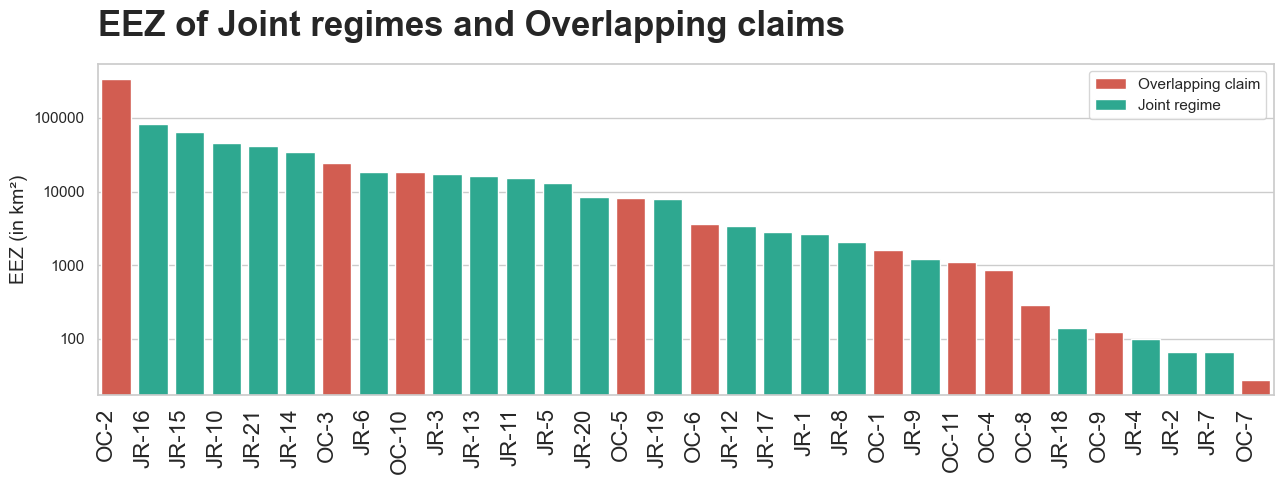

In [247]:
plt.figure(figsize=(13, 5))
palette = {
    'Joint regime': '#1ABC9C',   # turquoise
    'Overlapping claim': '#E74C3C'  # corail chaud
}
otj_full['entity_type'] = otj_full['entity'].apply(lambda x: 'Joint regime' if 'Joint regime' in x else 'Overlapping claim')
sns.barplot(data=otj_full.sort_values(by='Area_EEZ_KM2', ascending=False), x='ISO', 
            y='Area_EEZ_KM2', hue='entity_type', palette=palette)

plt.xlabel('')
plt.xticks(rotation=90, ha='right', fontsize=16)
plt.ylabel('EEZ (in km²)', fontsize=14)
plt.yscale('log')
format_log_axis_plain('y')

plt.title('EEZ of Joint regimes and Overlapping claims', 
          fontsize=25, fontweight='bold', pad=20, loc='left')

plt.legend()
plt.tight_layout()
plt.show()

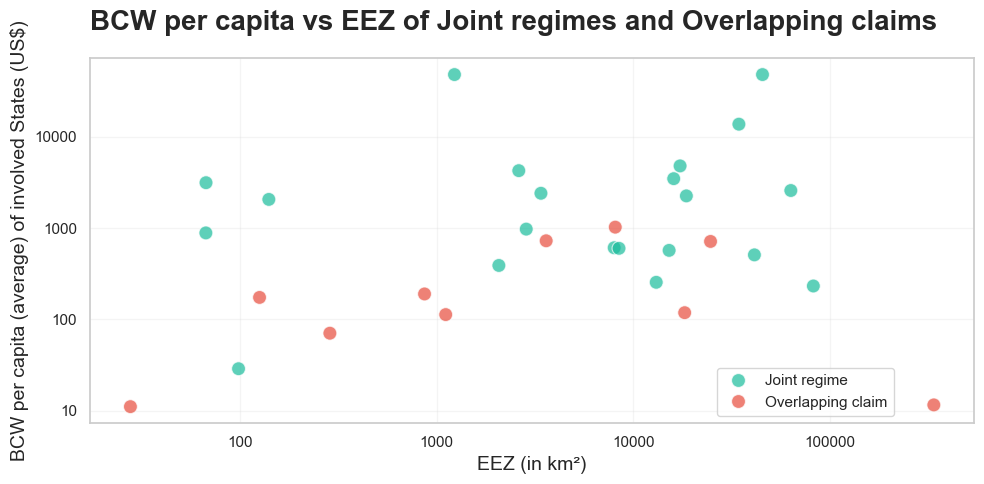

In [248]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=otj_full, x='Area_EEZ_KM2', y='Total BCW_InvolvedStates', hue='entity_type', 
                palette=palette, s=100, alpha=0.7)

plt.xlabel('EEZ (in km²)', fontsize=14)
plt.ylabel('BCW per capita (average) of involved States (US$)', fontsize=14)

plt.title('BCW per capita vs EEZ of Joint regimes and Overlapping claims',
          fontsize=20, fontweight='bold', pad=20, loc='left')

plt.yscale('log')
plt.xscale('log')
format_log_axis_plain('y')
format_log_axis_plain('x')

plt.legend(title='', bbox_to_anchor=(0.7, 0), loc='lower left', ncol=1)
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

#### Weighted average

In [249]:
# 1. Calcul du Total BCW par km² pour chaque pays
df['Total BCW_per_km2'] = df['Total BCW'] / df['Area_EEZ_KM2']

# 2. Bootstrap pour IC95% de Total BCW_per_km²
n_boot = 10000
d_boot = df['Total BCW_per_km2'].dropna().values
boot_means = np.random.choice(d_boot, size=(n_boot, len(d_boot)), replace=True).mean(axis=1)

Total_BCWperkm_mean = boot_means.mean()
Total_BCWperkm_ci = np.percentile(boot_means, [2.5, 97.5])

# 3. Aires totales des zones JR et OC
joint_area = otj_full[otj_full['entity_type'] == 'Joint regime']['Area_EEZ_KM2'].sum()
overlapping_area = otj_full[otj_full['entity_type'] == 'Overlapping claim']['Area_EEZ_KM2'].sum()

# 4. Estimations avec IC95% pour JR et OC
joint_Total_BCW_mean = joint_area * Total_BCWperkm_mean
joint_Total_BCW_ci = joint_area * Total_BCWperkm_ci

overlapping_Total_BCW_mean = overlapping_area * Total_BCWperkm_mean
overlapping_Total_BCW_ci = overlapping_area * Total_BCWperkm_ci

# 5. Affichage
print(f"Mean Total BCW per km²: {Total_BCWperkm_mean:,.2f} US$/km² "
      f"[{Total_BCWperkm_ci[0]:,.2f} ; {Total_BCWperkm_ci[1]:,.2f}]")

print(f"We estimate that the total Total BCW in Joint regimes is approximately "
      f"{joint_Total_BCW_mean/1e9:,.2f}B US$ "
      f"[{joint_Total_BCW_ci[0]/1e9:,.2f}B ; {joint_Total_BCW_ci[1]/1e9:,.2f}B]")

print(f"We estimate that the total Total BCW in Overlapping claims is approximately "
      f"{overlapping_Total_BCW_mean/1e9:,.2f}B US$ "
      f"[{overlapping_Total_BCW_ci[0]/1e9:,.2f}B ; {overlapping_Total_BCW_ci[1]/1e9:,.2f}B]")


Mean Total BCW per km²: 13,797.21 US$/km² [10,650.31 ; 17,602.25]
We estimate that the total Total BCW in Joint regimes is approximately 5.20B US$ [4.02B ; 6.64B]
We estimate that the total Total BCW in Overlapping claims is approximately 5.49B US$ [4.24B ; 7.00B]


In [250]:
# Moyenne ponderee par l'aire (ratio global)
Total_BCWperkm_mean_aw = df['Total BCW'].sum() / df['Area_EEZ_KM2'].sum()

# Bootstrap par "pays" pour l'IC95% du ratio global
n_boot = 10000
rng = np.random.default_rng(42)
means_aw = []

vals = df[['Total BCW', 'Area_EEZ_KM2']].dropna().to_numpy()
n = len(vals)

for _ in range(n_boot):
    sample = vals[rng.integers(0, n, n), :]   # bootstrap pays
    num = sample[:,0].sum()
    den = sample[:,1].sum()
    if den > 0:
        means_aw.append(num/den)

means_aw = np.array(means_aw)
aw_ci = np.percentile(means_aw, [2.5, 97.5])

print(f"Weighted mean Total BCW per km²: {Total_BCWperkm_mean_aw:,.2f} US$/km² "
      f"[{aw_ci[0]:,.2f} ; {aw_ci[1]:,.2f}]")

Weighted mean Total BCW per km²: 8,224.41 US$/km² [7,702.13 ; 13,133.19]


In [251]:
byc = df.dropna(subset=['Total BCW','Area_EEZ_KM2','Continent']).copy()
res = []

for cont, g in byc.groupby('Continent'):
    m = g['Total BCW'].sum() / g['Area_EEZ_KM2'].sum()
    # petit bootstrap par continent
    arr = g[['Total BCW','Area_EEZ_KM2']].to_numpy()
    b = []
    for _ in range(5000):
        samp = arr[rng.integers(0, len(arr), len(arr)), :]
        den = samp[:,1].sum()
        if den>0:
            b.append(samp[:,0].sum()/den)
    ci = np.percentile(b, [2.5,97.5])
    res.append((cont, m, ci[0], ci[1]))

continent_rates = pd.DataFrame(res, columns=['Continent','Total BCWperkm','ci_lo','ci_hi'])
continent_rates

Continent  Total BCWperkm      ci_lo       ci_hi
0     Africa     10,854.6545 7,864.0347 14,406.8299
1   Americas     11,074.8626 5,429.0769 21,522.3398
2       Asia      8,002.8288 4,836.5592 11,801.2699
3  Caribbean     18,690.6932 4,250.5906 34,557.7856
4     Europe     11,643.2407 5,887.0323 39,174.6488
5    Oceania      8,366.6279 4,747.5358 10,898.6266

In [252]:
# 1) Taux globaux pondere (au cas ou un continent manque)
df_clean = df.dropna(subset=['Total BCW','Area_EEZ_KM2']).copy()
global_rate = df_clean['Total BCW'].sum() / df_clean['Area_EEZ_KM2'].sum()

# Bootstrap pour IC95% global (coherent avec ta methode precedente)
rng = np.random.default_rng(42)
n_boot = 10000
vals = df_clean[['Total BCW','Area_EEZ_KM2']].to_numpy()
n = len(vals)
boot_ratio = []
for _ in range(n_boot):
    samp = vals[rng.integers(0, n, n), :]
    den = samp[:,1].sum()
    if den > 0:
        boot_ratio.append(samp[:,0].sum()/den)
boot_ratio = np.array(boot_ratio)
global_ci_lo, global_ci_hi = np.percentile(boot_ratio, [2.5, 97.5])

# 2) Table des taux par continent (tu l'as deja creee: continent_rates)
#    Continent | Total BCWperkm | ci_lo | ci_hi
# On la transforme en dict pour merge facile
rate_map = continent_rates.set_index('Continent')[['Total BCWperkm','ci_lo','ci_hi']]

# 3) Prep des donnees OTJ (JR / OC)
cols_needed = ['entity','ISO','Continent','entity_type','Area_EEZ_KM2']
missing_cols = [c for c in cols_needed if c not in otj_full.columns]
if missing_cols:
    raise ValueError(f"Colonnes manquantes dans otj_full: {missing_cols}")

otj = otj_full[cols_needed].copy()

# 4) Merge des taux continentaux
otj = otj.merge(rate_map, left_on='Continent', right_index=True, how='left')

# 5) Fallback: si continent inconnu => utiliser le taux global pondere
otj['Total BCWperkm'] = otj['Total BCWperkm'].fillna(global_rate)
otj['ci_lo']    = otj['ci_lo'].fillna(global_ci_lo)
otj['ci_hi']    = otj['ci_hi'].fillna(global_ci_hi)

# 6) Estimations par entite
otj['Total BCW_est']      = otj['Area_EEZ_KM2'] * otj['Total BCWperkm']
otj['Total BCW_est_low']  = otj['Area_EEZ_KM2'] * otj['ci_lo']
otj['Total BCW_est_high'] = otj['Area_EEZ_KM2'] * otj['ci_hi']

result_otj = otj.rename(columns={
    'Area_EEZ_KM2':'EEZ_area',
    'Total BCWperkm':'rate_per_km2',
    'ci_lo':'rate_ci_lo',
    'ci_hi':'rate_ci_hi'
})[[
    'entity','ISO','Continent','entity_type','EEZ_area',
    'rate_per_km2','rate_ci_lo','rate_ci_hi',
    'Total BCW_est','Total BCW_est_low','Total BCW_est_high'
]]

# 7) Totaux par type (JR / OC) et global
def summarize(group):
    return pd.Series({
        'Total BCW_total'     : group['Total BCW_est'].sum(),
        'Total BCW_total_low' : group['Total BCW_est_low'].sum(),
        'Total BCW_total_high': group['Total BCW_est_high'].sum()
    })

summary_by_type = (result_otj
                   .groupby('entity_type', dropna=False)
                   .apply(summarize)
                   .reset_index())

summary_global = summarize(result_otj)

# 8) Impression lisible (en milliards US$)
def to_billion(x): return x / 1e9

print("=== TOTALS BY TYPE (Billion US$) ===")
for _, row in summary_by_type.iterrows():
    et = row['entity_type']
    print(f"{et}: {to_billion(row['Total BCW_total_low']):.2f}B  -  "
          f"{to_billion(row['Total BCW_total']):.2f}B  -  "
          f"{to_billion(row['Total BCW_total_high']):.2f}B")

print("\n=== GLOBAL TOTAL (Billion US$) ===")
print(f"{to_billion(summary_global['Total BCW_total_low']):.2f}B  -  "
      f"{to_billion(summary_global['Total BCW_total']):.2f}B  -  "
      f"{to_billion(summary_global['Total BCW_total_high']):.2f}B")

# 9) Resultats par entite (DataFrame principal)
# result_otj

=== TOTALS BY TYPE (Billion US$) ===
Joint regime: 2.23B  -  4.14B  -  8.04B
Overlapping claim: 1.96B  -  3.50B  -  5.43B

=== GLOBAL TOTAL (Billion US$) ===
4.19B  -  7.64B  -  13.47B


In [253]:
global_rate, global_ci_lo, global_ci_hi

(np.float64(10032.409872342474),
 np.float64(7702.13479079121),
 np.float64(13133.189159972948))

#### Econometrics

In [254]:
# =========================
# Préparation des données
# =========================
X = df[['Area_EEZ_KM2', 'Continent']].copy()
X['log_EEZ'] = np.log(X['Area_EEZ_KM2'])
X.drop(columns=['Area_EEZ_KM2'], inplace=True)
y = np.log(df['Total BCW'])

X = pd.get_dummies(X, columns=['Continent'], drop_first=True)
regdata = pd.concat([X, y], axis=1).dropna()
X = regdata.drop(columns=['Total BCW']).astype(float)
y = regdata['Total BCW'].astype(float)

# Ajout constante pour statsmodels
X_sm = sm.add_constant(X)

# =========================
# Régression log-log avec statsmodels
# =========================
model_sm = sm.OLS(y, X_sm).fit(cov_type='HC3')  # robust SE
print(model_sm.summary())

# =========================
# Prédictions avec IC
# =========================
otj_pred = otj_full[['Area_EEZ_KM2', 'Continent']].copy()
otj_pred['log_EEZ'] = np.log(otj_pred['Area_EEZ_KM2'])
areas = otj_pred['Area_EEZ_KM2'].values
otj_pred.drop(columns=['Area_EEZ_KM2'], inplace=True)
otj_pred = pd.get_dummies(otj_pred, columns=['Continent'], drop_first=True)

# Ajout de colonnes manquantes si besoin pour aligner
for col in X.columns:
    if col not in otj_pred.columns:
        otj_pred[col] = 0
otj_pred = otj_pred[X.columns].astype(float)  # même ordre que pour l'entraînement

otj_pred_sm = sm.add_constant(otj_pred)

predictions = model_sm.get_prediction(otj_pred_sm)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% CI

# =========================
# Conversion et assemblage final
# =========================
resid_log = model_sm.resid
S = np.mean(np.exp(resid_log))  # smearing factor

Total_BCW_pred = np.exp(pred_summary['mean']) * S
Total_BCW_lower = np.exp(pred_summary['mean_ci_lower']) * S
Total_BCW_upper = np.exp(pred_summary['mean_ci_upper']) * S

# Total_BCW estimé avec méthode Total_BCWperkm
Total_BCW_est = areas * Total_BCWperkm_mean

result_df = pd.DataFrame({
    'entity': otj_full['entity'],
    'ISO': otj_full['ISO'],
    'Continent': otj_full['Continent'],
    'EEZ_area': areas,
    'Total BCW_pred': Total_BCW_pred,
    'Total BCW_pred_lower': Total_BCW_lower,
    'Total BCW_pred_upper': Total_BCW_upper,
    'Total BCW_est': Total_BCW_est
})

result_df['Total BCW_est_low'] = areas * Total_BCWperkm_ci[0]
result_df['Total BCW_est_high'] = areas * Total_BCWperkm_ci[1]
print(f"""
Total Total BCW estimated for Joint regimes and Overlapping claims:
- Lower bound: {result_df['Total BCW_pred_lower'].sum()/1e9:.2f} billion US$
- Point estimate: {result_df['Total BCW_pred'].sum()/1e9:.2f} billion US$
- Upper bound: {result_df['Total BCW_pred_upper'].sum()/1e9:.2f} billion US$""")
result_df.head()

                            OLS Regression Results                            
Dep. Variable:              Total BCW   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     29.55
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           1.08e-24
Time:                        22:50:34   Log-Likelihood:                -468.57
No. Observations:                 192   AIC:                             951.1
Df Residuals:                     185   BIC:                             973.9
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8751    

entity   ISO  Continent  \
0  Joint regime area Torres Strait Treaty: Papua ...  JR-1    Oceania   
1               Joint regime area: Barbados / Guyana  JR-2  Caribbean   
2  Joint regime area: Costa Rica / Ecuador (Galap...  JR-3   Americas   
3              Joint regime area: Croatia / Slovenia  JR-4     Europe   
4   Joint regime area: Dominican Republic / Colombia  JR-5  Caribbean   

     EEZ_area   Total BCW_pred  Total BCW_pred_lower  Total BCW_pred_upper  \
0  2,620.8506   6,071,938.6184          751,001.1116       49,092,388.8333   
1     67.1575     284,069.1403           54,165.6023        1,489,788.2248   
2 17,337.2422 290,618,711.4975       61,019,104.0972    1,384,144,141.7741   
3     98.3189     159,033.7813           17,431.8901        1,450,889.3436   
4 13,110.7034 154,794,701.5388       66,773,678.2183      358,844,985.9862   

     Total BCW_est  Total BCW_est_low  Total BCW_est_high  
0  36,160,431.3536    27,912,865.1486     46,132,858.7776  
1     926,586.8023       715,248.4496      1,182,123.5670  
2 239,205,607.1216   184,646,963.6681    305,174,415.2119  
3   1,356,527.1840     1,047,126.8992      1,730,634.1398  
4 180,891,155.4773   139,633,025.3927    230,777,836.9164

In [255]:
SEED = 42
B_SIM = 10000  # number of draws for parametric simulation of the total
rng = np.random.default_rng(SEED)

df_ = df.copy()
df_ = df_.loc[(df_['Area_EEZ_KM2'] > 0) & (df_['Total BCW'] > 0)].copy()

X = df_[['Area_EEZ_KM2', 'Continent']].copy()
X['log_EEZ'] = np.log(X['Area_EEZ_KM2'])
X.drop(columns=['Area_EEZ_KM2'], inplace=True)

y = np.log(df_['Total BCW'])  # dependent variable on log scale

# dummies
X = pd.get_dummies(X, columns=['Continent'], drop_first=True)

# drop rows with any remaining NA
regdata = pd.concat([X, y.rename('Total BCW')], axis=1).dropna()
X = regdata.drop(columns=['Total BCW']).astype(float)
y = regdata['Total BCW'].astype(float)

# add constant for statsmodels
X_sm = sm.add_constant(X, has_constant='add')

# estimation: statsmodels OLS with robust HC3 SE
model_sm = sm.OLS(y, X_sm).fit(cov_type='HC3')  # robust SE
print(model_sm.summary())

# predictions per entity (JR / OC) with smearing
# prepare prediction design matrix for otj_full
otj_pred = otj_full[['Area_EEZ_KM2', 'Continent']].copy()
assert (otj_pred['Area_EEZ_KM2'] > 0).all(), "Area_EEZ_KM2 must be > 0 for log transform in otj_pred"
otj_pred['log_EEZ'] = np.log(otj_pred['Area_EEZ_KM2'])
areas = otj_pred['Area_EEZ_KM2'].values  # keep raw areas for Total BCW-per-km method
otj_pred.drop(columns=['Area_EEZ_KM2'], inplace=True)
otj_pred = pd.get_dummies(otj_pred, columns=['Continent'], drop_first=True)

# align dummy columns with training design X
for col in X.columns:
    if col not in otj_pred.columns:
        otj_pred[col] = 0.0
otj_pred = otj_pred[X.columns].astype(float)
otj_pred_sm = sm.add_constant(otj_pred, has_constant='add')

# point predictions on log scale
pred_log = model_sm.predict(otj_pred_sm)
resid_log = model_sm.resid # duan smearing factor (global)
S = float(np.mean(np.exp(resid_log)))  # E[exp(epsilon)]

# per-entity predictions in levels (E[Y|X])
Total_BCW_pred = np.exp(pred_log) * S

# optional: approximate 95% CI per entity via linear CI on log scale + smearing
pred_obj = model_sm.get_prediction(otj_pred_sm)
pred_summary = pred_obj.summary_frame(alpha=0.05)  # mean_ci_lower/upper on log scale
Total_BCW_lower = np.exp(pred_summary['mean_ci_lower'].values) * S
Total_BCW_upper = np.exp(pred_summary['mean_ci_upper'].values) * S

# total and its 95% CI via parametric simulation (do not sum per-entity CIs)
beta_hat = model_sm.params.values
# use the (robust) covariance matrix returned by statsmodels with cov_type='HC3'
V_beta = model_sm.cov_params().values

totals = np.empty(B_SIM, dtype=float)
X_pred_full = otj_pred_sm.values  # (n_pred x k)

for b in range(B_SIM):
    beta_b = rng.multivariate_normal(mean=beta_hat, cov=V_beta, check_valid='ignore')
    mu_log_b = X_pred_full @ beta_b                     # log-scale mean
    pred_b = np.exp(mu_log_b) * S                       # back-transform with smearing
    totals[b] = pred_b.sum()

tot_low, tot_mid, tot_high = np.percentile(totals, [2.5, 50.0, 97.5])

# Total_BCW-per-km comparator (needs Total_BCWperkm_mean and Total_BCWperkm_ci = (low, high))
Total_BCW_est = areas * Total_BCWperkm_mean
Total_BCW_est_low = areas * Total_BCWperkm_ci[0]
Total_BCW_est_high = areas * Total_BCWperkm_ci[1]

# assemble result table
result_df = pd.DataFrame({
    'entity': otj_full['entity'].values,
    'ISO': otj_full['ISO'].values,
    'Continent': otj_full['Continent'].values,
    'EEZ_area': areas.astype(float),
    'Total BCW_pred': Total_BCW_pred.astype(float),
    'Total BCW_pred_lower': Total_BCW_lower.astype(float),
    'Total BCW_pred_upper': Total_BCW_upper.astype(float),
    'Total BCW_est': Total_BCW_est.astype(float),
    'Total BCW_est_low': Total_BCW_est_low.astype(float),
    'Total BCW_est_high': Total_BCW_est_high.astype(float),
})

# reporting
total_point = float(result_df['Total BCW_pred'].sum())

print(f"""
Total Total BCW (JR/OC) — statsmodels + smearing (levels):
- Point estimate: {total_point/1e9:.2f} billion US$
- 95% CI (parametric, aggregated): [{tot_low/1e9:.2f}, {tot_high/1e9:.2f}] billion US$
(median of simulated totals: {tot_mid/1e9:.2f} billion US$)

Comparator — Total BCW-per-km:
- Point estimate: {result_df['Total BCW_est'].sum()/1e9:.2f} billion US$
- 95% range (agg by sum of pointwise): [{result_df['Total BCW_est_low'].sum()/1e9:.2f}, {result_df['Total BCW_est_high'].sum()/1e9:.2f}] billion US$
""")

# return final table for further use
# result_df


                            OLS Regression Results                            
Dep. Variable:              Total BCW   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     29.55
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           1.08e-24
Time:                        22:50:34   Log-Likelihood:                -468.57
No. Observations:                 192   AIC:                             951.1
Df Residuals:                     185   BIC:                             973.9
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8751    

In [256]:
hall1 = otj_full[['ISO', 'entity']].rename(columns={'entity':'country_name'}).sort_values(by='country_name').reset_index(drop=True)
hall2 = data[['ISO', 'country_name']].sort_values(by='country_name').reset_index(drop=True)
hall = pd.concat([hall2, hall1], axis=0)
# hall.to_excel('country_names_ISO.xlsx', index=False)

In [257]:
print(f"""
Total Total BCW estimated for Joint regimes and Overlapping claims:
- Lower bound: {result_df['Total BCW_pred_lower'].sum()/1e9:.2f} billion US$
- Point estimate: {result_df['Total BCW_pred'].sum()/1e9:.2f} billion US$
- Upper bound: {result_df['Total BCW_pred_upper'].sum()/1e9:.2f} billion US$""")


Total Total BCW estimated for Joint regimes and Overlapping claims:
- Lower bound: 6.23 billion US$
- Point estimate: 14.59 billion US$
- Upper bound: 37.68 billion US$


In [258]:
pal = {
    'Asia': '#ef233c',
    'Europe': '#ffea00',
    'Africa': '#4cc9f0',
    'Oceania': '#00509d',
    'Antarctica': '#6c757d',
    'Americas': '#bfd200',
    'Caribbean': '#80b918',
    'unknown': '#d3D3D3'
}

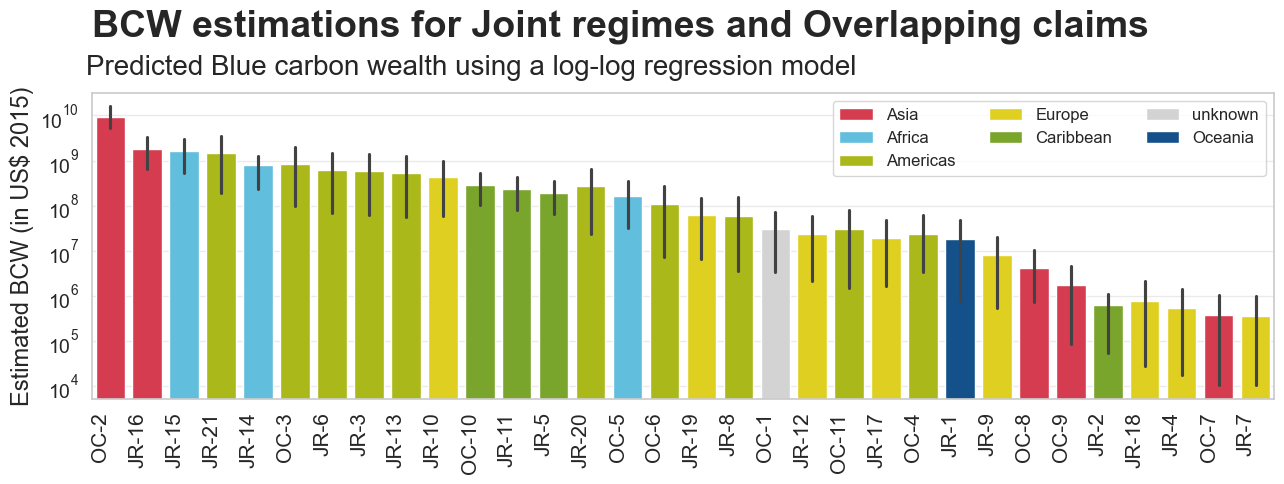

In [259]:
# preds
df_pred_ci = result_df[['ISO', 'Continent', 'Total BCW_pred', 'Total BCW_pred_lower', 'Total BCW_pred_upper']].copy()
df_pred_ci = df_pred_ci.sort_values(by='Total BCW_pred', ascending=False)
df_pred_ci = df_pred_ci.melt(id_vars=['ISO', 'Continent'], 
                            value_vars=['Total BCW_pred', 'Total BCW_pred_lower', 'Total BCW_pred_upper'],
                            var_name='Type', value_name='Total BCW')
df_pred_ci['Type'] = df_pred_ci['ISO'].apply(
    lambda x: 'Joint regime' if x.startswith('JR-') else ('Overlapping claim' if x.startswith('OC-') else 'Other'))
df_pred_ci['Continent'] = df_pred_ci['Continent'].fillna('unknown')

# estim
df_est_ci = result_df[['ISO', 'Continent', 'Total BCW_est', 'Total BCW_est_low', 'Total BCW_est_high']].copy()
df_est_ci = df_est_ci.sort_values(by='Total BCW_est', ascending=False)
df_est_ci = df_est_ci.melt(id_vars=['ISO', 'Continent'], 
                            value_vars=['Total BCW_est', 'Total BCW_est_low', 'Total BCW_est_high'],
                            var_name='Type', value_name='Total BCW')
df_est_ci['Type'] = df_est_ci['ISO'].apply(
    lambda x: 'Joint regime' if x.startswith('JR-') else ('Overlapping claim' if x.startswith('OC-') else 'Other'))
df_est_ci['Continent'] = df_est_ci['Continent'].fillna('unknown')

# LR
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(data=df_pred_ci, x='ISO', y='Total BCW', hue='Continent', palette=pal, ax=ax)
plt.title('BCW estimations for Joint regimes and Overlapping claims',
          fontsize=27, fontweight='bold', pad=40, loc='left')
fig.text(0.0725, 0.875, 'Predicted Blue carbon wealth using a log-log regression model', 
         fontsize=20, va='top', ha='left')
plt.ylabel('Estimated BCW (in US$ 2015)', fontsize=17)
plt.xlabel('', fontsize=14)
ax.set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=90, ha='right', fontsize=15)
plt.legend(fontsize=12, loc='upper right', ncol=3)
plt.tight_layout()
plt.grid(axis='y', alpha=0.4)
plt.show()

# Debt

In [260]:
be = df[['country_name', 'ISO', 'Groups', 'Continent', 'Population', 'cBCW', 'cBCW_per_capita', 
         'Total BCW', 'Total BCW_per_capita', 'Debt (2015 US$)', 'Debt (2015 US$)_per_capita',
         'BCW_to_Debt_ratio']].copy()
be.head()

country_name    ISO                Groups Continent  \
0  Abu musa, Greater and Lesser Tunb     AE                   NaN      Asia   
1                        Afghanistan    AFG                  LDCs      Asia   
2                             Alaska  US-AK                   NaN  Americas   
3                            Albania    ALB   Developed economies    Europe   
4                            Algeria    DZA  Developing economies    Africa   

       Population             cBCW  cBCW_per_capita          Total BCW  \
0             NaN              NaN              NaN                NaN   
1 41,454,761.0000              NaN              NaN                NaN   
2             NaN 642,830,100.1929              NaN   642,830,100.1929   
3  2,811,655.0000  36,903,385.1708          13.1251   200,800,073.0626   
4 46,164,219.0000  18,797,922.9248           0.4072 6,330,608,753.1612   

   Total BCW_per_capita    Debt (2015 US$)  Debt (2015 US$)_per_capita  \
0                   NaN                NaN                         NaN   
1                   NaN 2,588,228,316.5025                     62.4350   
2                   NaN                NaN                         NaN   
3               71.4170 8,579,785,823.0375                  3,051.5073   
4              137.1324 5,523,025,799.7245                    119.6387   

   BCW_to_Debt_ratio  
0                NaN  
1                NaN  
2                NaN  
3             0.0234  
4             1.1462

**30 Premiers**

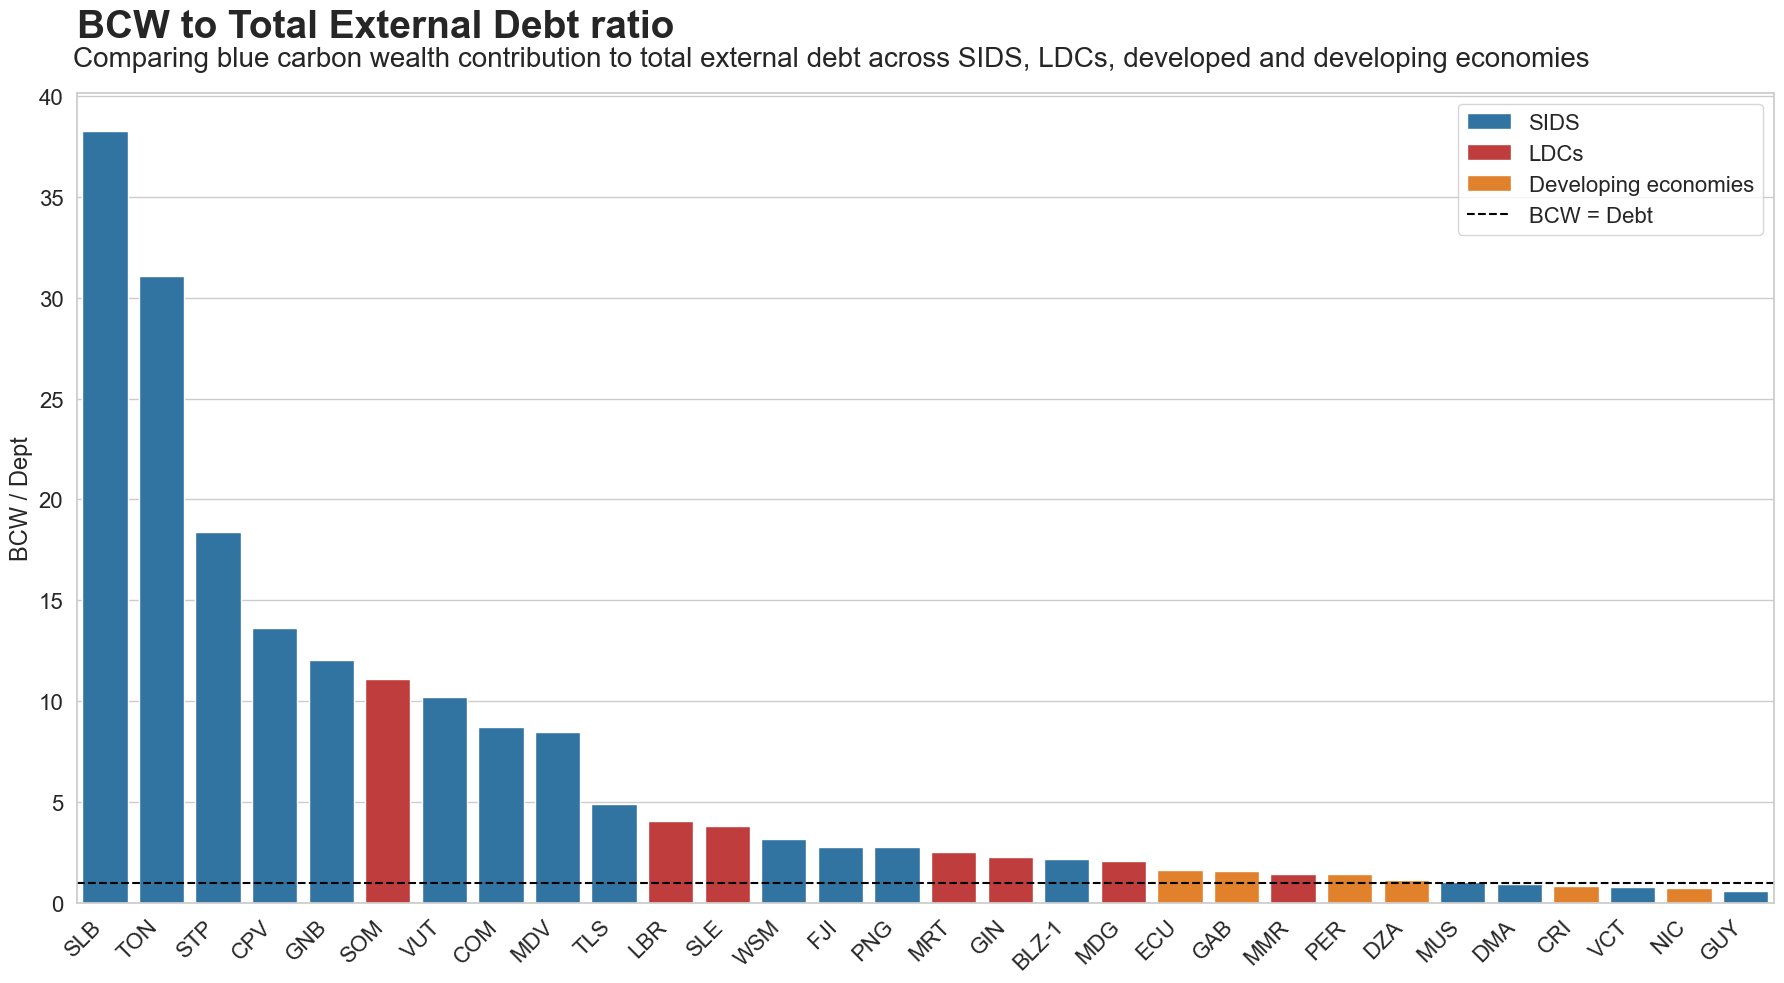

In [261]:
by_bg = be[['ISO', 'Groups', 'BCW_to_Debt_ratio']]
by_bg = be.sort_values(by='BCW_to_Debt_ratio', ascending=False)

fig, ax = plt.subplots(figsize=(18, 10))
sns.set_theme(style='whitegrid')
sns.barplot(by_bg.iloc[:30, :], x='ISO', y='BCW_to_Debt_ratio', palette= color_mapping,ci=False, hue='Groups',ax=ax)
plt.title('BCW to Total External Debt ratio', 
         fontsize=28, fontweight='bold', loc='left', pad=40)
fig.text(0.045, 0.945, 'Comparing blue carbon wealth contribution to total external debt across SIDS, LDCs, developed and developing economies', 
         fontsize=20, va='top', ha='left')
plt.axhline(y=1, color='black', linestyle='--', label='BCW = Debt')
plt.ylabel('BCW / Dept', fontsize=17)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

**30 Suivants**

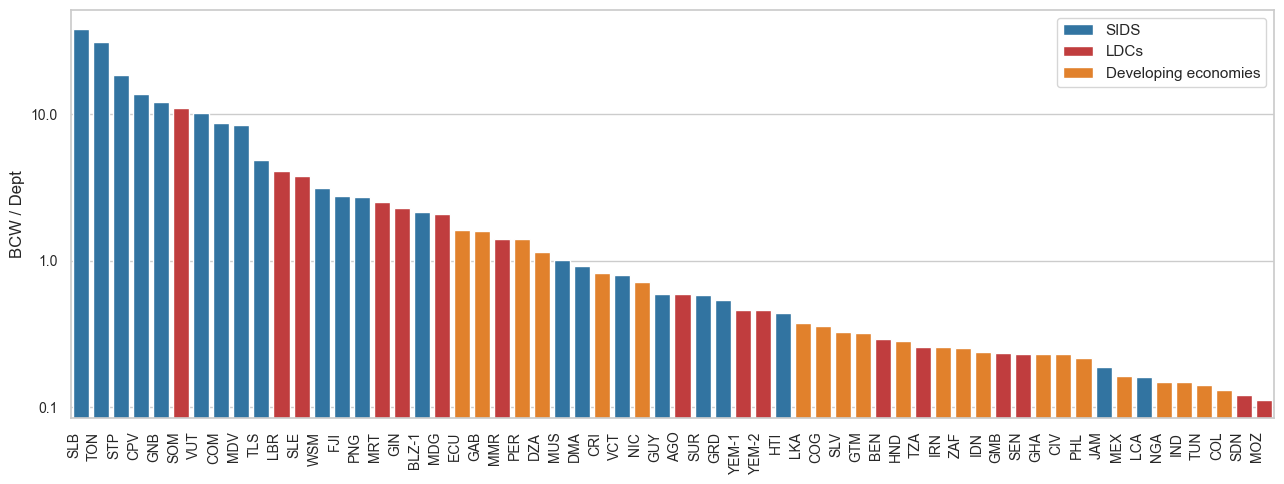

In [262]:
by_bg = be[['ISO', 'Groups', 'BCW_to_Debt_ratio']].copy()
by_bg = be.sort_values(by='BCW_to_Debt_ratio', ascending=False)

fig, ax = plt.subplots(figsize=(13, 5))
sns.set_theme(style='whitegrid')
sns.barplot(by_bg.iloc[:60, :], x='ISO', y='BCW_to_Debt_ratio', ci=False, palette= color_mapping, 
            hue='Groups',ax=ax)
plt.ylabel('BCW / Dept', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=90,ha='right')
plt.tick_params(axis='both', which='major', labelsize=10)
ax.set_yscale("log")
format_log_axis_plain('y')
plt.tight_layout()
plt.legend()
plt.show()

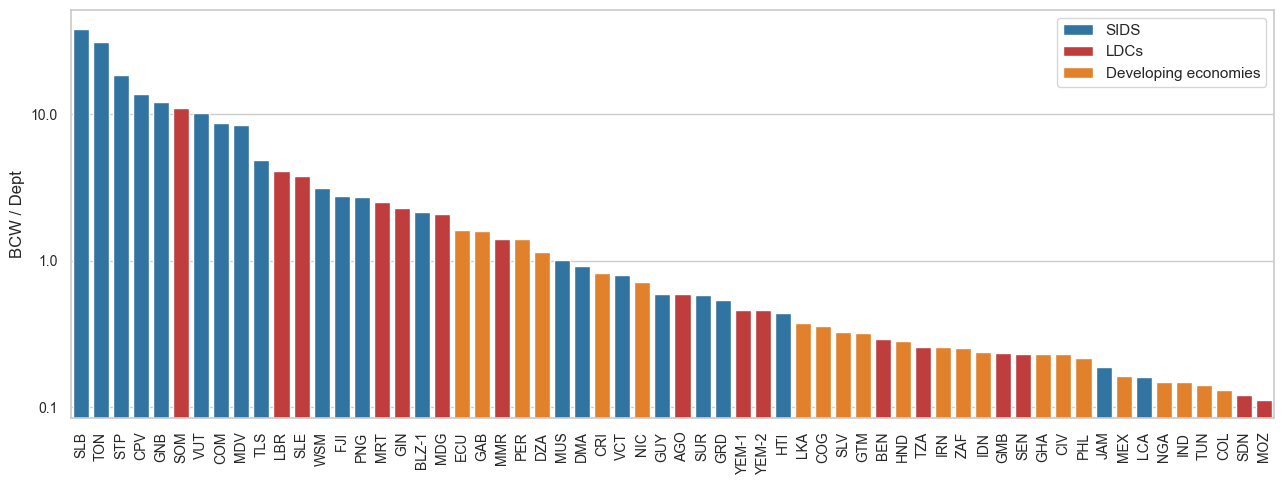

In [263]:
by_bg = be[['ISO', 'Groups', 'BCW_to_Debt_ratio']].copy()
by_bg = be.sort_values(by='BCW_to_Debt_ratio', ascending=False)

fig, ax = plt.subplots(figsize=(13, 5))
sns.set_theme(style='whitegrid')
sns.barplot(by_bg.iloc[:60, :], x='ISO', y='BCW_to_Debt_ratio', ci=False, palette= color_mapping,
            hue='Groups',ax=ax)
plt.ylabel('BCW / Dept', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=90,ha='center')
plt.tick_params(axis='both', which='major', labelsize=10)
ax.set_yscale("log")
format_log_axis_plain('y')
plt.tight_layout()
plt.legend()
plt.show()

# Summary table

In [264]:
# Select relevant columns
tbl = data[['ISO', 'country_name', 'Groups', 'Continent', 'Area_EEZ_KM2',
            'Area_EEZ_KM2_per_capita', 'Total BCW', 'Total BCW_per_capita', 'GDP', 'GDP_per_capita',
            'Debt (2015 US$)', 'Debt (2015 US$)_per_capita']].copy()

# Numerical columns to summarize
num_cols = ['Area_EEZ_KM2', 'Area_EEZ_KM2_per_capita', 'Total BCW', 'Total BCW_per_capita',
            'GDP', 'GDP_per_capita', 'Debt (2015 US$)', 'Debt (2015 US$)_per_capita']

# Conversion factors for units
conversion_factors = {
    'Area_EEZ_KM2': 1 / 1_000,              # km² → thousands de km²
    'Total BCW': 1 / 1_000_000_000,               # US$ → billion US$
    'Total BCW_per_capita': 1,                          # US$ per habitant
    'GDP': 1 / 1_000_000_000,               # US$ → billion US$
    'GDP_per_capita': 1,                          # US$ per habitant
    'Debt (2015 US$)': 1 / 1_000_000_000,   # US$ → billion US$
    'Debt (2015 US$)_per_capita': 1                          # US$ per habitant
}

# Fonction to compute stats for a group
def stats_for_group(df, group_name):
    df_conv = df.copy()
    # Conversion
    for col, factor in conversion_factors.items():
        if col in df_conv:
            df_conv[col] = df_conv[col] * factor
    
    # Total number of countries
    n_countries = df_conv['ISO'].nunique()
    
    # stats
    stats = df_conv[num_cols].agg(['mean', 'median', 'std']).round(3)
    stats.reset_index(inplace=True)
    stats.rename(columns={'index': 'Stat'}, inplace=True)
    
    stats.insert(0, 'Groups', group_name)
    stats.insert(1, 'Number of countries', n_countries)
    return stats

# Stats for all countries
results = [stats_for_group(tbl, 'All-Countries')]

# Stats for each group
for g in sorted(tbl['Groups'].dropna().unique()):
    sub_df = tbl[tbl['Groups'] == g]
    results.append(stats_for_group(sub_df, g))

# Fusion and formatting
summary_final = pd.concat(results, ignore_index=True)
summary_final.columns = [
    "Groups",
    "No.",
    "Stat",
    "EEZ Area (1,000 km²)",
    "EEZ per capita",
    "Total BCW (billion US$)",
    "Total BCW per capita",
    "GDP (billion US$)",
    "GDP per capita",
    "TED (billion US$)",
    "TED per capita"
]

# Résultat final
summary_final.to_csv('data_source/summary/data_summary.csv', index=False, float_format='%.2f')
summary_final

Groups  No.    Stat  EEZ Area (1,000 km²)  EEZ per capita  \
0          All-Countries  296    mean              970.4180          4.4920   
1          All-Countries  296  median              343.9720          0.0440   
2          All-Countries  296     std            2,403.8540         20.1610   
3    Developed economies   70    mean            1,377.7920          1.5620   
4    Developed economies   70  median              267.3250          0.0210   
5    Developed economies   70     std            4,008.8010         10.3290   
6   Developing economies   94    mean            1,072.0940          4.0060   
7   Developing economies   94  median              457.1910          0.0280   
8   Developing economies   94     std            1,921.4390         19.5670   
9                   LDCs   38    mean              708.7830          0.0360   
10                  LDCs   38  median              486.9040          0.0250   
11                  LDCs   38     std              633.1230          0.0430   
12                  SIDS   58    mean              624.6540         11.2760   
13                  SIDS   58  median              197.1130          1.0060   
14                  SIDS   58     std              957.1870         31.2890   

    Total BCW (billion US$)  Total BCW per capita  GDP (billion US$)  \
0                   12.3870           23,571.8530           466.7660   
1                    2.1410              492.6310            28.4260   
2                   25.5620           96,583.0400         2,025.8290   
3                   22.5990            2,539.2790         1,063.8880   
4                    1.1570              104.4270           215.5480   
5                   40.9060            8,038.3770         3,067.8790   
6                   14.8180            1,046.4230           525.8570   
7                    4.6070              214.6620            77.0060   
8                   26.0610            2,005.2350         2,110.6490   
9                    6.3780              370.4840            34.4900   
10                   5.5680              135.1360            17.1820   
11                   7.2220              498.1150            58.0870   
12                   6.5830           71,049.8280            17.8350   
13                   1.0570            3,049.2250             2.0390   
14                  11.7580          161,974.1490            58.3280   

    GDP per capita  TED (billion US$)  TED per capita  
0      17,443.8600            56.0290      1,929.0800  
1       6,685.9270             9.6800      1,079.6420  
2      25,438.0510           185.9850      2,172.2990  
3      39,359.2980            30.1620      4,561.9090  
4      35,609.8770            10.0510      3,427.7690  
5      34,717.4350            43.1420      2,528.3110  
6       8,489.0560           113.3190      2,013.0240  
7       5,181.7450            30.3150      1,180.5850  
8       9,578.2650           271.1830      1,911.7740  
9       1,040.4370            12.0940        502.6860  
10        875.3740             5.1870        272.2680  
11        658.7130            16.3110        563.2280  
12     16,766.4320             4.2700      3,056.1450  
13      9,844.4180             0.8520      2,734.9600  
14     20,930.6500             8.6810      2,665.4120

# Supplementary

### bcw

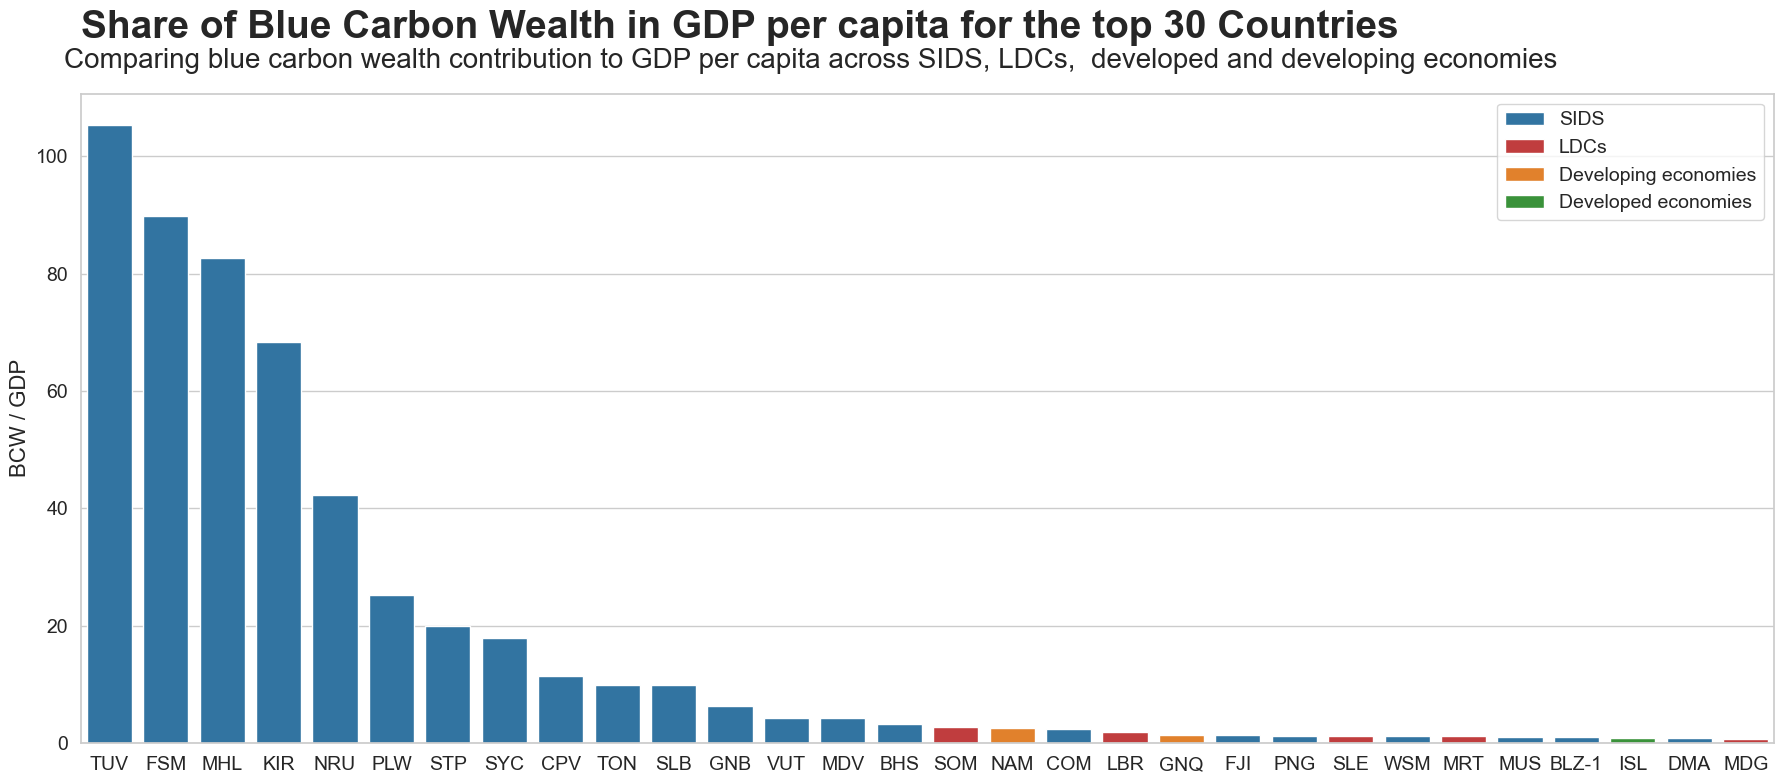

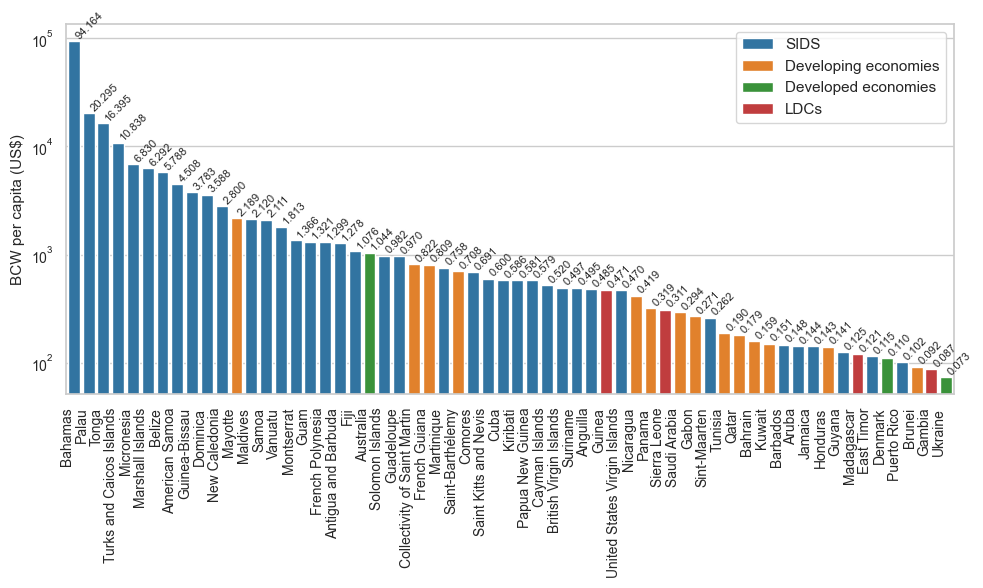

In [265]:
by_bg = df[['ISO', 'Groups', 'BCW_to_GDP_ratio']]
by_bg = by_bg.sort_values(by='BCW_to_GDP_ratio', ascending=False)

fig, ax = plt.subplots(figsize=(18, 8))
sns.set_theme(style='whitegrid')
sns.barplot(by_bg.iloc[:30, :], x='ISO', y='BCW_to_GDP_ratio', palette= color_mapping,
 hue='Groups',ax=ax)
plt.title('Share of Blue Carbon Wealth in GDP per capita for the top 30 Countries', 
         fontsize=28, fontweight='bold', loc='left', pad=40)
fig.text(0.04, 0.93, 'Comparing blue carbon wealth contribution to GDP per capita across SIDS, LDCs,  developed and developing economies', 
         fontsize=20, va='top', ha='left')
plt.ylabel('BCW / GDP', fontsize=16)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

# ============================================================================================================
by_country = df[['country_name', 'cBCW_per_capita', 'Groups']]
by_country = by_country.dropna(subset='Groups')
by_country = by_country.sort_values(by='cBCW_per_capita', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style='whitegrid')
sns.barplot(by_country.head(60), y='cBCW_per_capita', x='country_name', palette= color_mapping,
 hue='Groups',ax=ax)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/1e3:,.3f}',
                ha='left', va='bottom', rotation=45, fontsize=8)

plt.ylabel('BCW per capita (US$)', fontsize=11)
plt.xlabel('', fontsize=14)
plt.xticks(rotation=90, ha='right')
ax.set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend()
plt.show()

# ============================================================================================================
# by_bg = df[['country_name', 'Groups', 'cBCW', 'Debt (2015 US$)']]
# by_bg['BCW_Dept_Ratio'] = by_bg['cBCW'] / by_bg['Debt (2015 US$)']
# by_bg = by_bg.sort_values(by='BCW_Dept_Ratio', ascending=False)

# fig, ax = plt.subplots(figsize=(9, 10))
# sns.set_theme(style='whitegrid')
# sns.barplot(by_bg.head(60), x='BCW_Dept_Ratio', y='country_name', ci=False, palette= color_mapping,
#  hue='Groups',ax=ax)
# plt.xlabel('Coastal BCW / Dept', fontsize=11)
# plt.ylabel('', fontsize=14)
# plt.tick_params(axis='both', which='major', labelsize=10)
# ax.set_xscale("log")
# format_log_axis_plain('x')
# plt.tight_layout()
# plt.legend()
# plt.show()

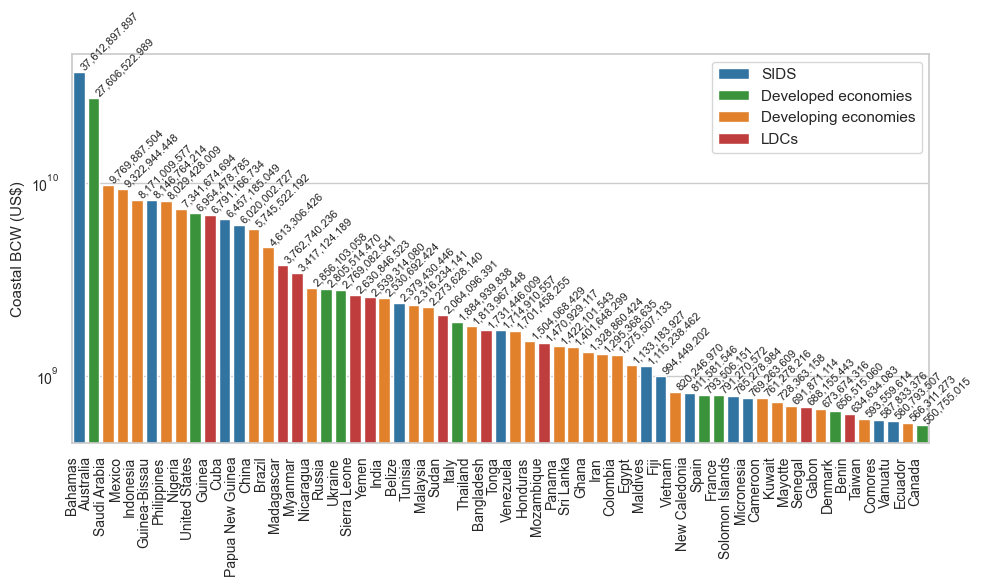

In [266]:
by_country = df[['country_name', 'cBCW', 'Groups']]
by_country = by_country.dropna(subset='Groups')
by_country = by_country.sort_values(by='cBCW', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.set_theme(style='whitegrid')
sns.barplot(by_country.head(60), y='cBCW', x='country_name', palette= color_mapping,
 hue='Groups',ax=ax)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height/1e3:,.3f}',
                ha='left', va='bottom', rotation=45, fontsize=8)

plt.ylabel('Coastal BCW (US$)', fontsize=11)
plt.xlabel('', fontsize=14)
plt.xticks(rotation=90, ha='right')
ax.set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend()
plt.show()

### Total BCW

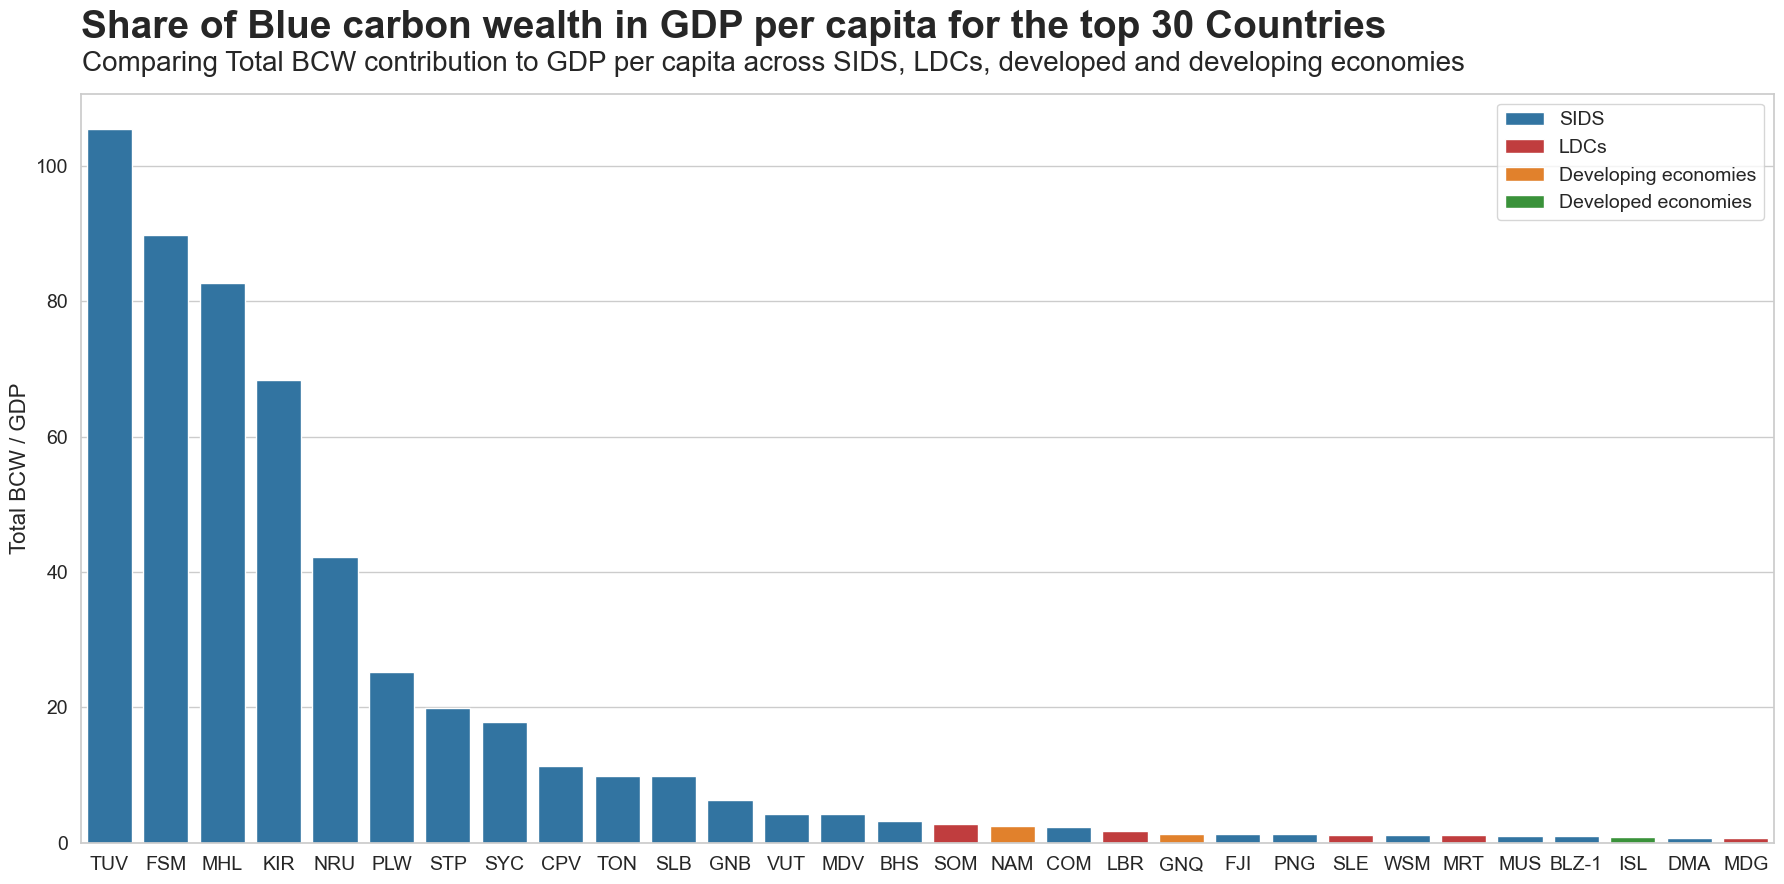

In [267]:
# 1. Total BCW per capita / GDP per capita
df['Total BCW_GDP_per_capita_ratio'] = df['Total BCW_per_capita'] / df['GDP_per_capita']
df['Total BCW_GDP_per_capita_ratio'] = df['Total BCW_GDP_per_capita_ratio'].replace([np.inf, -np.inf], np.nan)

by_bg = df[['ISO', 'Groups', 'Total BCW_GDP_per_capita_ratio']].sort_values(by='Total BCW_GDP_per_capita_ratio', ascending=False)
fig, ax = plt.subplots(figsize=(18, 9))
sns.barplot(data=by_bg.head(30), x='ISO', y='Total BCW_GDP_per_capita_ratio', palette=color_mapping, hue='Groups', ax=ax)
plt.title('Share of Blue carbon wealth in GDP per capita for the top 30 Countries', 
         fontsize=28, fontweight='bold', loc='left', pad=40)
fig.text(0.05, 0.935, 'Comparing Total BCW contribution to GDP per capita across SIDS, LDCs, developed and developing economies', 
         fontsize=20, va='top', ha='left')
plt.ylabel('Total BCW / GDP', fontsize=16)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

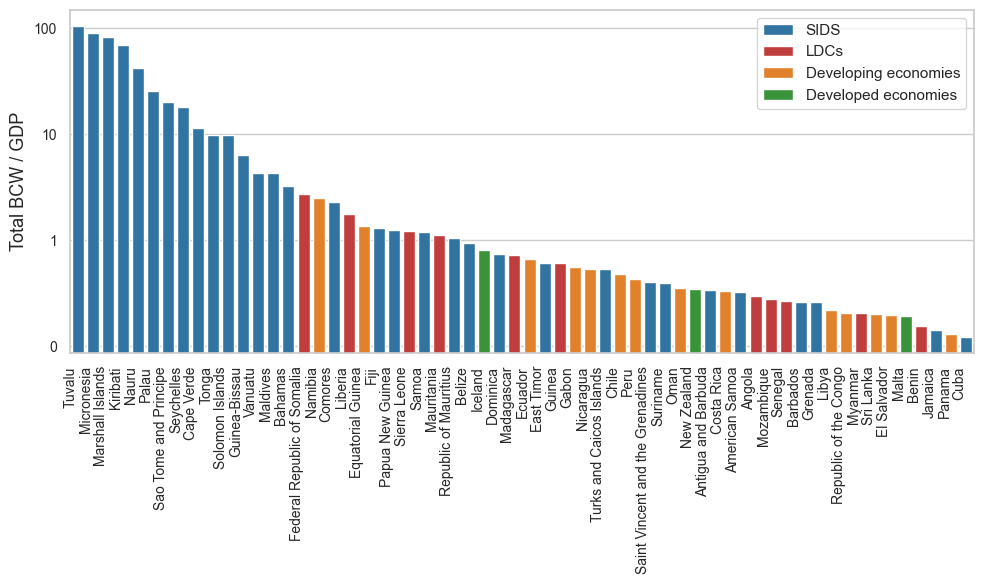

In [268]:
# 1. Total BCW per capita / GDP per capita
df['Total BCW_GDP_per_capita_ratio'] = df['Total BCW_per_capita'] / df['GDP_per_capita']
df['Total BCW_GDP_per_capita_ratio'] = df['Total BCW_GDP_per_capita_ratio'].replace([np.inf, -np.inf], np.nan)

by_bg = df[['country_name', 'Groups', 'Total BCW_GDP_per_capita_ratio']].sort_values(by='Total BCW_GDP_per_capita_ratio', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=by_bg.head(60), x='country_name', y='Total BCW_GDP_per_capita_ratio', palette=color_mapping, hue='Groups', ax=ax)
plt.ylabel('Total BCW / GDP', fontsize=13)
plt.yscale("log")
format_log_axis_plain('y')
plt.xlabel('')
plt.xticks(rotation=90, ha='right')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend(fontsize=11)
plt.show()

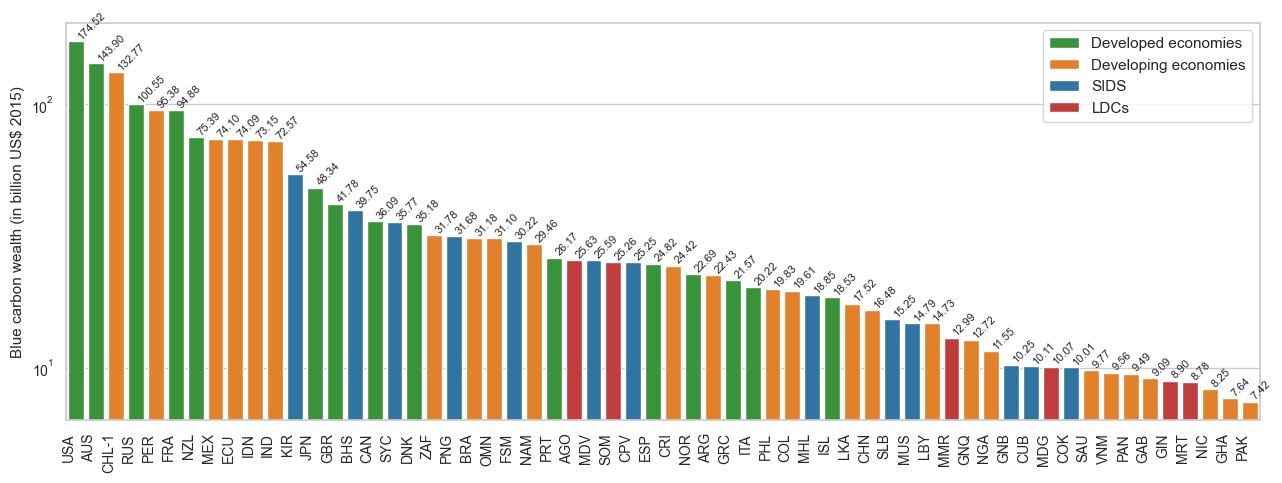

In [269]:
# 2. Total BCW absolute value by country
by_countryx = df[['ISO', 'Total BCW', 'cBCW', 'Groups']].dropna(subset=['Groups']).sort_values(by='Total BCW', ascending=False)
by_countryx['Total BCW'] = by_countryx['Total BCW'] / 1e9
fig, ax = plt.subplots(figsize=(13, 5))
sns.barplot(data=by_countryx.head(60), y='Total BCW', x='ISO', palette=color_mapping, hue='Groups', ax=ax)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 0.05, f'{height:,.2f}',
                ha='left', va='bottom', rotation=45, fontsize=8)
plt.ylabel('Blue carbon wealth (in billion US$ 2015)', fontsize=11)
plt.xlabel('')
plt.xticks(rotation=90, ha='right', fontsize=14)
ax.set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend()
plt.show()

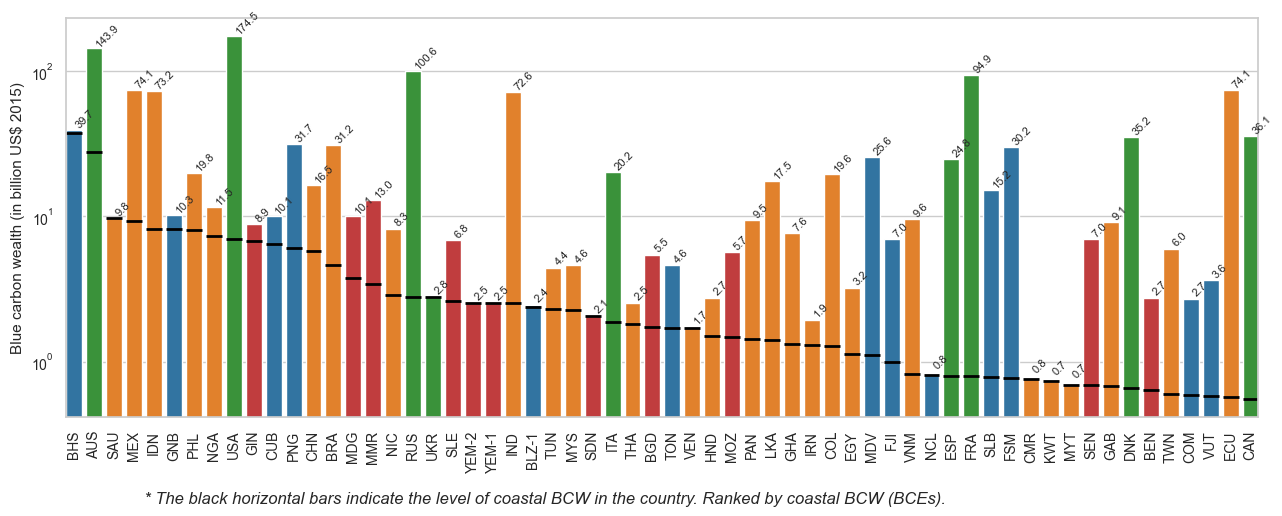

In [270]:
# 2. Total BCW absolute value by country
by_country = df[['ISO', 'Total BCW', 'cBCW', 'Groups']].dropna(subset=['Groups']).sort_values(by='cBCW', ascending=False)
by_country['Total BCW'] = by_country['Total BCW']/1e9
by_country['cBCW'] = by_country['cBCW']/1e9
top = by_country.head(60)

fig, ax = plt.subplots(figsize=(13, 5))

# 1) Barres Total BCW
sns.barplot(
    data=top,
    y='Total BCW', x='ISO',
    palette=color_mapping, hue='Groups', ax=ax
)
ax.margins(x=0)

for i, row in by_country.head(60).reset_index().iterrows():
    bcw = 0 if pd.isna(row['cBCW']) else row['cBCW']
    ax.hlines(
        y=bcw,
        xmin=i - 0.4, xmax=i + 0.4,
        colors="black", linewidth=2
    )
 
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 0.05, f'{height:,.1f}',
                ha='left', va='bottom', rotation=45, fontsize=8)
plt.ylabel('Blue carbon wealth (in billion US$ 2015)', fontsize=11)
plt.xlabel('')
plt.xticks(rotation=90, ha='center', fontsize=14)
ax.set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend().remove()
plt.figtext(
    0.425, 0, 
    "* The black horizontal bars indicate the level of coastal BCW in the country. Ranked by coastal BCW (BCEs).",
    ha="center", va="top", fontsize=12, style="italic"
)
plt.show()

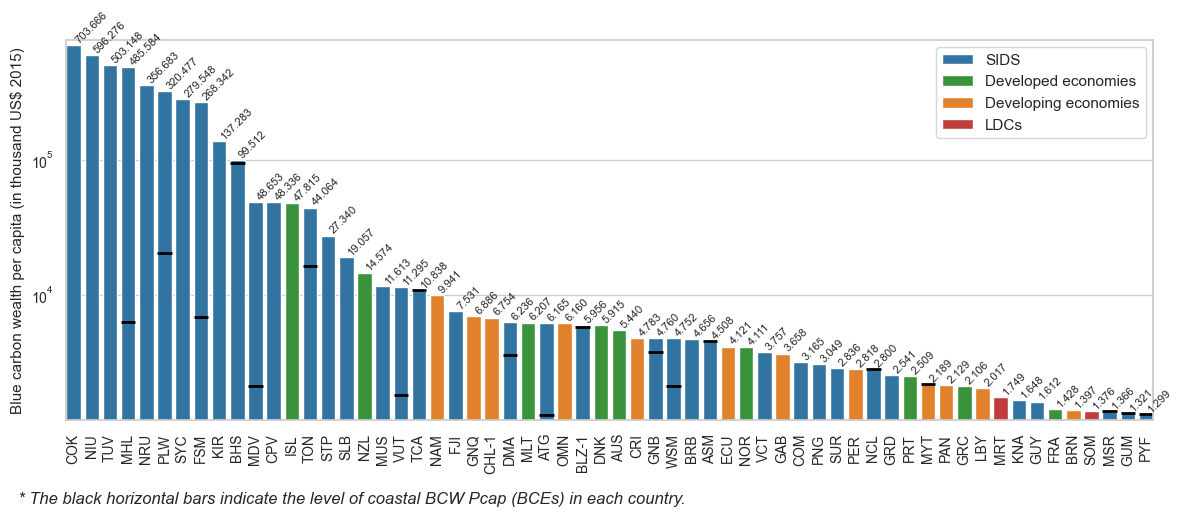

In [271]:
# Total BCW_per_capita absolute value by country
by_country = df[['ISO', 'Total BCW_per_capita', 'cBCW_per_capita', 'Groups']].dropna(subset=['Groups']).sort_values(by='Total BCW_per_capita', ascending=False)
top = by_country.head(60)

fig, ax = plt.subplots(figsize=(12, 5))

# Bars for Total BCW_per_capita
sns.barplot(
    data=top,
    y='Total BCW_per_capita', x='ISO',
    palette=color_mapping, hue='Groups', ax=ax
)
ax.margins(x=0)

ymin = top['Total BCW_per_capita'].replace(0, np.nan).min()          
ymax = top['Total BCW_per_capita'].max()
ax.set_yscale('log')
ax.set_ylim(ymin*0.9, ymax*1.1)                     
ax.autoscale(enable=False, axis='y')                 

for i, row in by_country.head(60).reset_index().iterrows():
    bcw = 0 if pd.isna(row['cBCW_per_capita']) else row['cBCW_per_capita']
    ax.hlines(
        y=bcw,
        xmin=i - 0.4, xmax=i + 0.4,   
        colors="black", linewidth=2
    )
 
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 0.05, f'{height/1e3:,.3f}',
                ha='left', va='bottom', rotation=45, fontsize=8)
plt.ylabel('Blue carbon wealth per capita (in thousand US$ 2015)', fontsize=11)
plt.xlabel('')
plt.xticks(rotation=90, ha='center')
# ax.set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend()
plt.figtext(
    0.3, 0, 
    "* The black horizontal bars indicate the level of coastal BCW Pcap (BCEs) in each country.",
    ha="center", va="top", fontsize=12, style="italic"
)
plt.show()

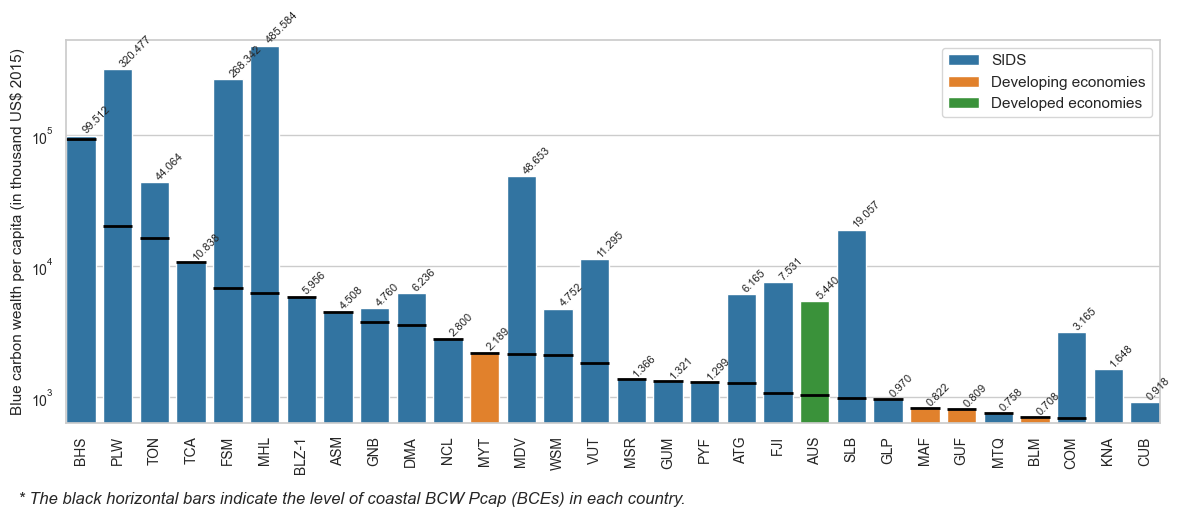

In [272]:
by_country = df[['ISO', 'Total BCW_per_capita', 'cBCW_per_capita', 'Groups']].dropna(subset=['Groups']).sort_values(by='cBCW_per_capita', ascending=False)
top = by_country.head(30)

fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(
    data=top,
    y='Total BCW_per_capita', x='ISO',
    palette=color_mapping, hue='Groups', ax=ax
)
ax.margins(x=0)
ymin = top['Total BCW_per_capita'].replace(0, np.nan).min()          
ymax = top['Total BCW_per_capita'].max()
ax.set_yscale('log')
ax.set_ylim(ymin*0.9, ymax*1.1)                    
ax.autoscale(enable=False, axis='y')                

for i, row in by_country.head(30).reset_index().iterrows():
    bcw = 0 if pd.isna(row['cBCW_per_capita']) else row['cBCW_per_capita']
    ax.hlines(
        y=bcw,
        xmin=i - 0.4, xmax=i + 0.4,   
        colors="black", linewidth=2
    )
 
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 0.05, f'{height/1e3:,.3f}',
                ha='left', va='bottom', rotation=45, fontsize=8)
plt.ylabel('Blue carbon wealth per capita (in thousand US$ 2015)', fontsize=11)
plt.xlabel('')
plt.xticks(rotation=90, ha='center')
# ax.set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend()
plt.figtext(
    0.3, 0, 
    "* The black horizontal bars indicate the level of coastal BCW Pcap (BCEs) in each country.",
    ha="center", va="top", fontsize=12, style="italic"
)
plt.show()

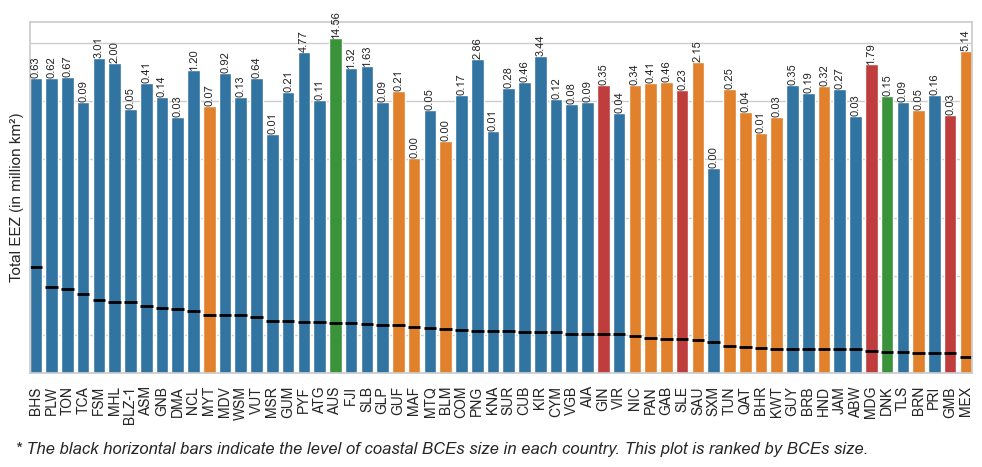

In [273]:
by_eez = df.copy()
by_eez['EEZ'] = by_eez['Area_EEZ_KM2']
by_eez['BCEs_size'] = by_eez[['mangroves_area_km2', 'saltmarshes_area_km2', 'seagrasses_area_km2']].sum(axis=1)
by_eez['BCEs_size'] = by_eez['BCEs_size'] / by_eez['Population']
by_eez = by_eez[['ISO', 'Groups', 'EEZ', 'BCEs_size'
             ]].dropna(subset=['Groups']).sort_values(by='BCEs_size', ascending=False)
top = by_eez.head(60)

fig, ax = plt.subplots(figsize=(10, 4.5))

sns.barplot(
    data=top,
    y='EEZ', x='ISO',
    palette=color_mapping, hue='Groups', ax=ax
)
ax.margins(x=0)

for i, row in by_eez.head(60).reset_index().iterrows():
    bcw = 0 if pd.isna(row['BCEs_size']) else row['BCEs_size']
    ax.hlines(
        y=bcw,
        xmin=i - 0.4, xmax=i + 0.4,  
        colors="black", linewidth=2
    )
 
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 0.1, f'{height/1e6:,.2f}',
                ha='center', va='bottom', rotation=90, fontsize=8)
plt.ylabel('Total EEZ (in million km²)', fontsize=11)
plt.xlabel('')
# remove y tick labels
ax.set_yticklabels([], visible=False)
plt.xticks(rotation=90, ha='center')
ax.set_yscale("log")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend().remove()
plt.figtext(
    0.45, 0, 
    "* The black horizontal bars indicate the level of coastal BCEs size in each country. This plot is ranked by BCEs size.",
    ha="center", va="top", fontsize=12, style="italic"
)
plt.show()

In [274]:
print('Well Done !')

Well Done !
